# Projeto #2 - Curso AI Para Industria - I2A2 & ABDI
- Dataset disponível **[aqui](https://www.kaggle.com/datasets/nphantawee/pump-sensor-data)**. 


##### Atividades
-  Fazer a carga em um notebook (Google Colab ou Jupyter local)
-  Realizar a análise dos dados (EDA)
- Investigar o código e discussões disponibilizados na página do dataset
- Montar um relatório com suas conclusões sobre o dataset (seja detalhista)

##### Responsável: Marcos Angelo Cemim ([mcemim@gmail.com](mailto:mcemim@gmail.com))

## Download dos dados, criação do dataframe e análise inicial superficial

In [3]:
import opendatasets as od # Com essa biblioteca, facilmente se tem acesso aos dados disponibilizados no kaggle, permitindo um uso mais "suave" em ambientes sem interface visual.

data_url = "https://www.kaggle.com/datasets/nphantawee/"
dataset_name = "pump-sensor-data"
data_file = "sensor.csv"
data_dir = "../data"
od.download(data_url+dataset_name, data_dir=data_dir) # baixa o arquivo da url fornecida no diretório selecionado 

Skipping, found downloaded files in "../data/pump-sensor-data" (use force=True to force download)


In [1]:
# importação das bibliotecas
import pandas as pd
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

/home/mac/.virtualenvs/i2a2teste/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv(f'{data_dir}/{dataset_name}/{data_file}') # Leitura do arquivo baixado anteriormente e criação do dataframe
df.head() # exibição do início do DF para validar que está OK

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_50  sensor_51  machine_status  
0   243.0556   201.3889          NORMAL  
1   243.0556   201.3889          NORMAL  
2   241.3194   203.7037          NORMAL  
3   240.4514   203.1250          NORMAL  
4   242.1875   201.3889          NORMAL  

[5 rows x 55 columns]

In [5]:
# Aqui, faço uma breve análise das duas primeiras linhas de cada coluna, exibindo também o tipo de dado e a quantidade e percentual de valores nulos.
# Bastante semelhante ao comando df.info(), mas com algumas informações extras.
print(f'{"Nome":^30s}|{"Primeiras Linhas":^30s}|{"DataType":^15s}|{"Null":^8s}|{"% Null":^8s}')
for col in list(df.columns):
    print(f'{"-"*30}|{"-"*30}|{"-"*15}|{"-"*8}|{"-"*8}')
    print(f'{col:<30s}|{str(df[col][0]):<30s}|{str(df[col].dtype):<15s}|{df[col].isna().sum():8d}|{df[col].isna().sum()/len(df[col]):0.4%}\n{" "*30:<30s}|{str(df[col][1]):<30s}|{" "*15}|{" "*8}|{" "*8}')

             Nome             |       Primeiras Linhas       |   DataType    |  Null  | % Null 
------------------------------|------------------------------|---------------|--------|--------
Unnamed: 0                    |0                             |int64          |       0|0.0000%
                              |1                             |               |        |        
------------------------------|------------------------------|---------------|--------|--------
timestamp                     |2018-04-01 00:00:00           |object         |       0|0.0000%
                              |2018-04-01 00:01:00           |               |        |        
------------------------------|------------------------------|---------------|--------|--------
sensor_00                     |2.465394                      |float64        |   10208|4.6333%
                              |2.465394                      |               |        |        
------------------------------|------------

## Primeiras impressões:
Avaliando de forma grosseira e superficial o dataframe, percebemos que a maior parte das colunas são números não-inteiros/**float64**.
Isso faz bastante sentido, já que teoricamente são valores de sensores físicos, e portanto, variáveis numéricas. 

#### Hipóteses:
1. Podemos perceber que a coluna *"machine_status"*, que seria nosso target, está como texto/**object**. Precisamos checar se é possível transformá-la em categórica, e quantas categorias existem.
2. A coluna *"Unnamed: 0"* parece ser apenas o index trazido pelo arquivo CSV. Podemos eliminá-la.
#### Ações:
1. A coluna *"timestamp"* está em formato de texto. Vamos convertê-la em formato datetime para facilitar as análises. ("2018-04-01 00:00:00")
2. A coluna *"sensor_15"* está apenas com valores nulos. Precisamos entender como tratá-la, e se é possível eliminar. 
3. A maior parte das colunas possui valores nulos. Precisamos investigar se estão todos localizados no mesmo timestamp (o que sugeriria um possível problema na comunicação), ou se estão em pontos espalhados no tempo, sugerindo falhas específicas nos sensores.

Vamos avaliar os dados com a biblioteca sweetviz para confirmar as hipoteses

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:05 -> (00:00 left)



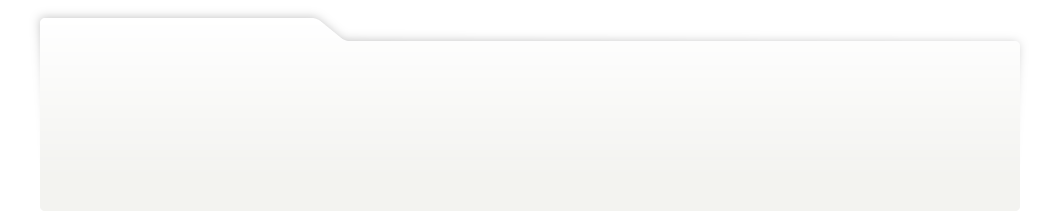
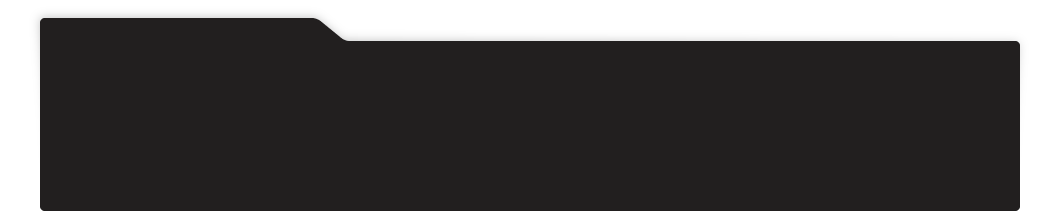
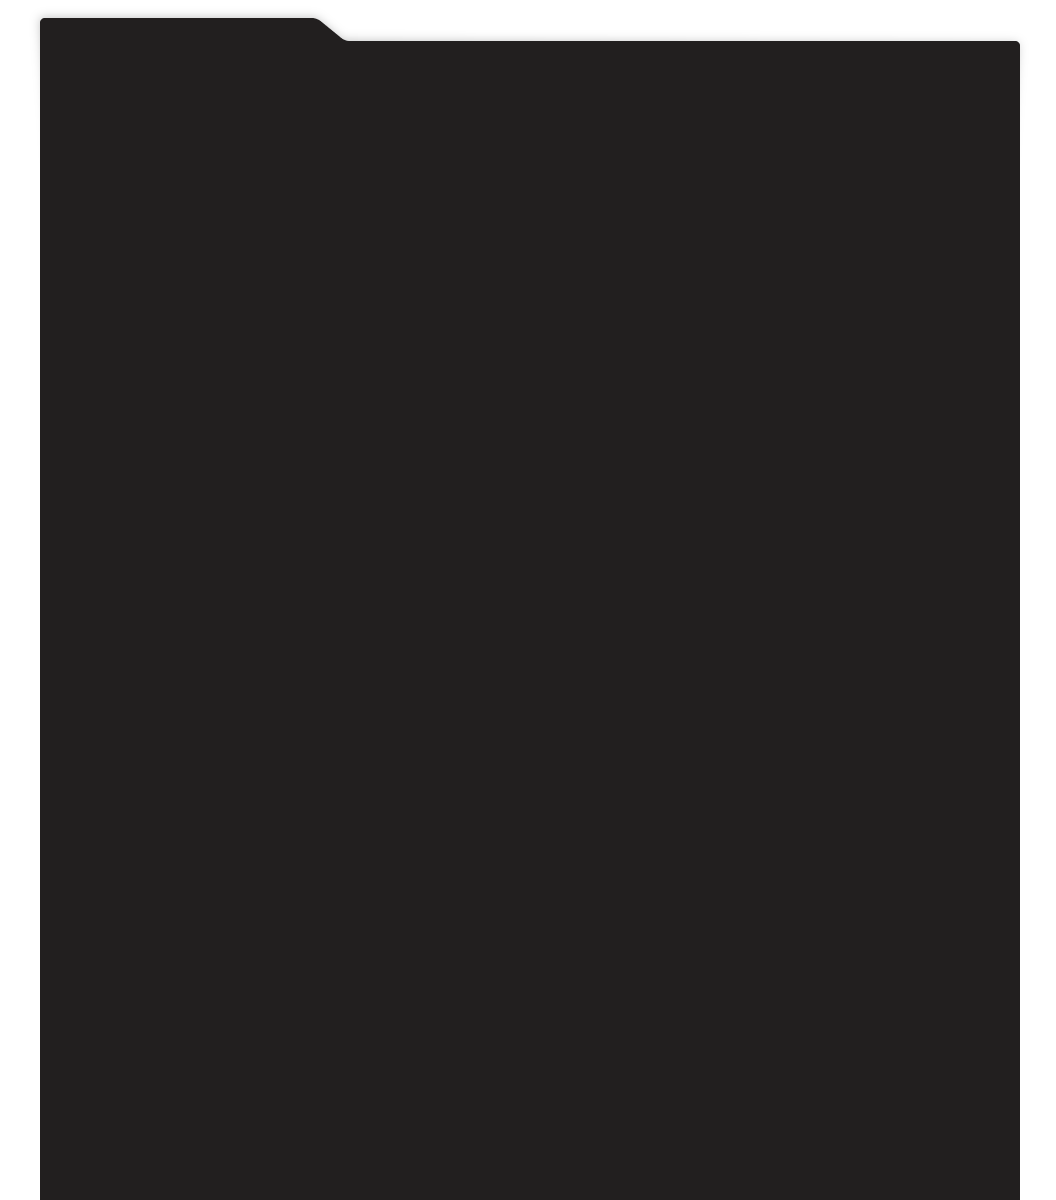
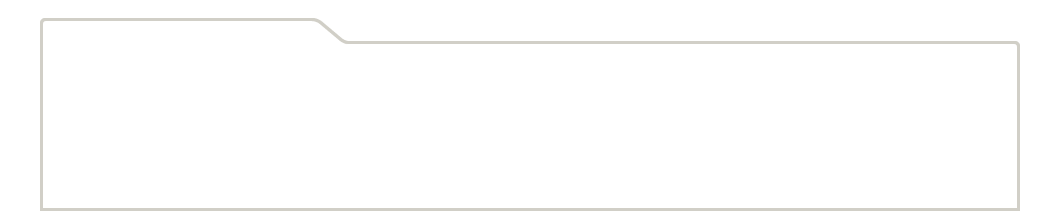
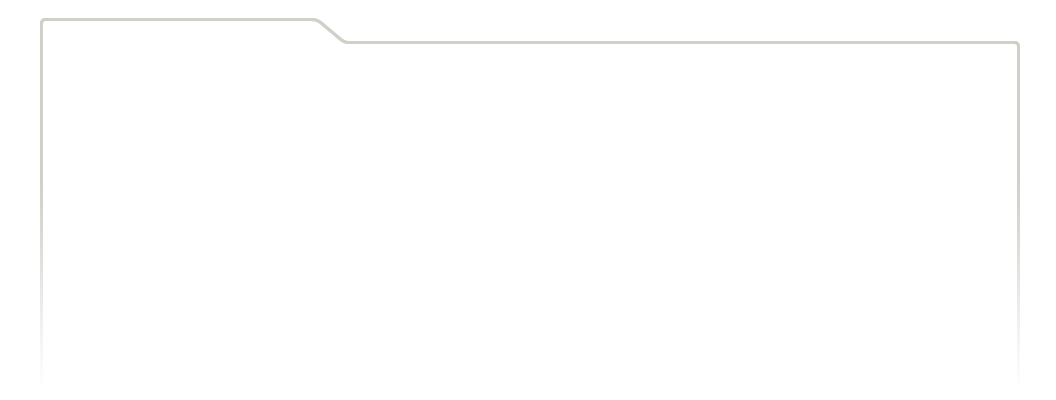
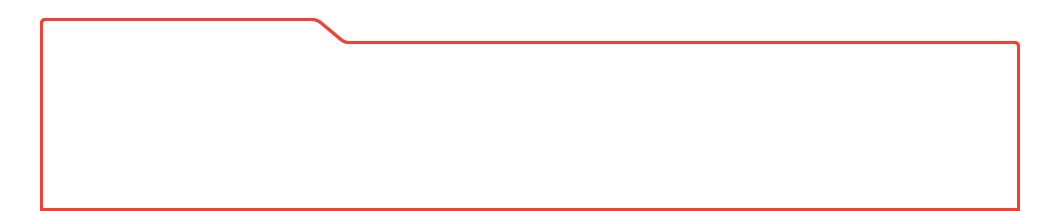
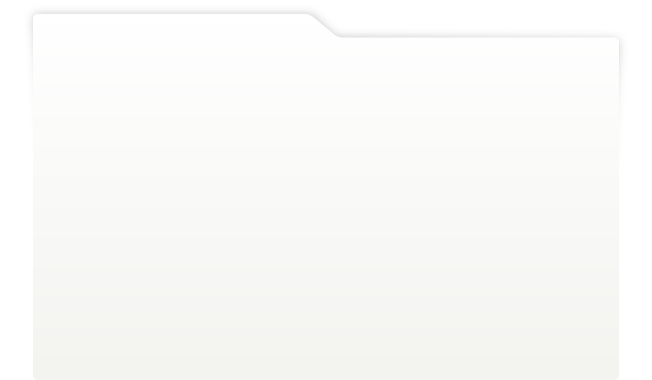
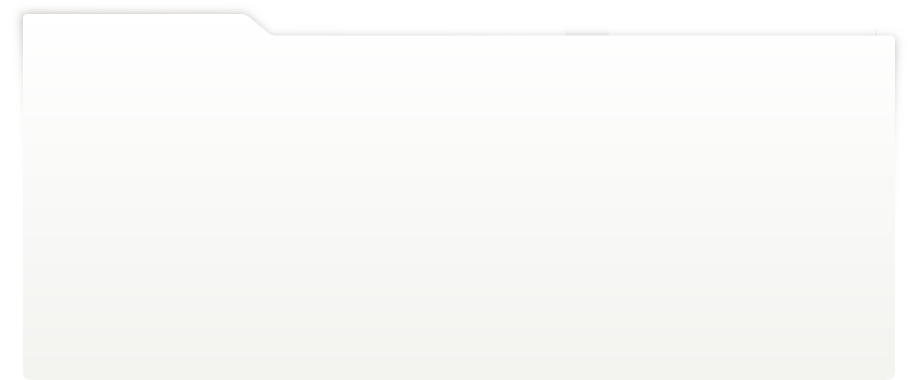
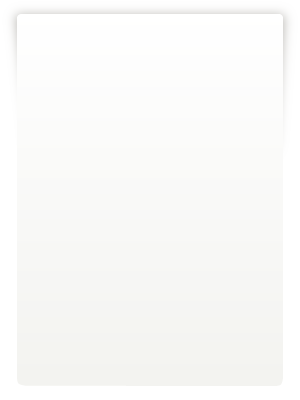
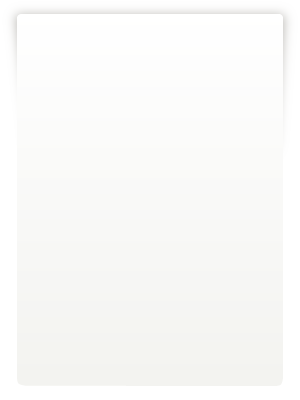
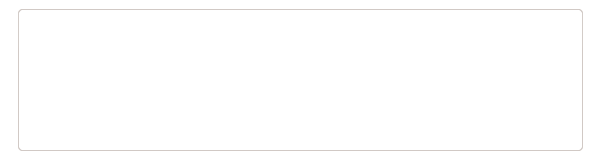
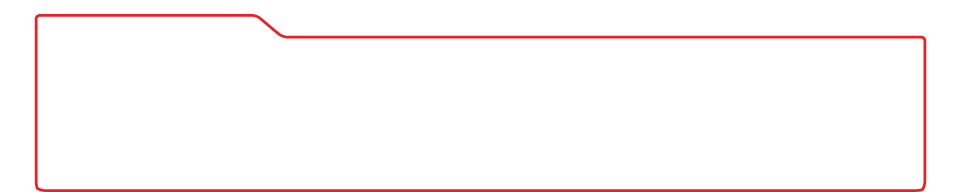
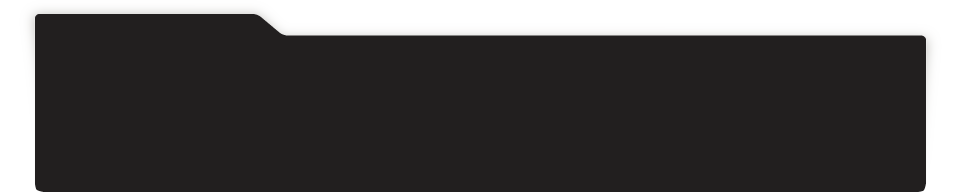
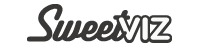
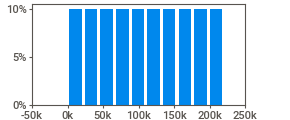
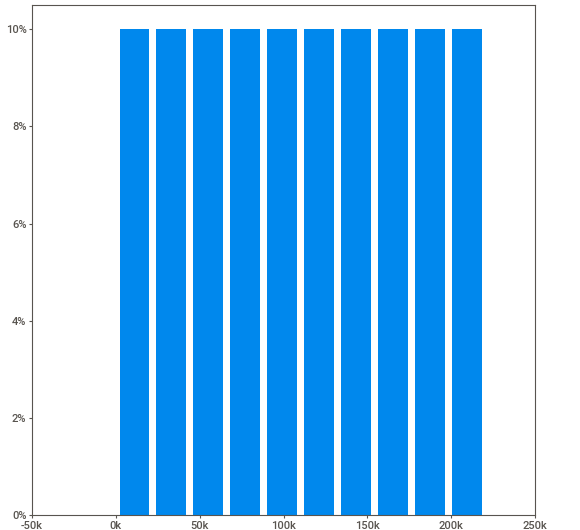
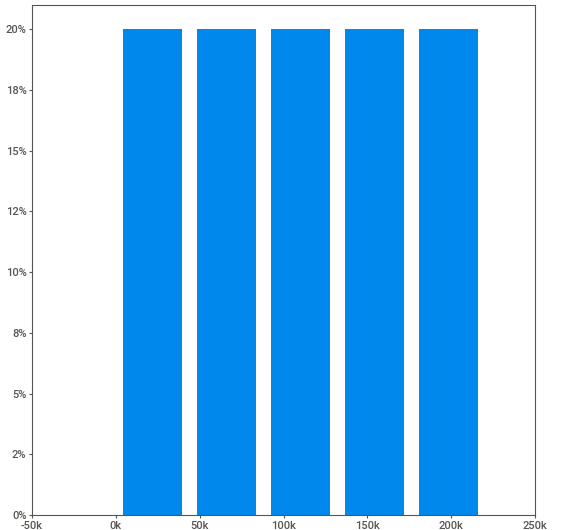
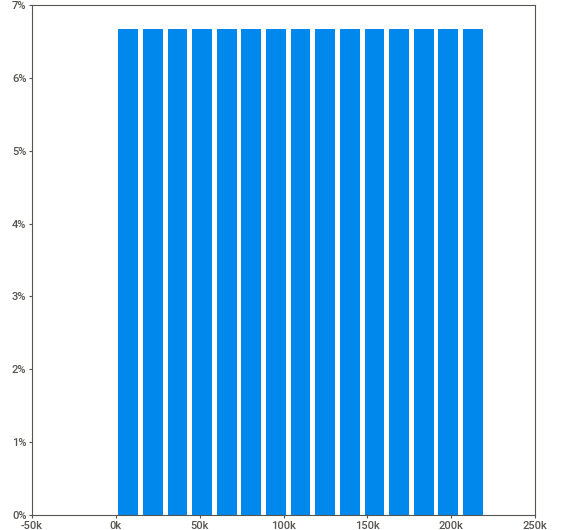
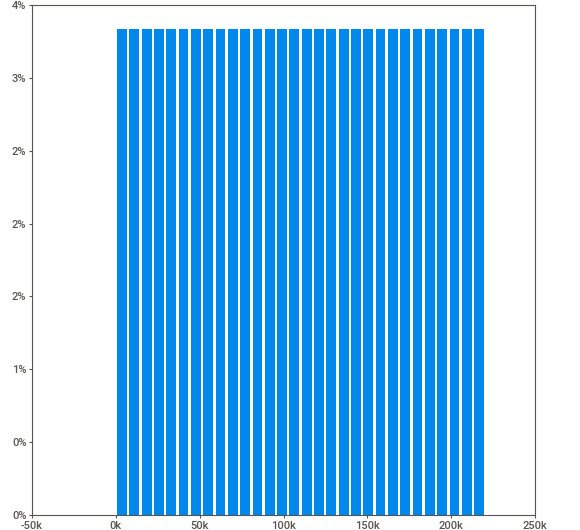
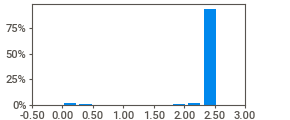
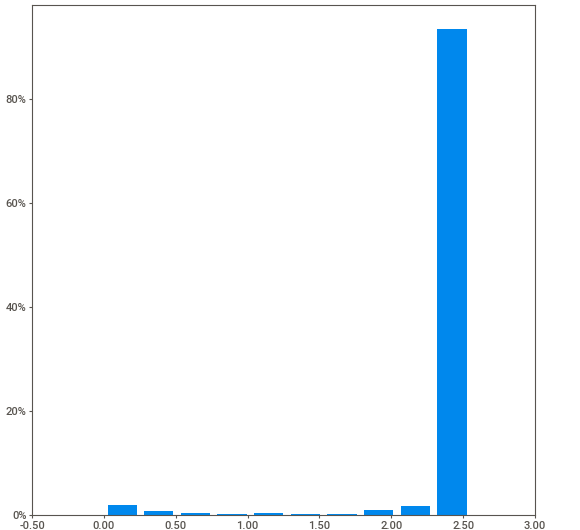
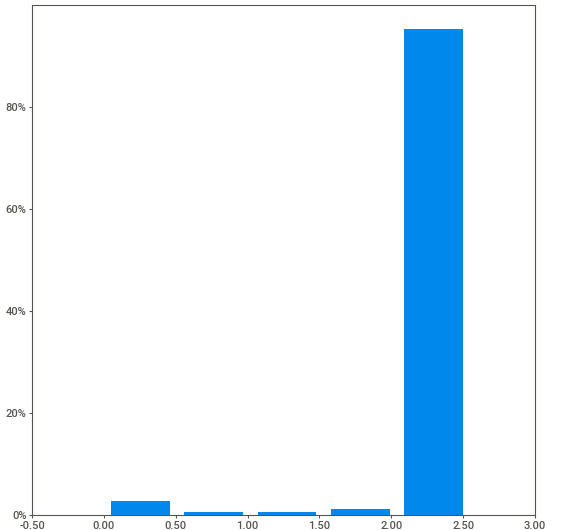
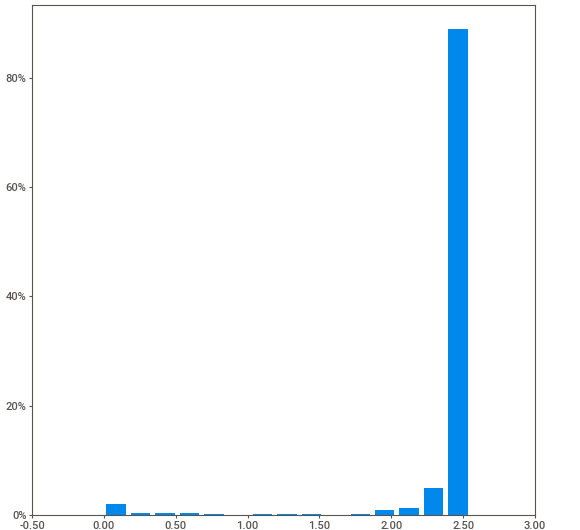
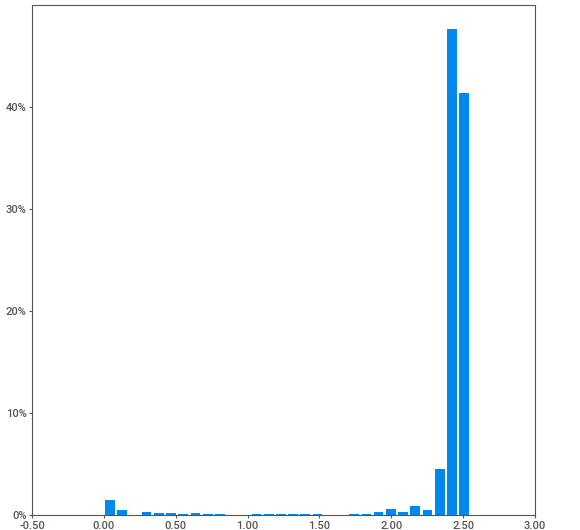
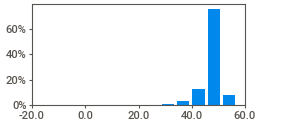
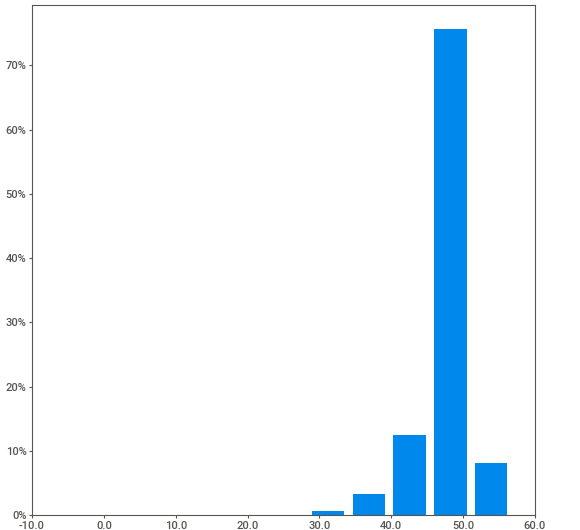
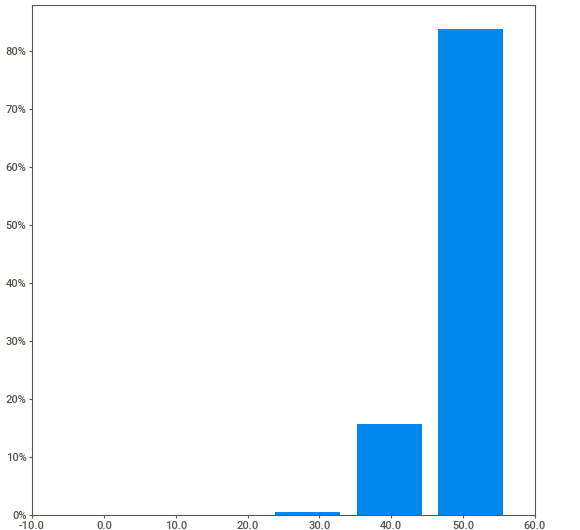
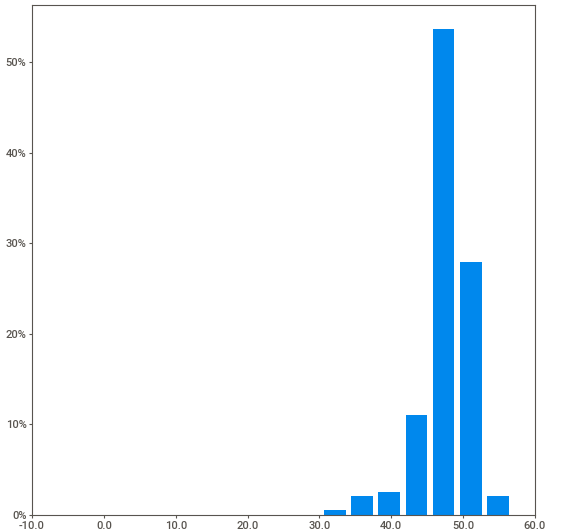
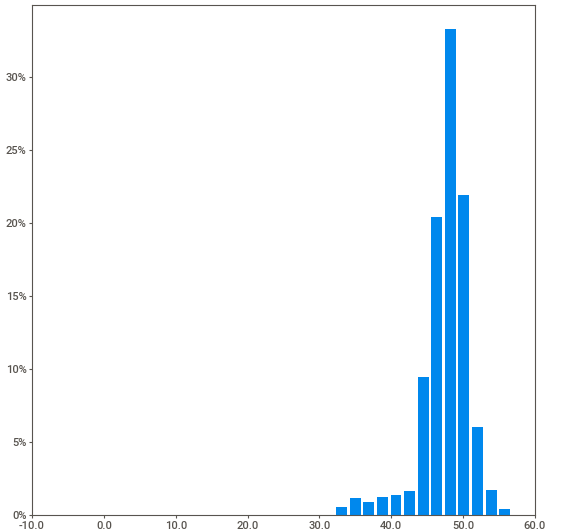
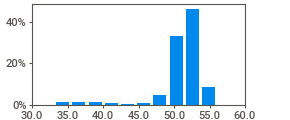
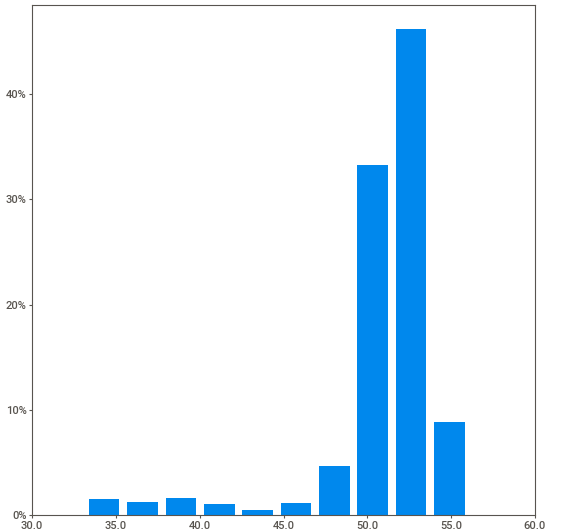
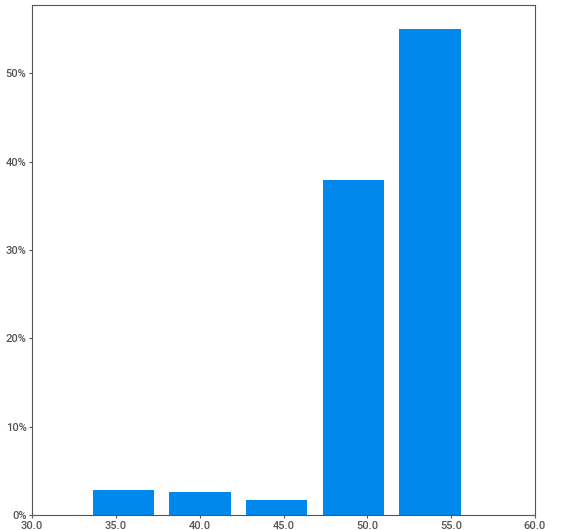
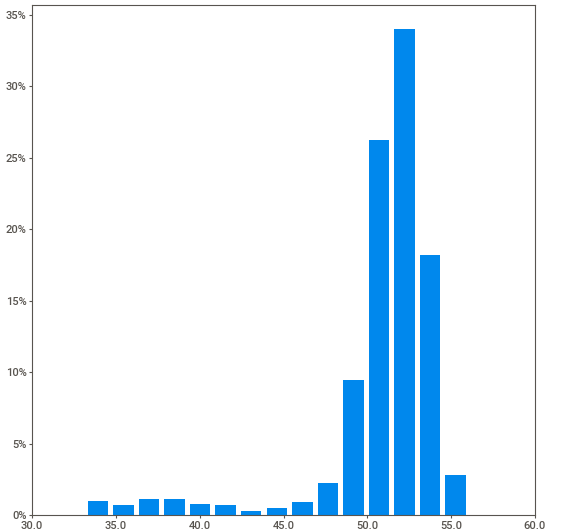
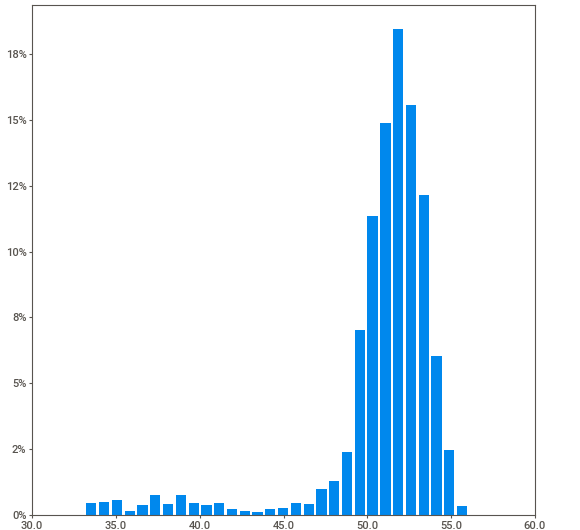
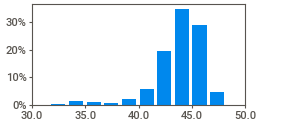
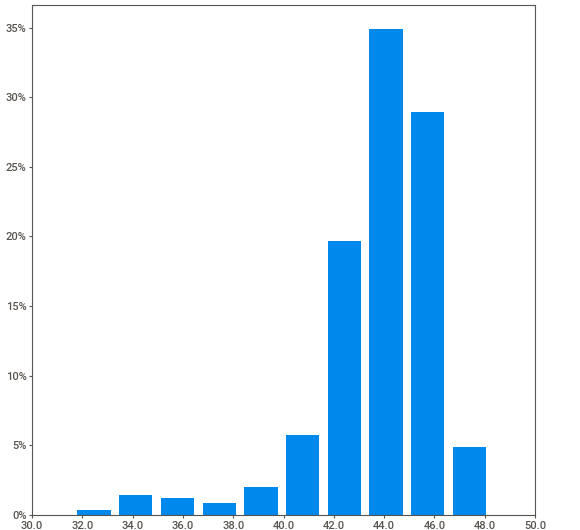
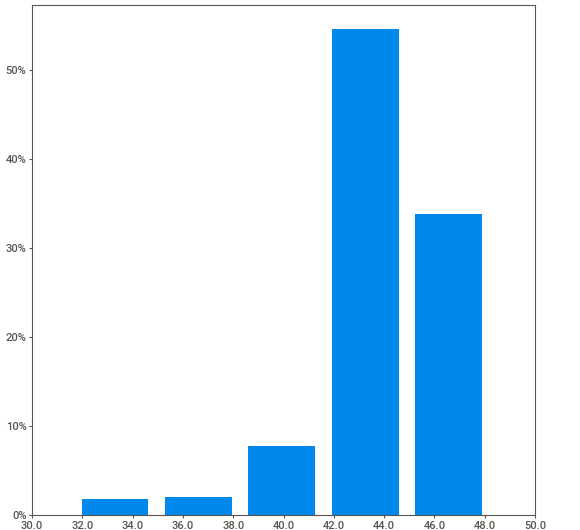
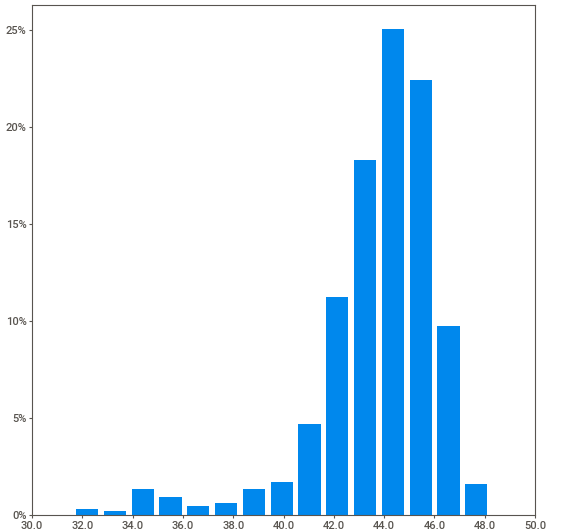
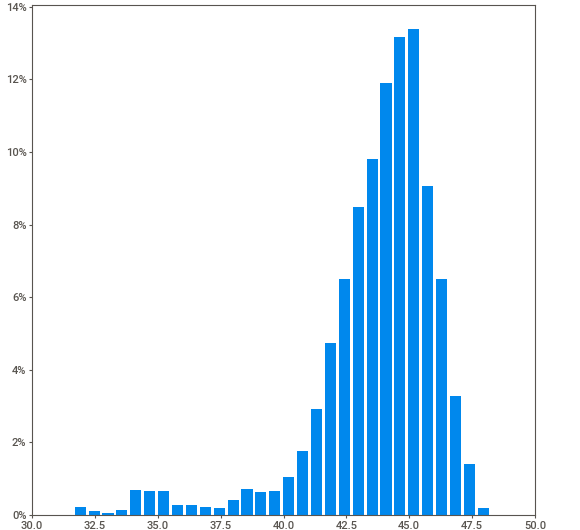
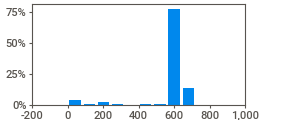
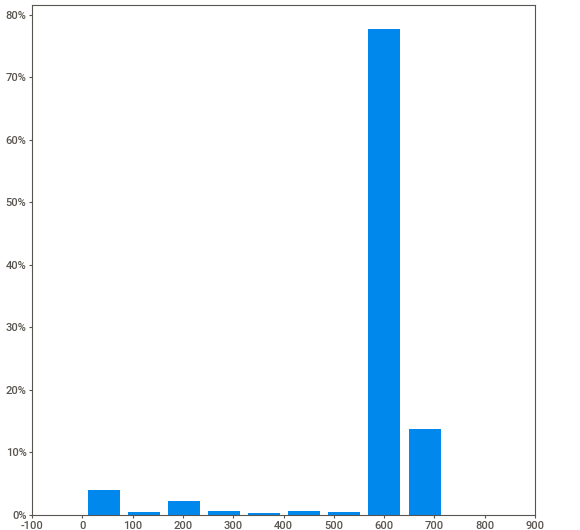
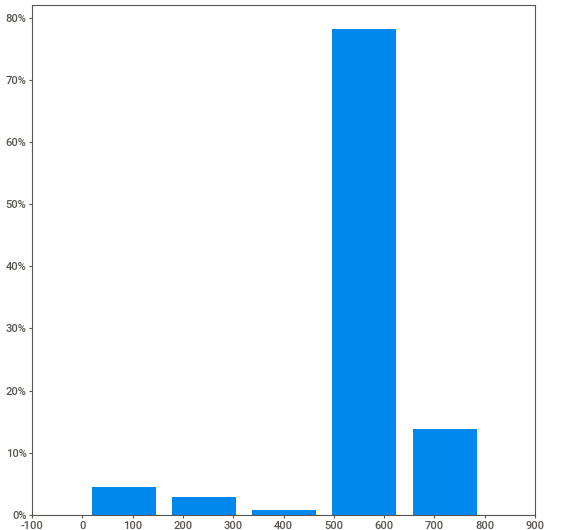
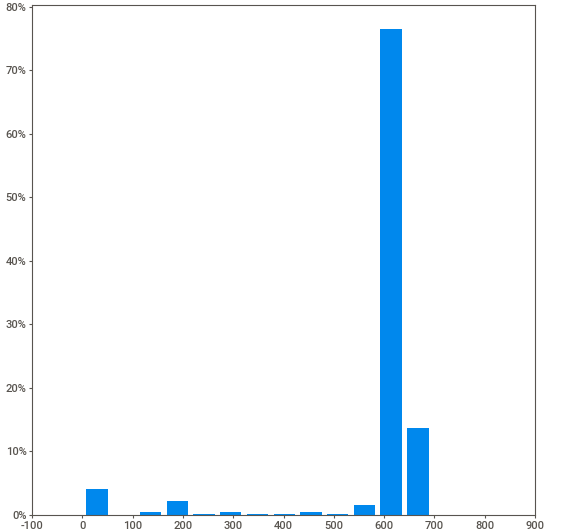
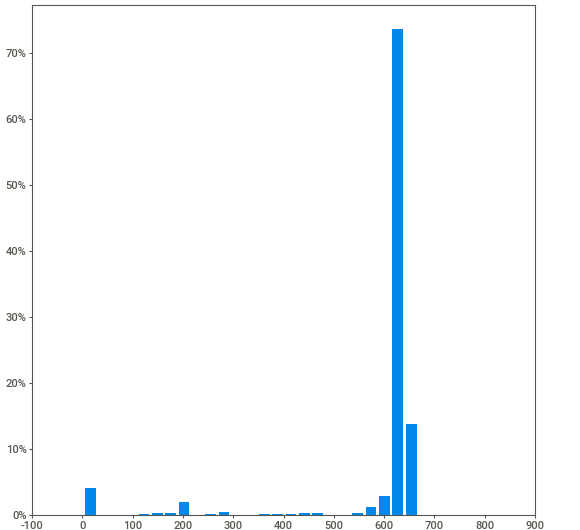
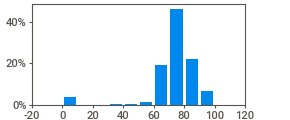
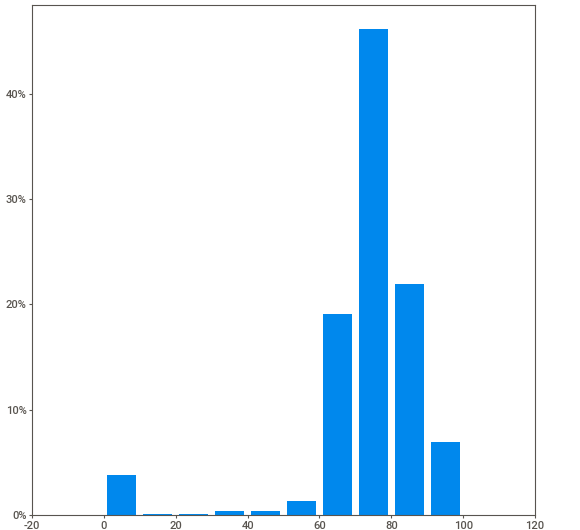
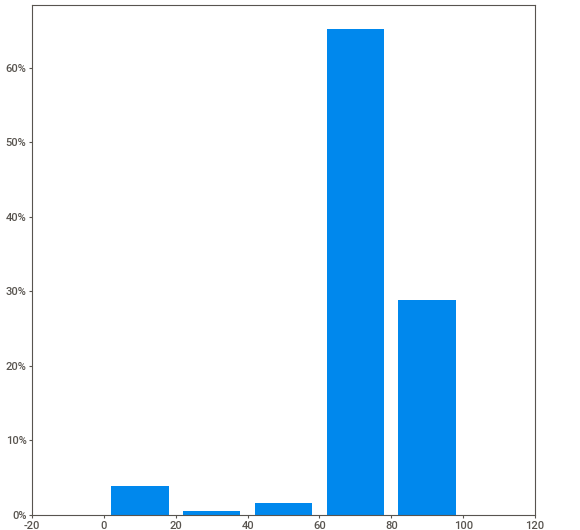
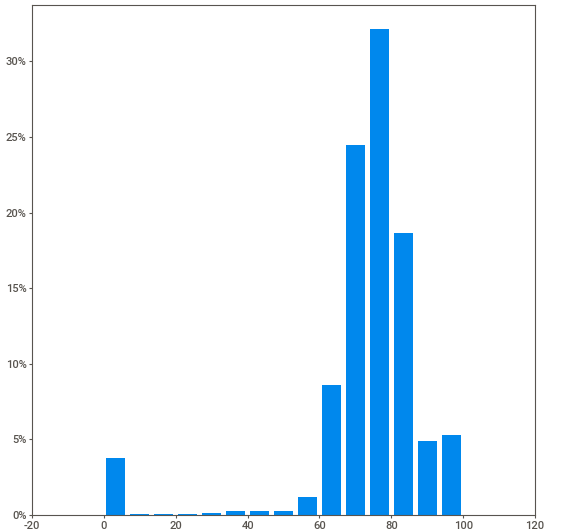
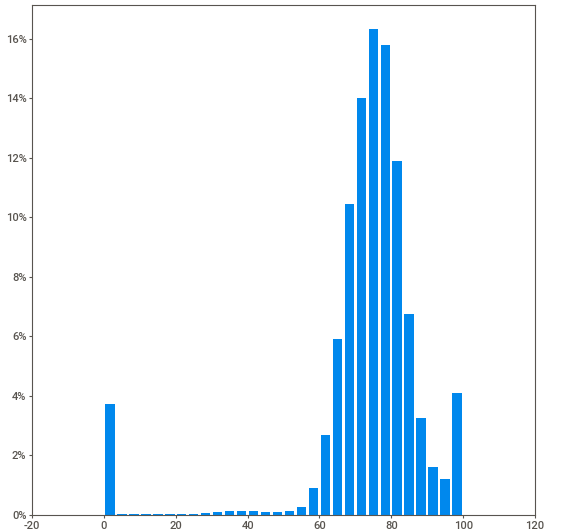
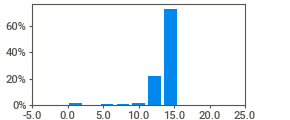
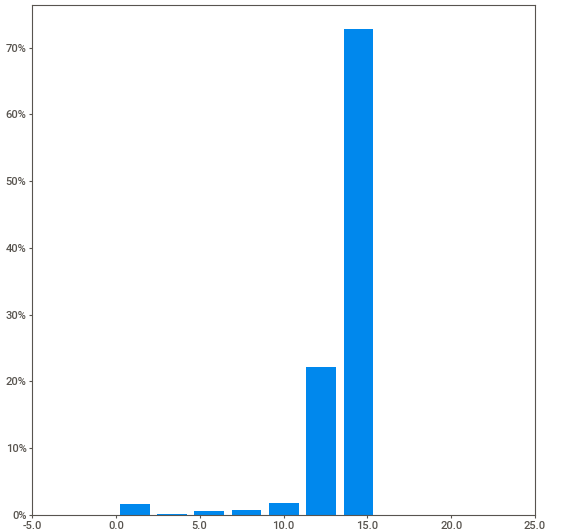
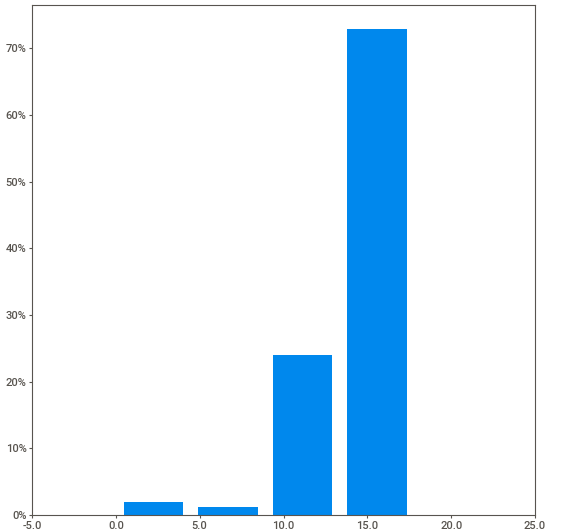
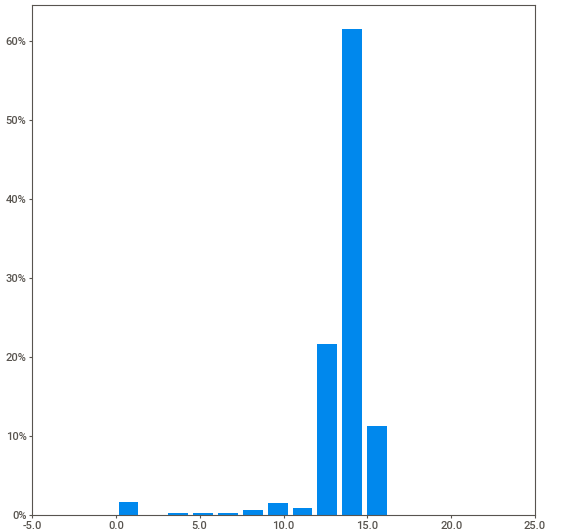
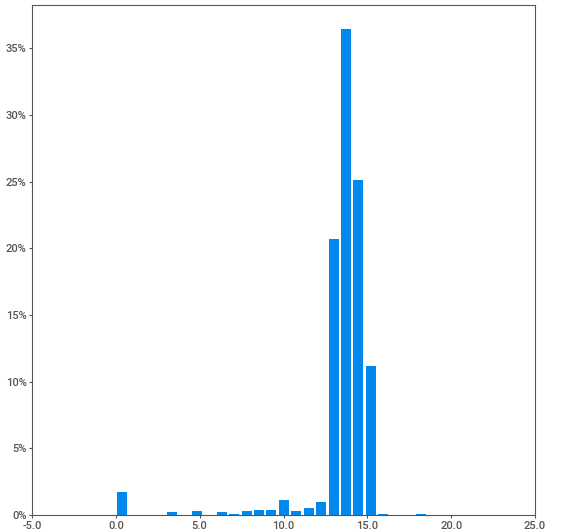
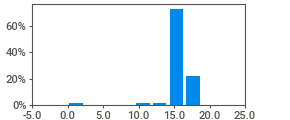
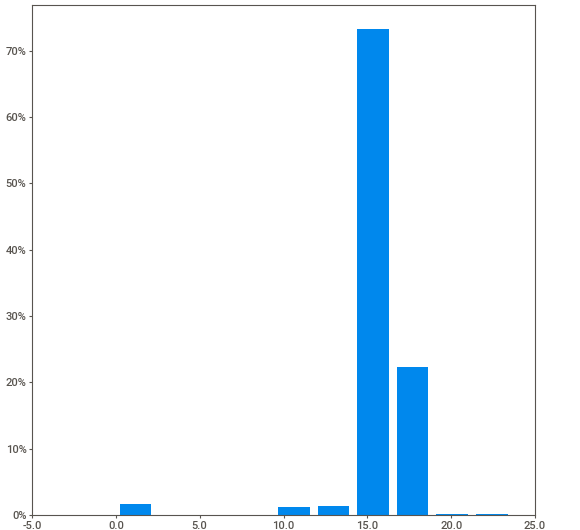
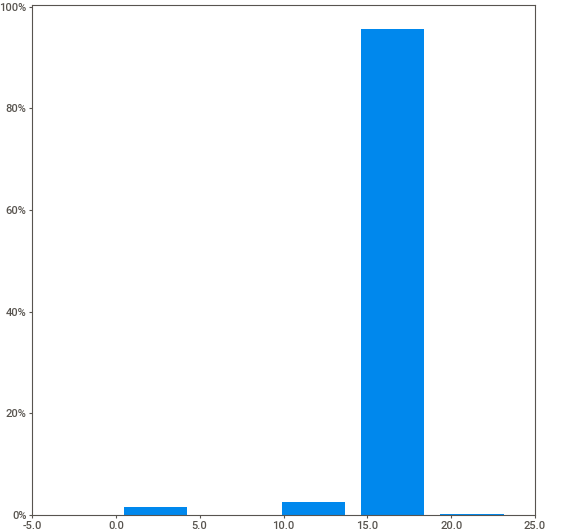
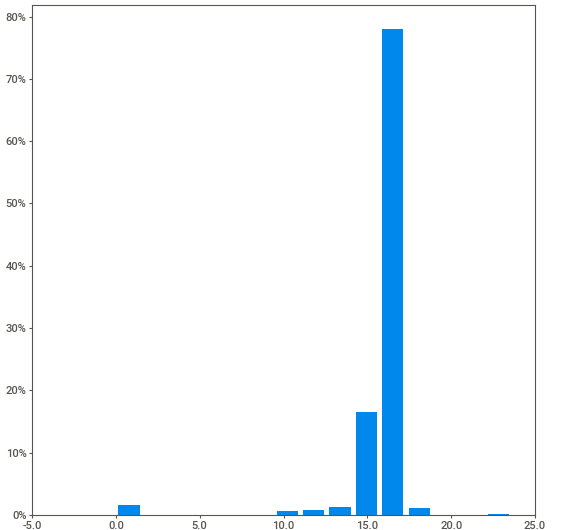
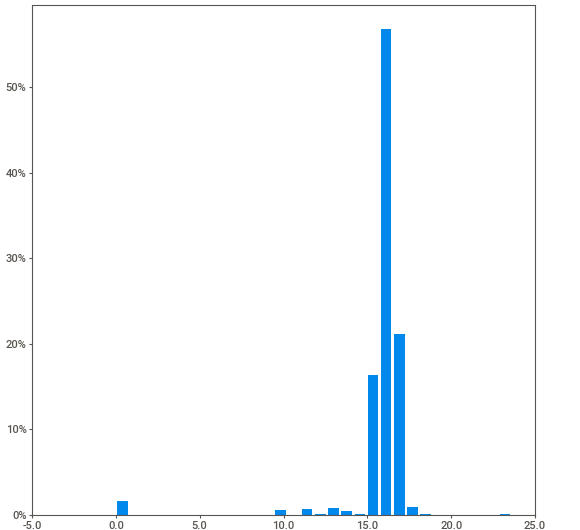
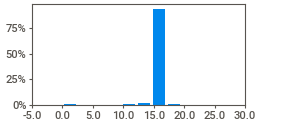
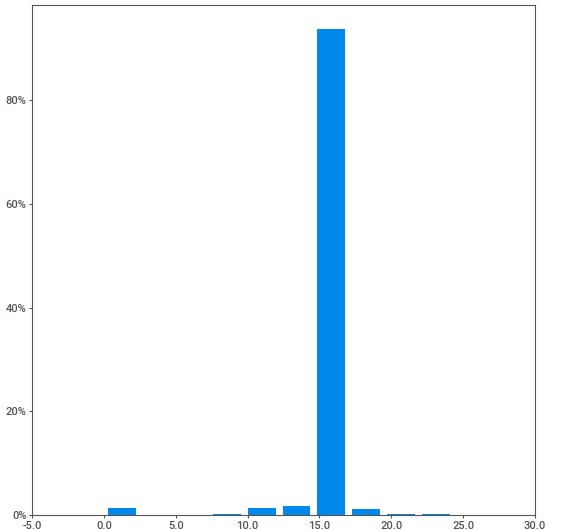
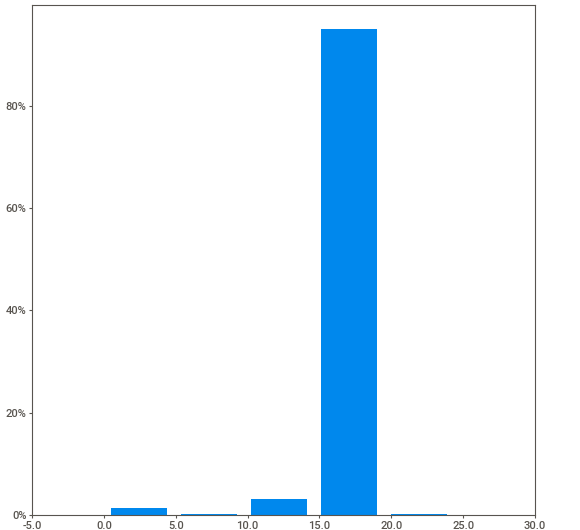
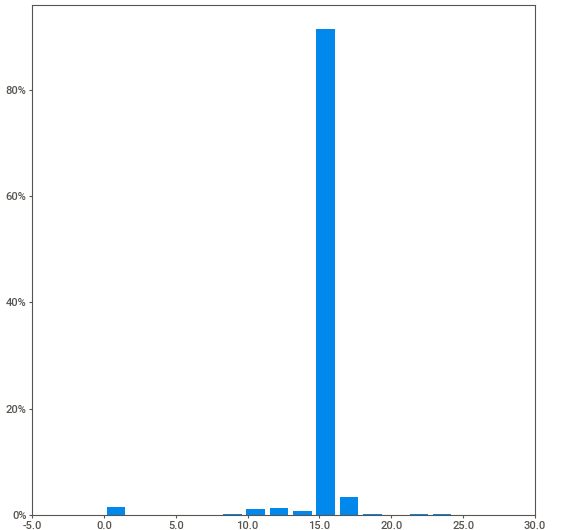
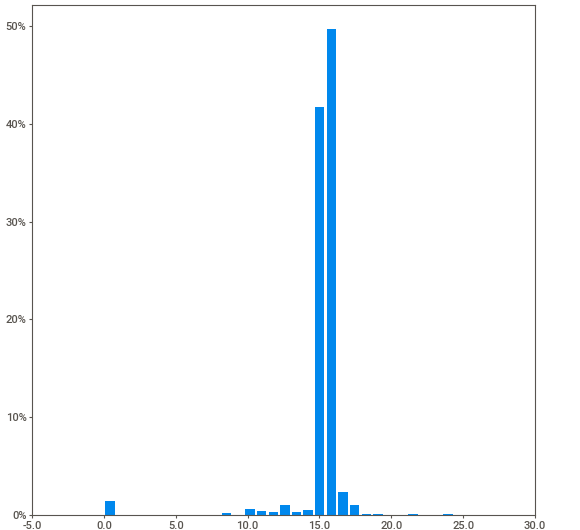
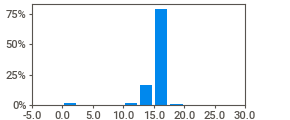
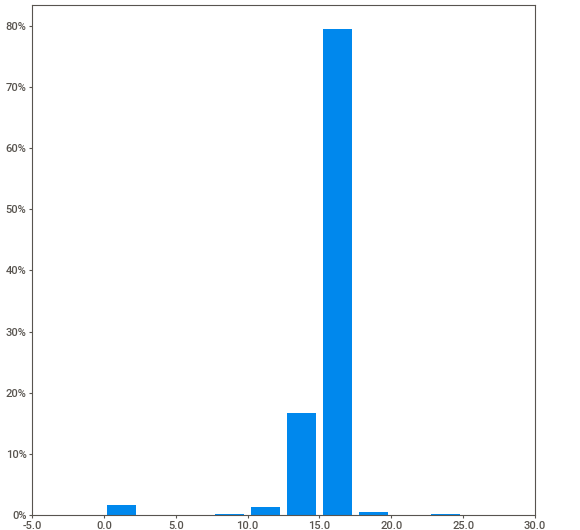
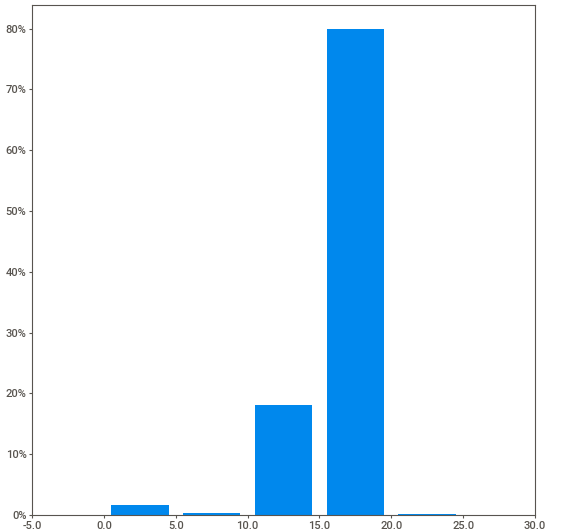
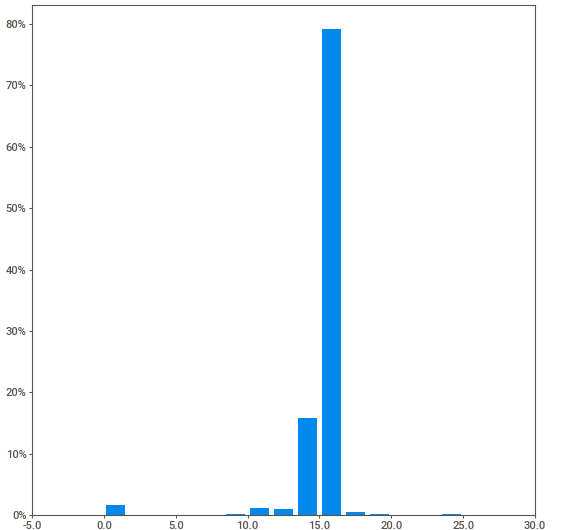
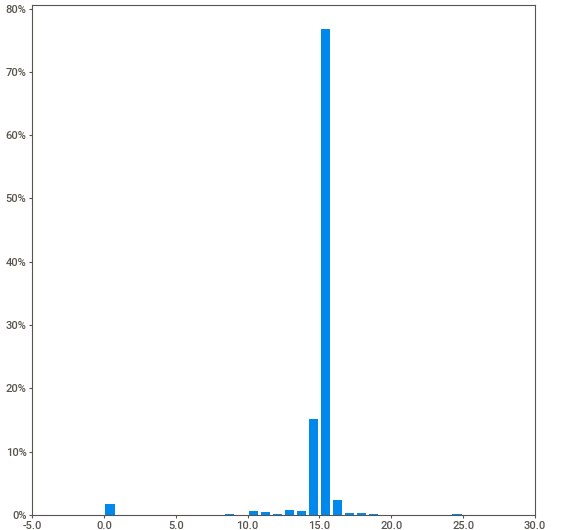
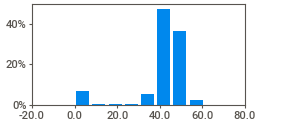
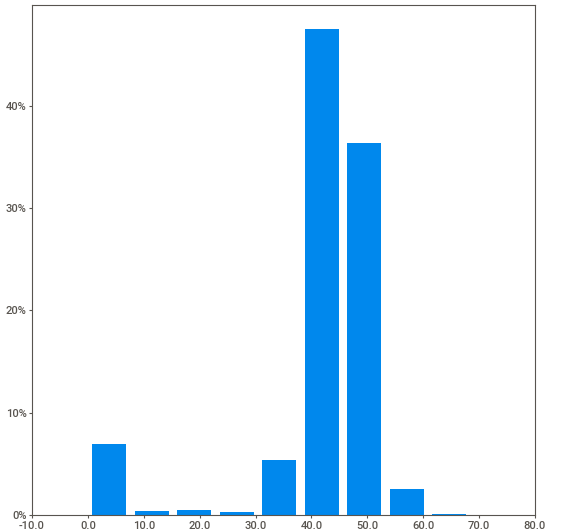
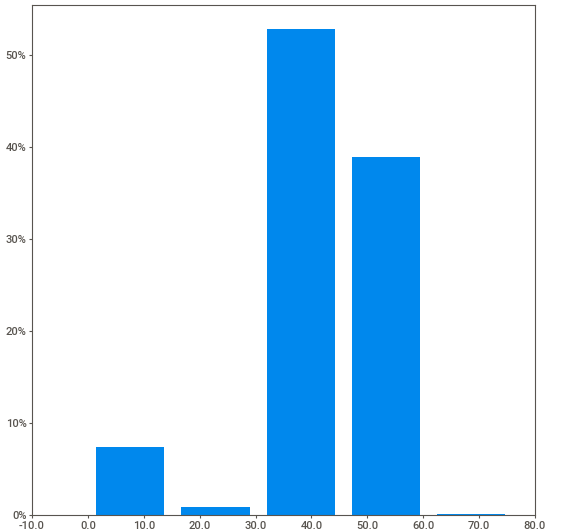
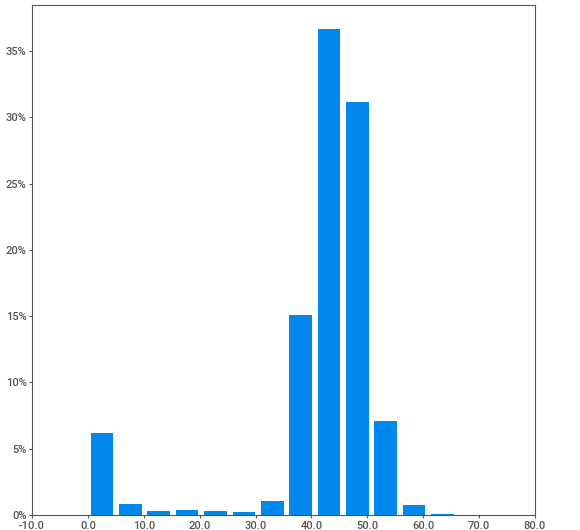
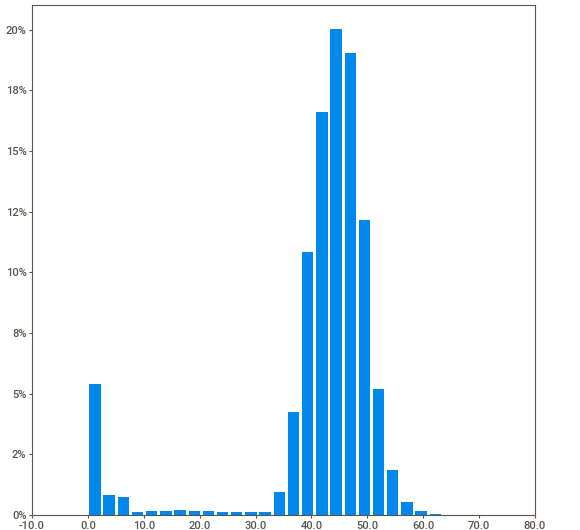
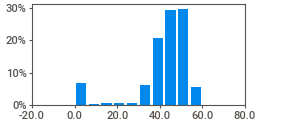
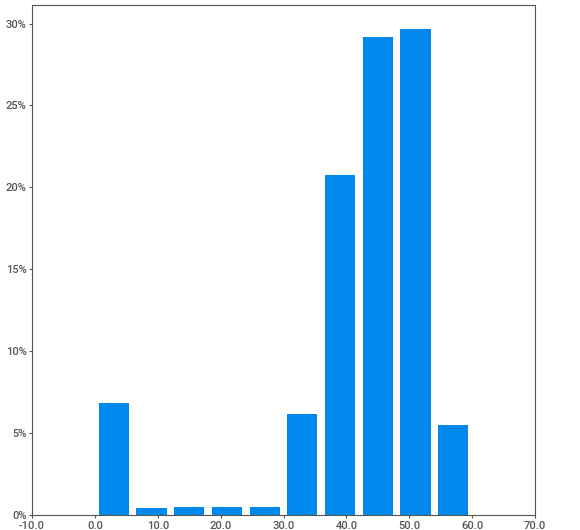
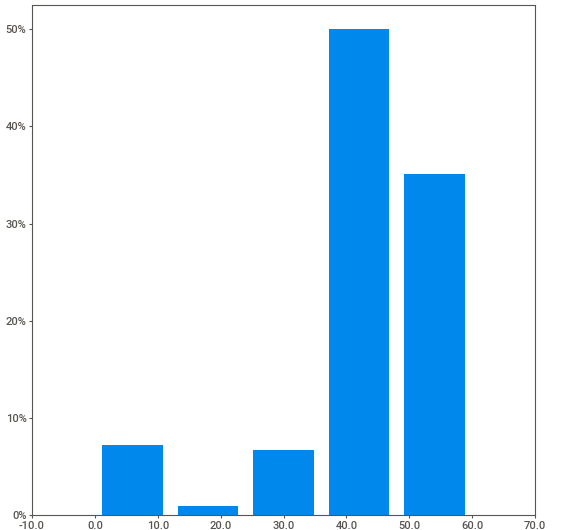
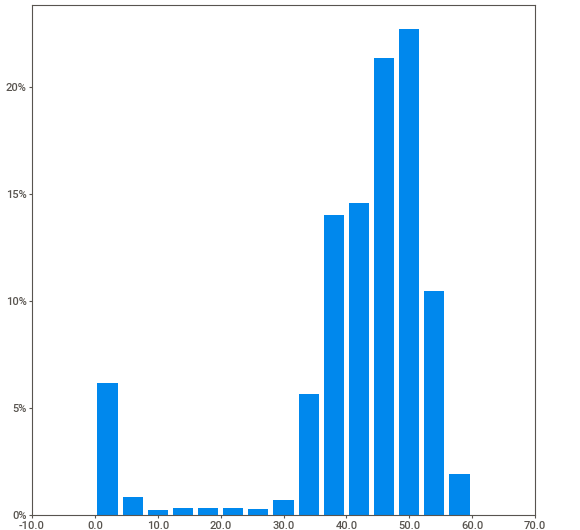
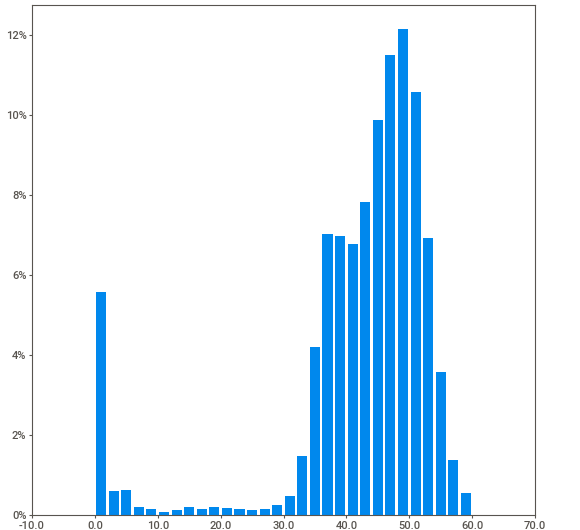
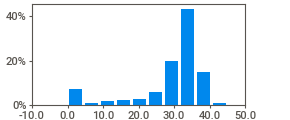
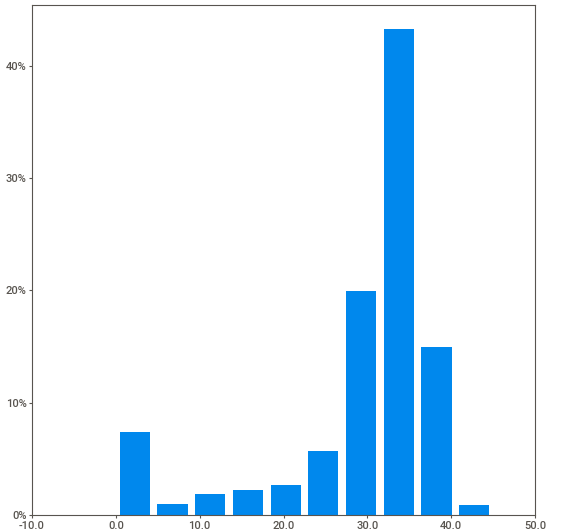
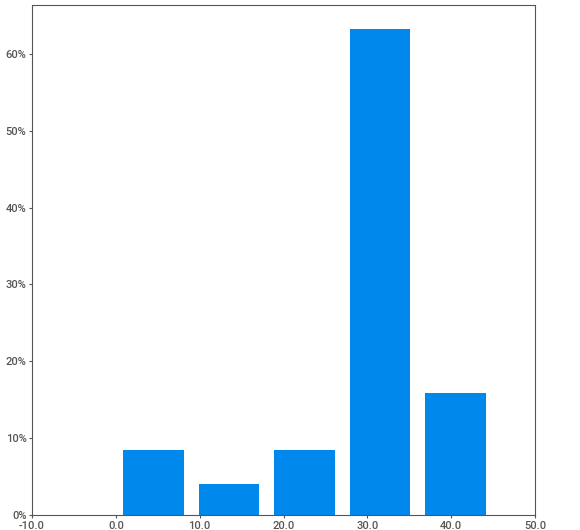
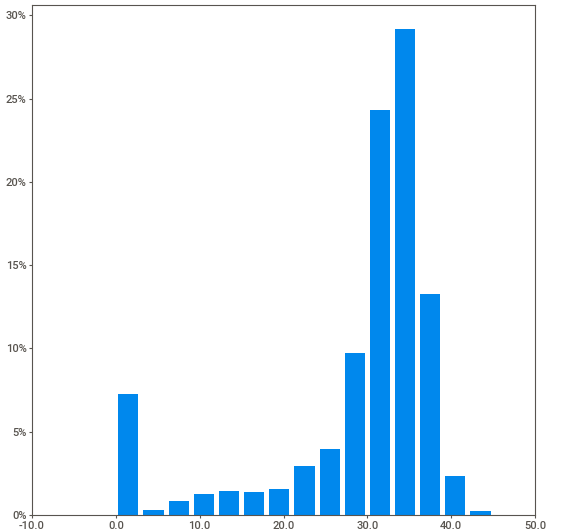
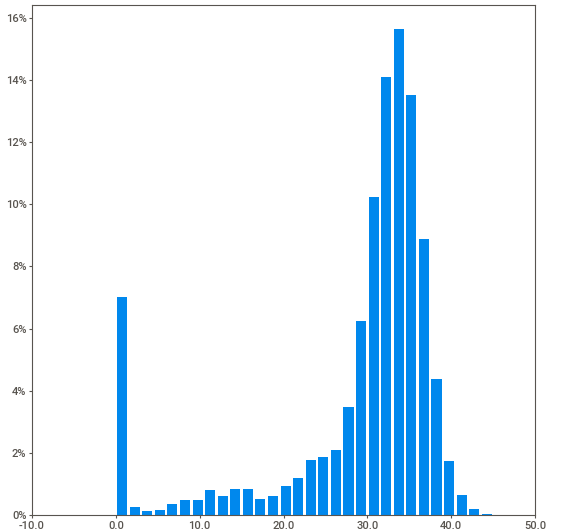
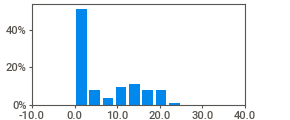
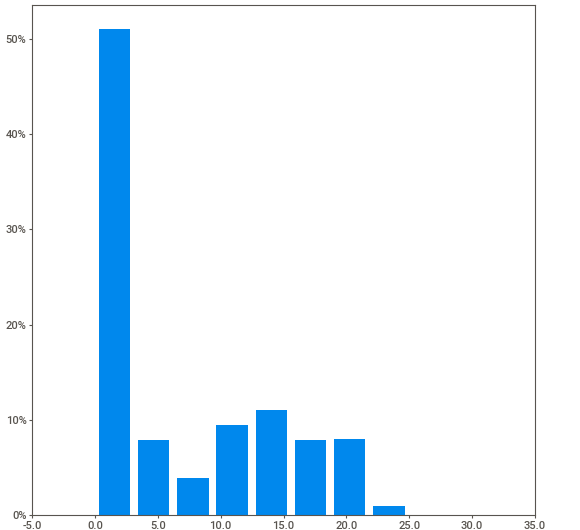
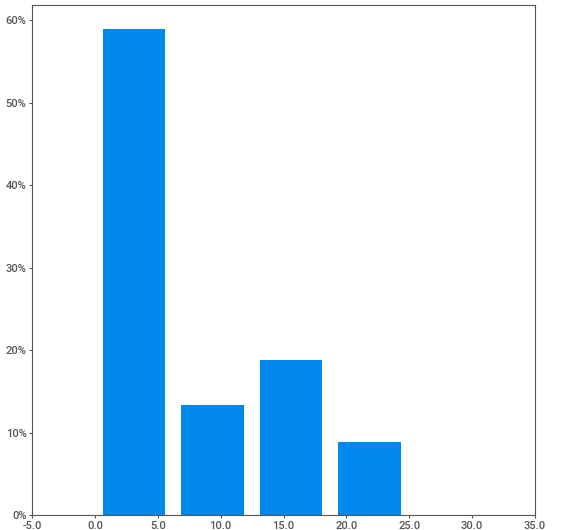
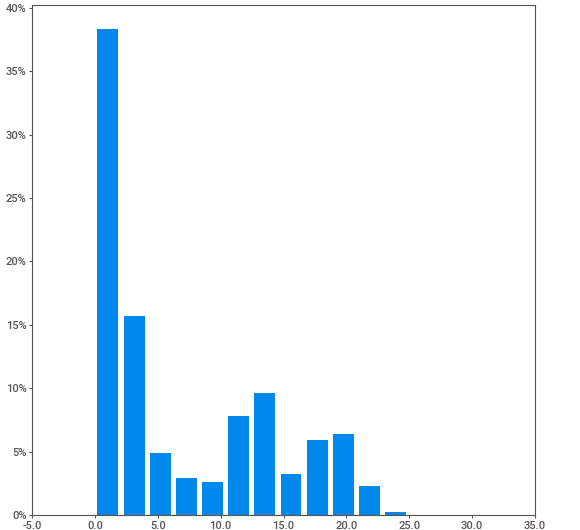
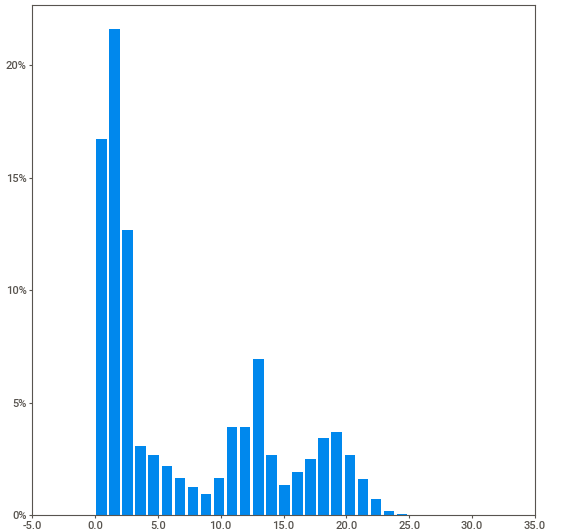
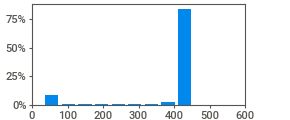
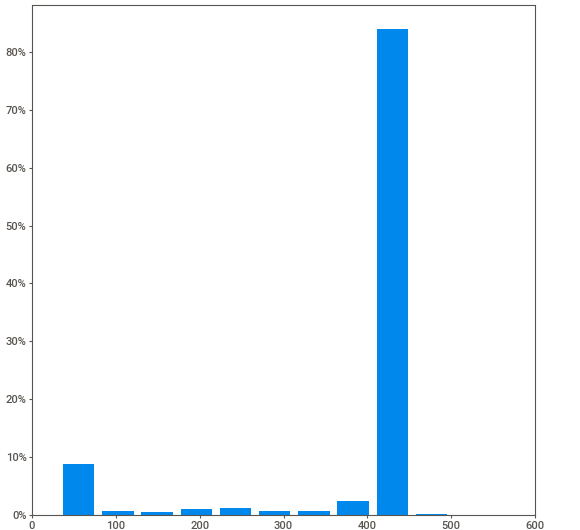
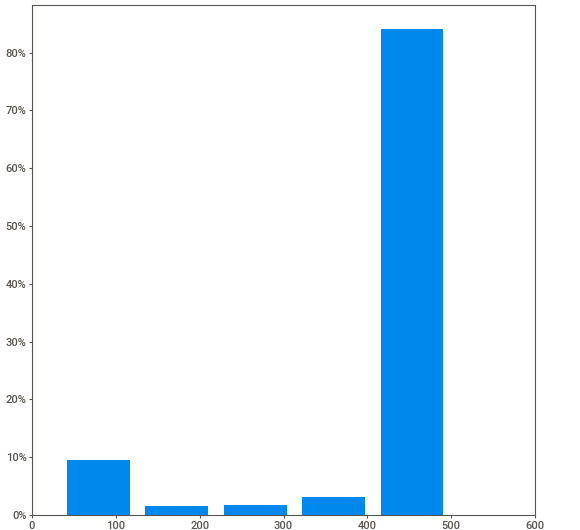
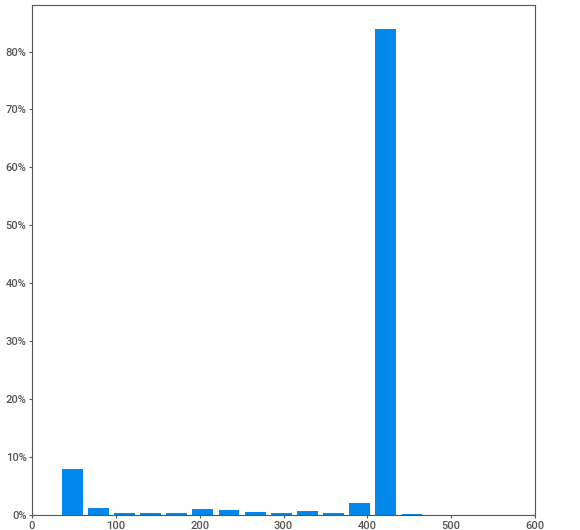
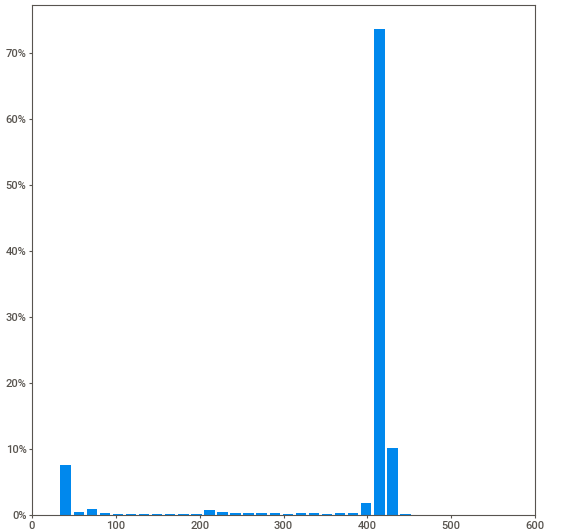
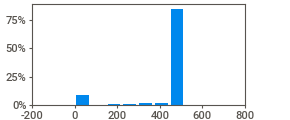
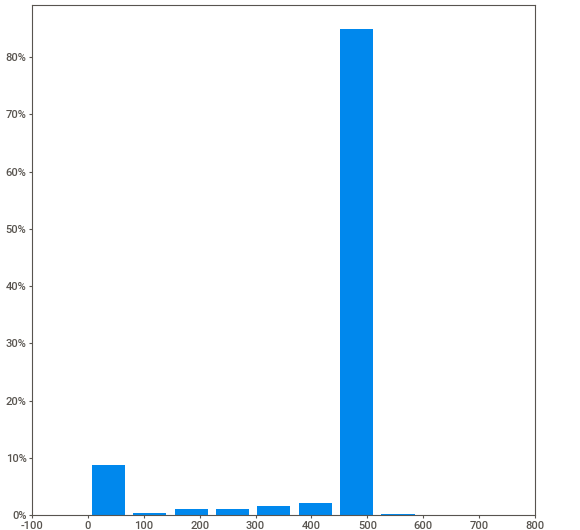
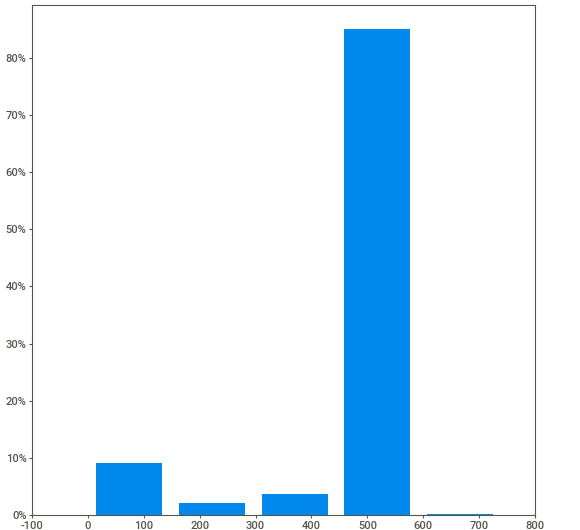
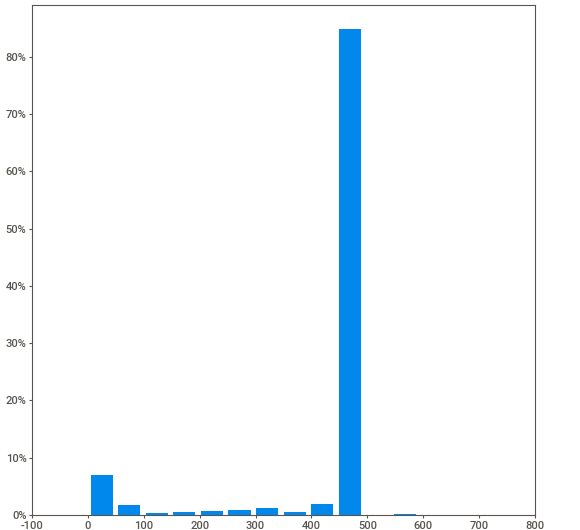
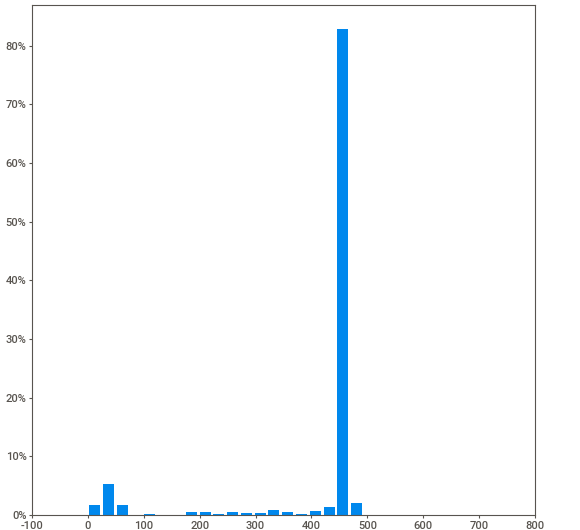
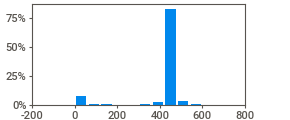
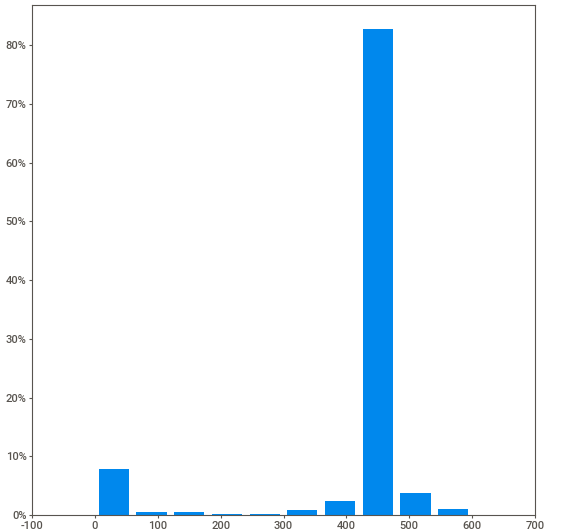
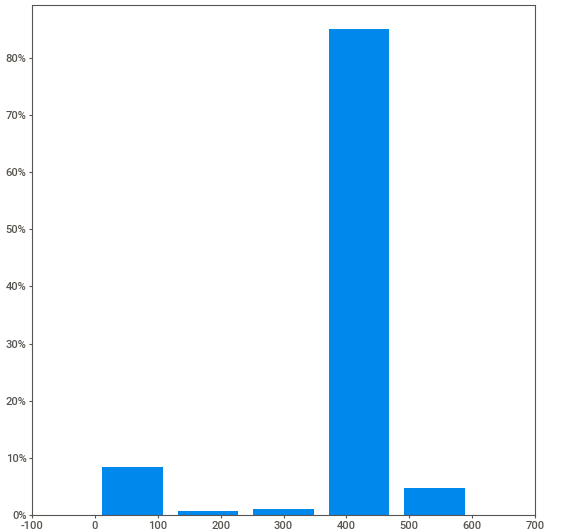
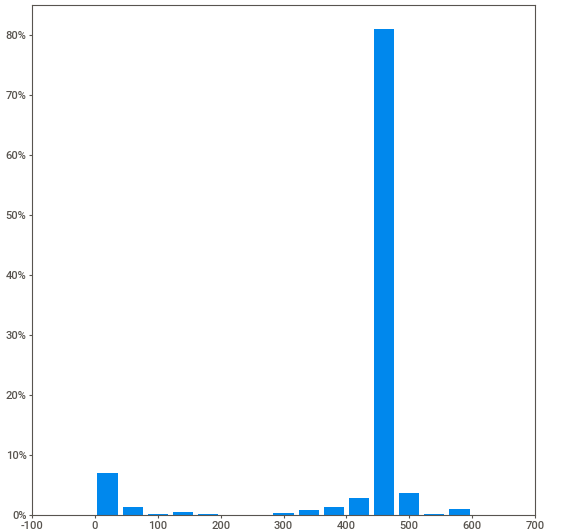
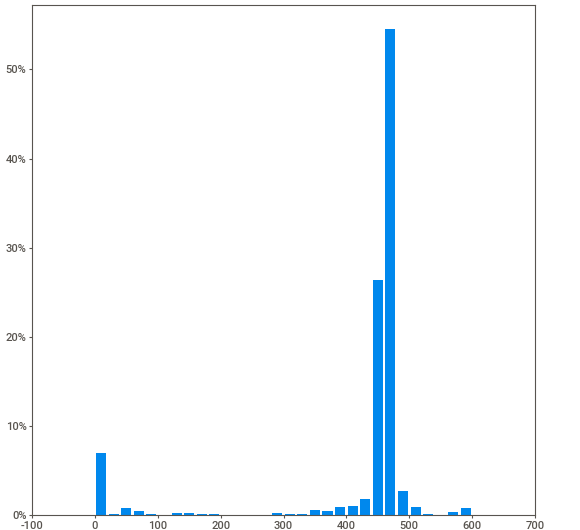
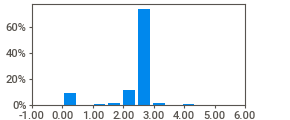
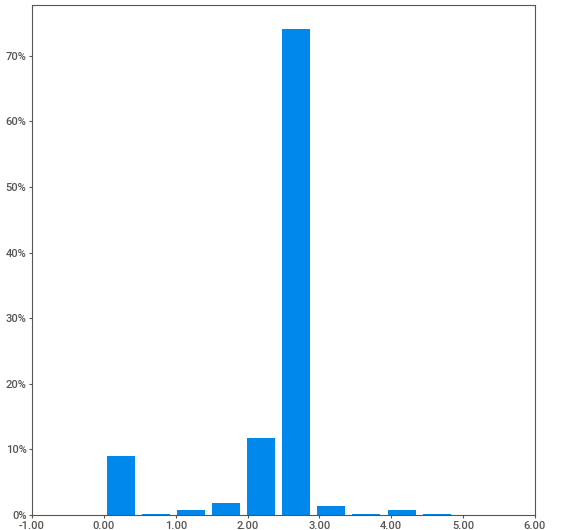
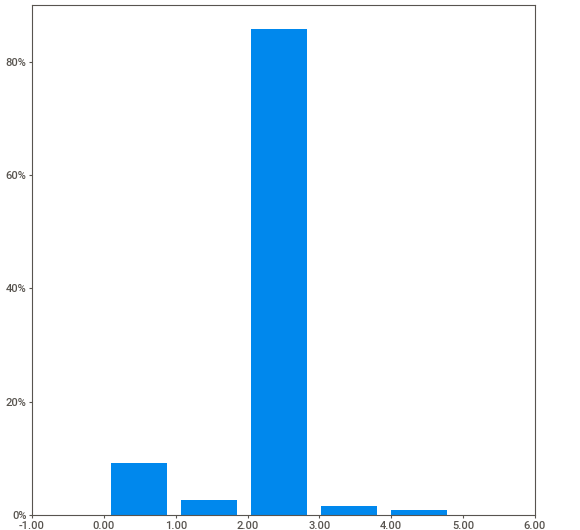
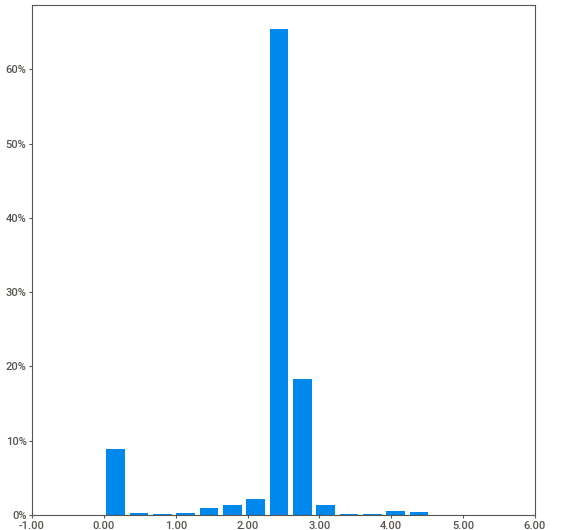
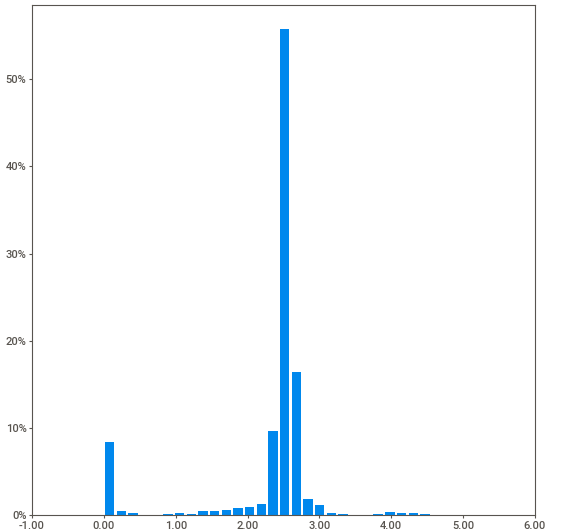
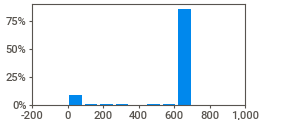
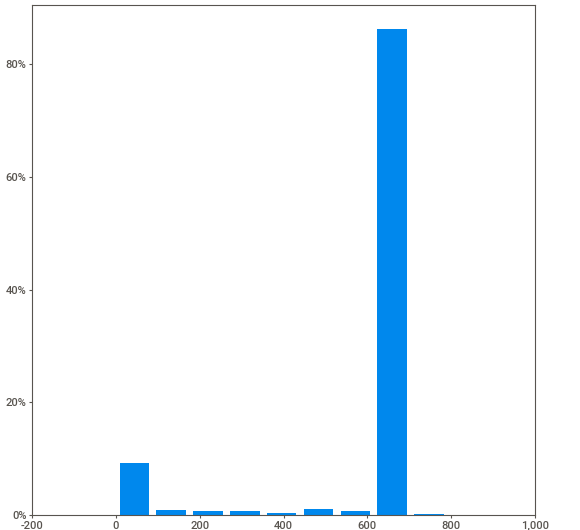
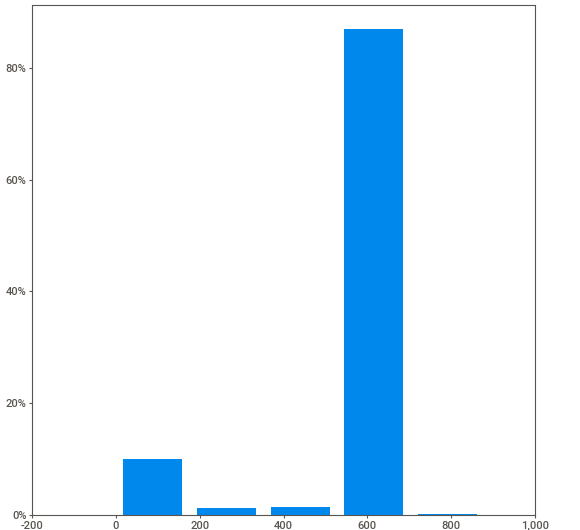
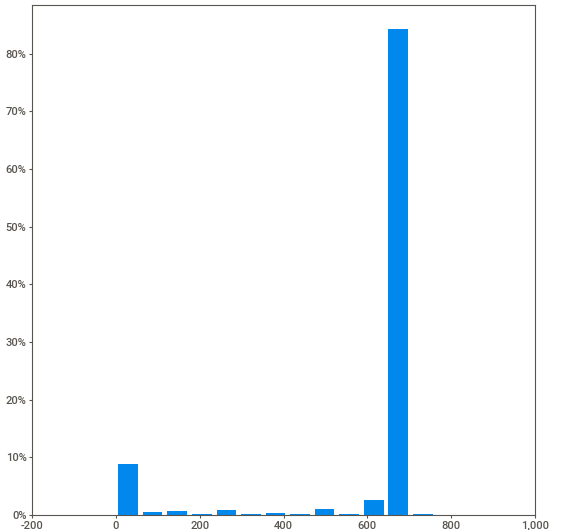
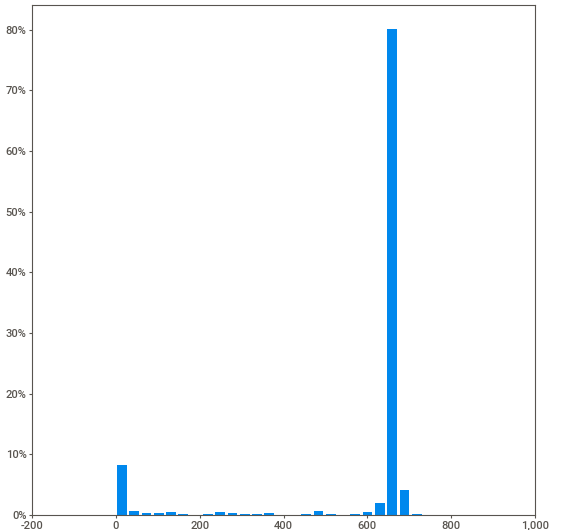
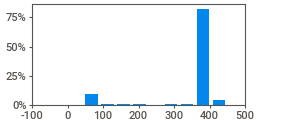
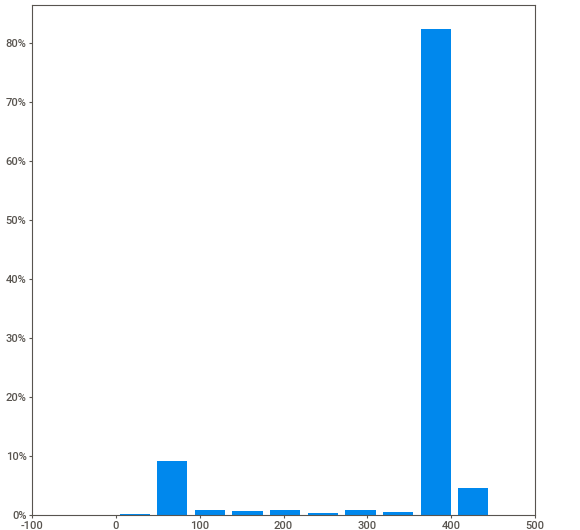
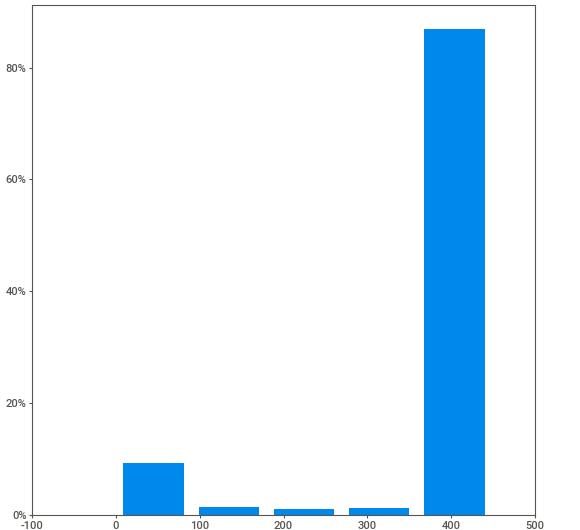
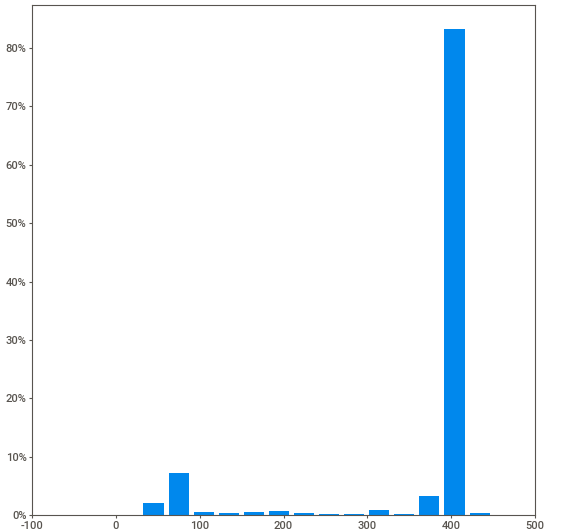
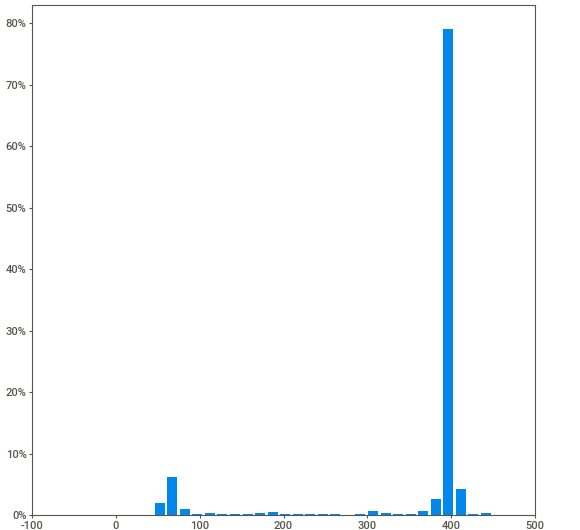
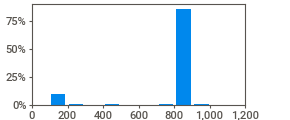
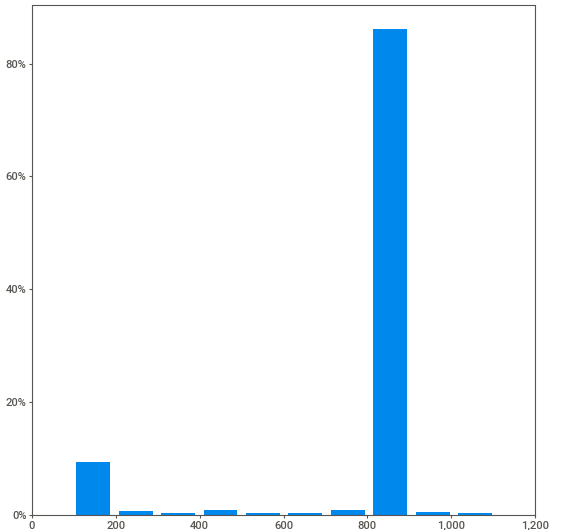
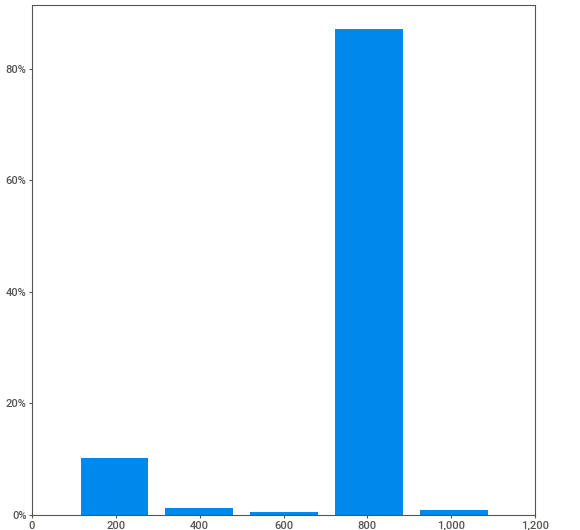
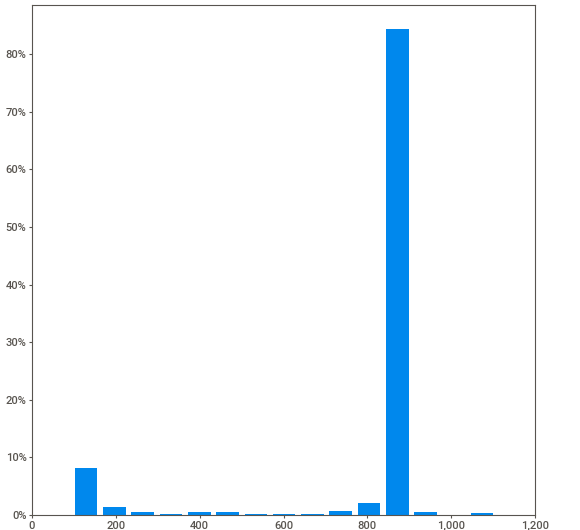
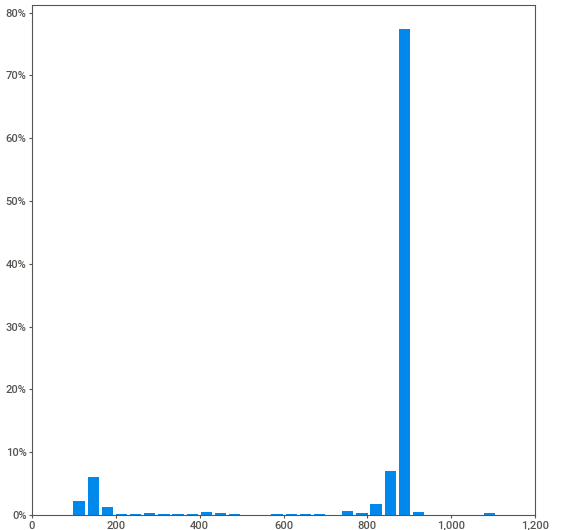
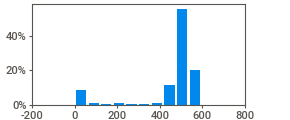
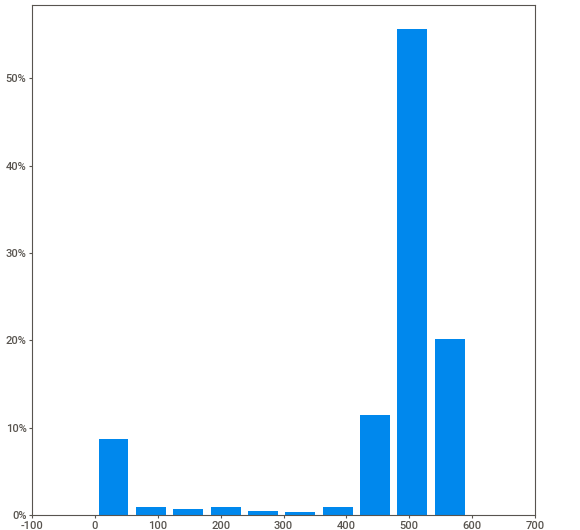
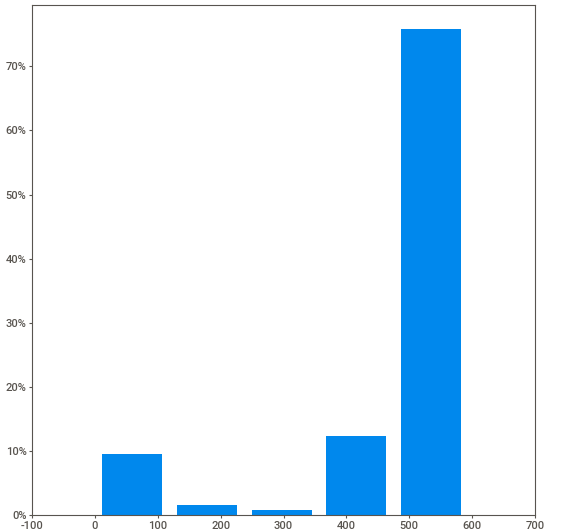
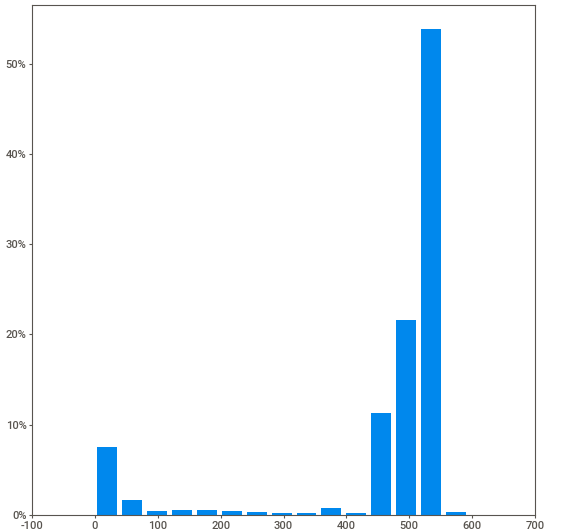
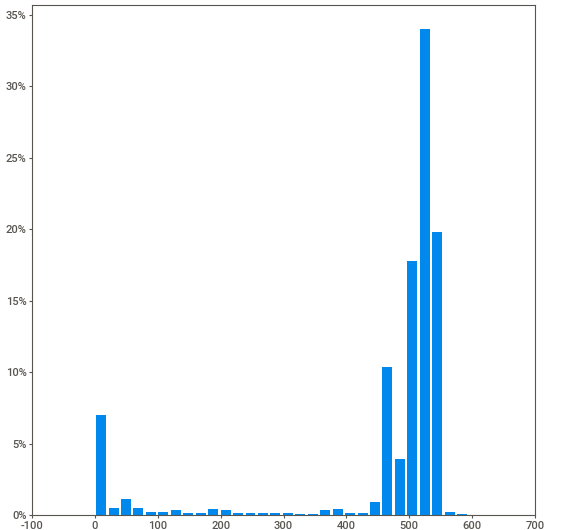
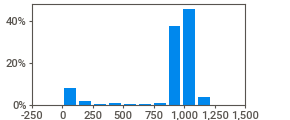
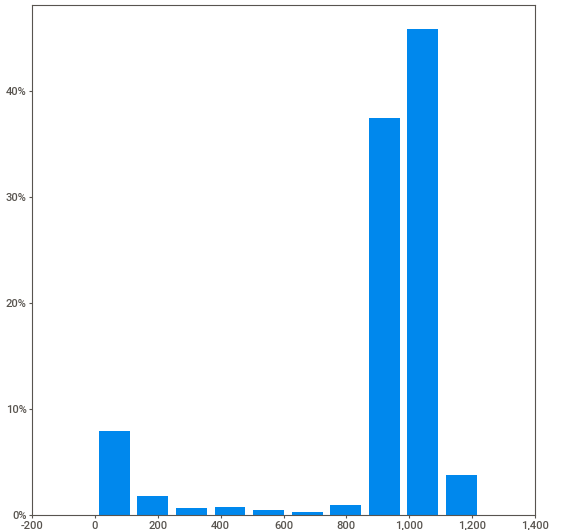
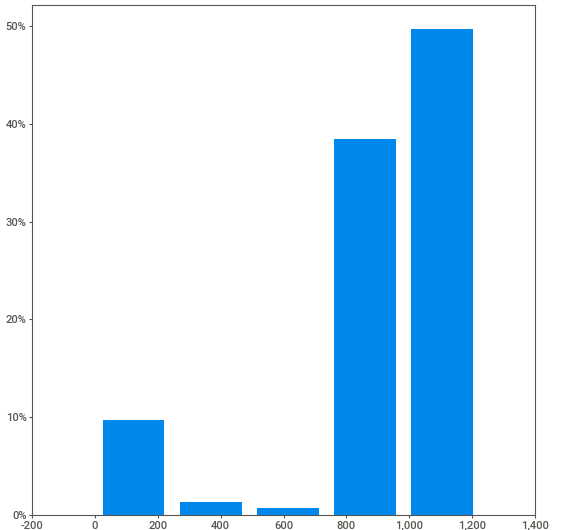
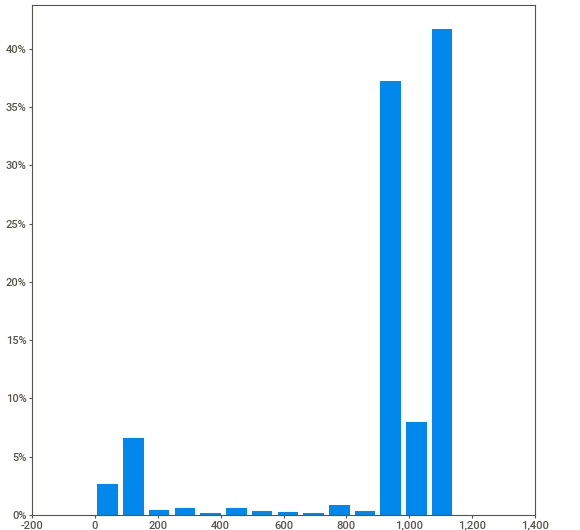
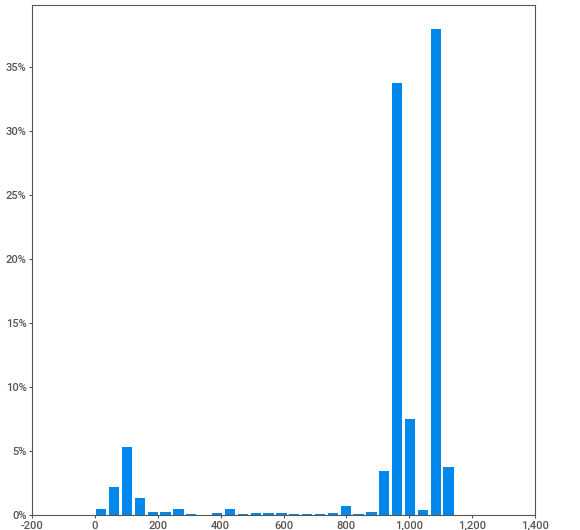
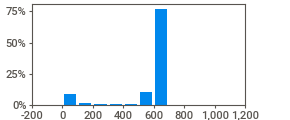
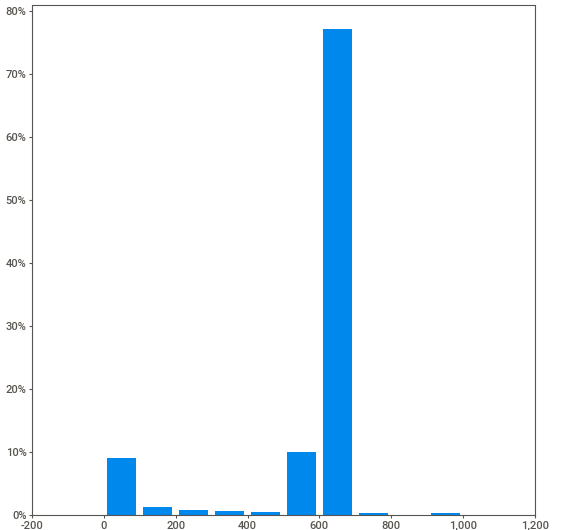
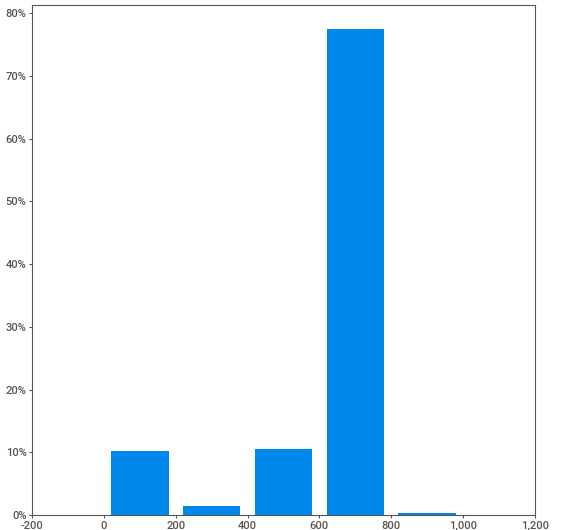
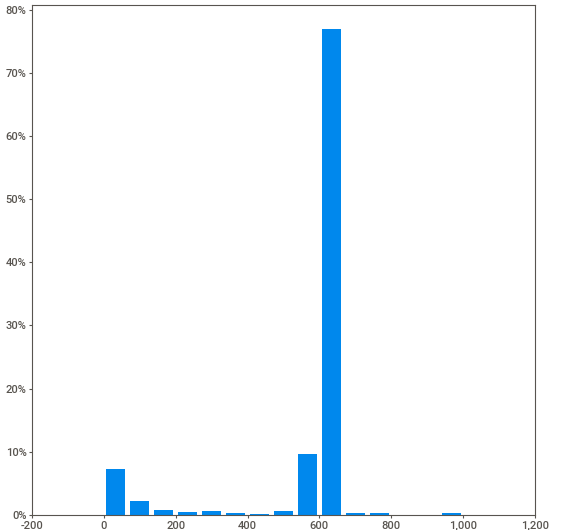
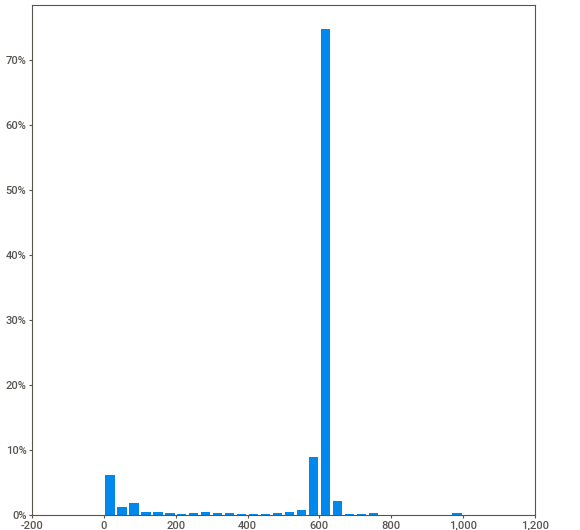
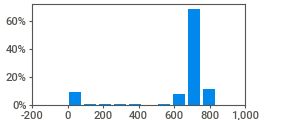
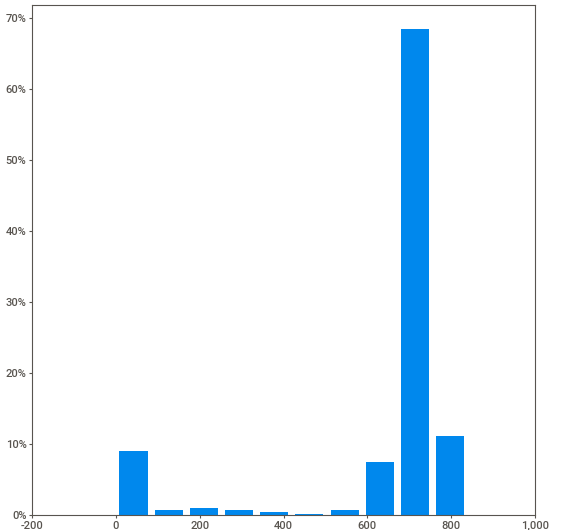
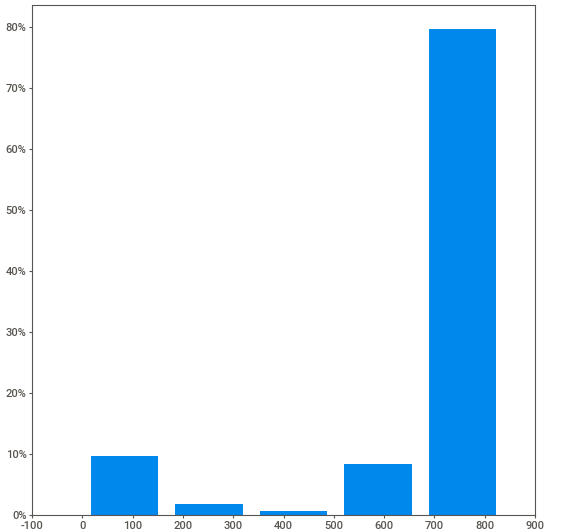
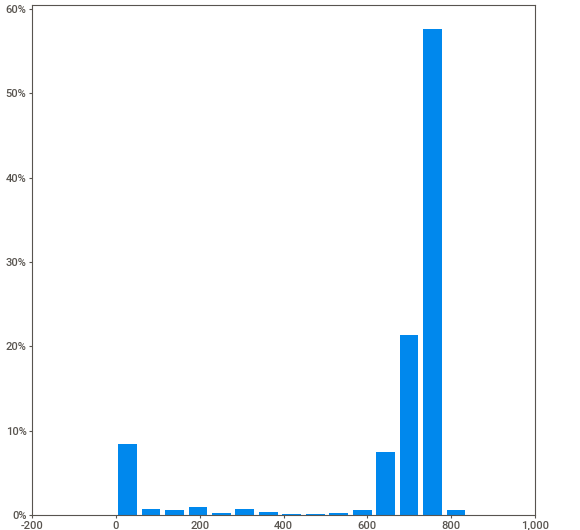
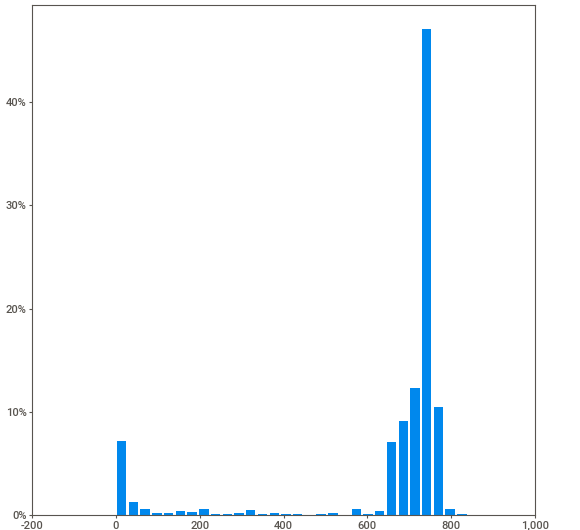
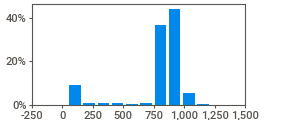
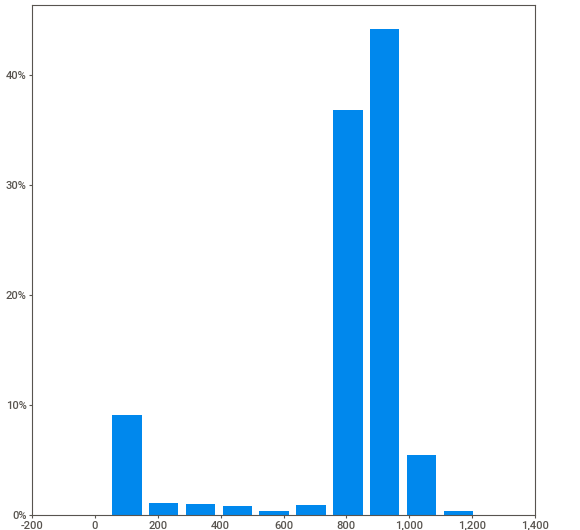
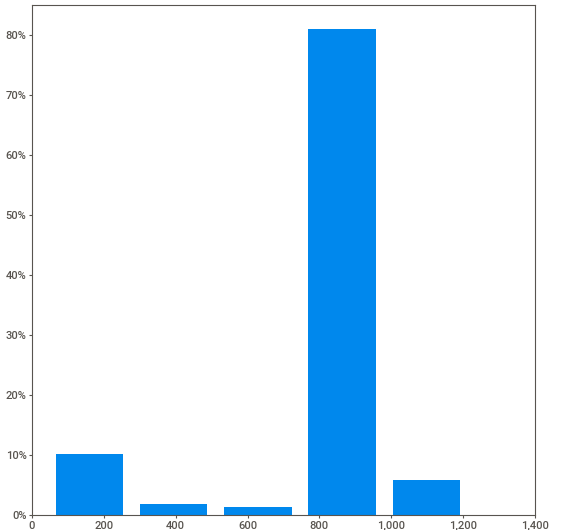
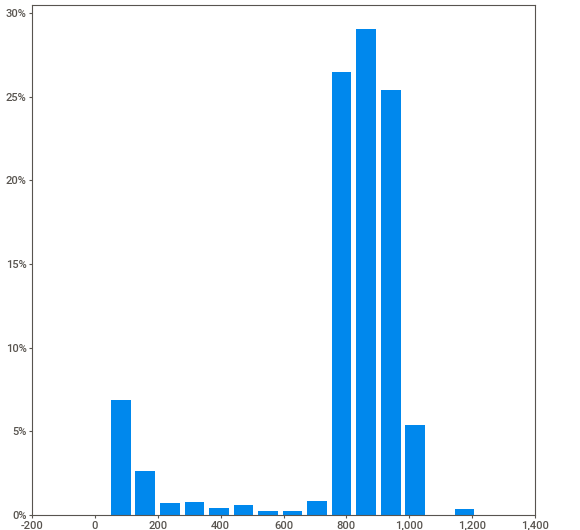
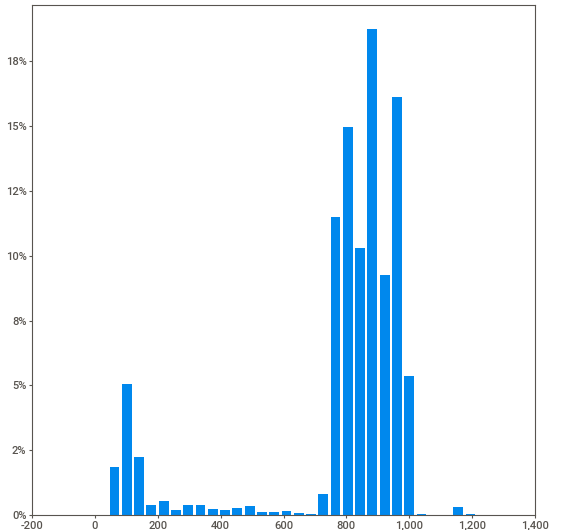
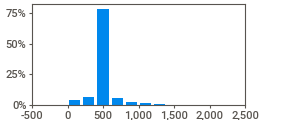
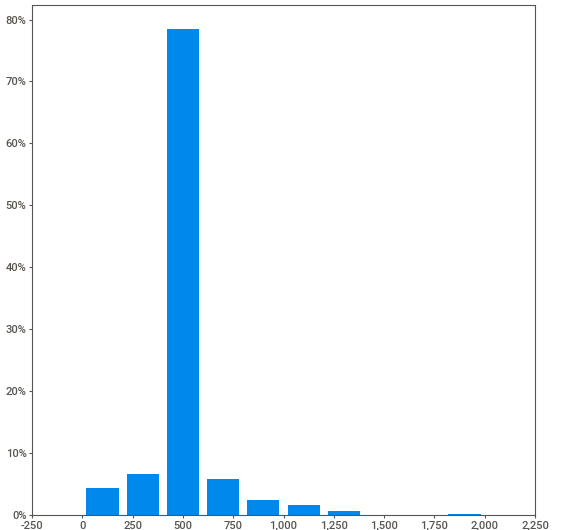
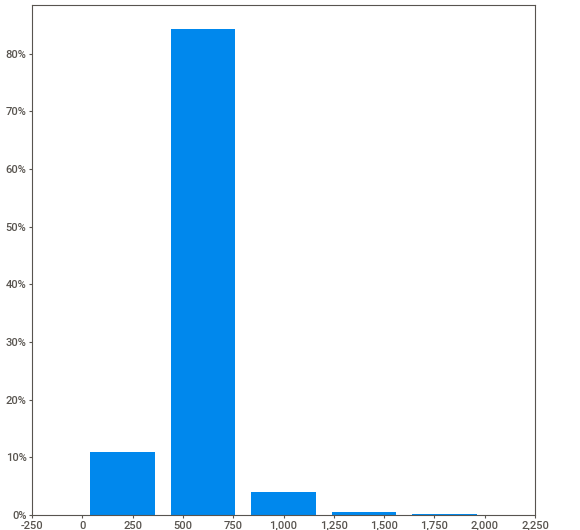
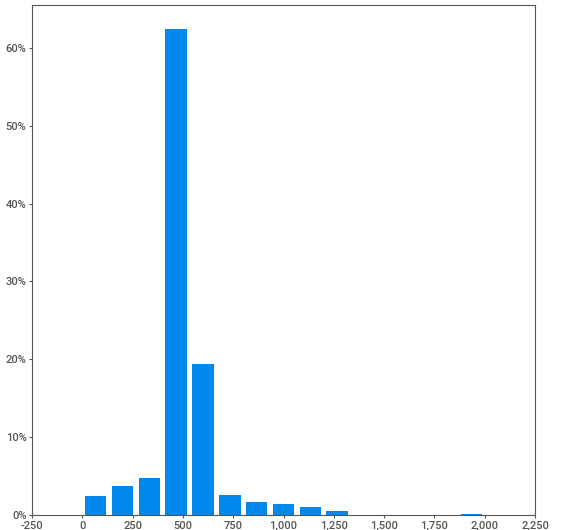
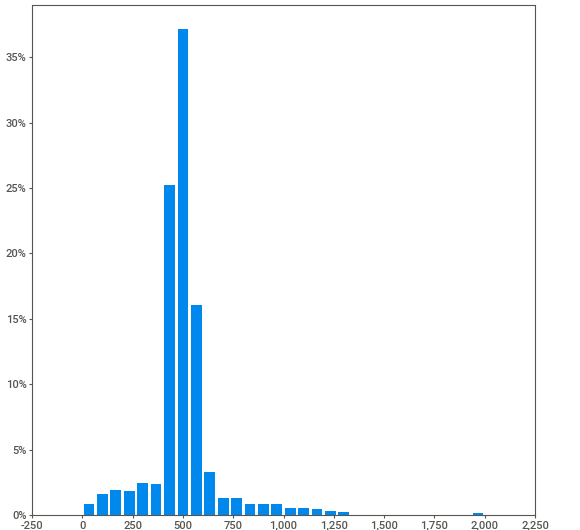
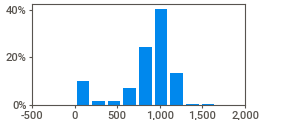
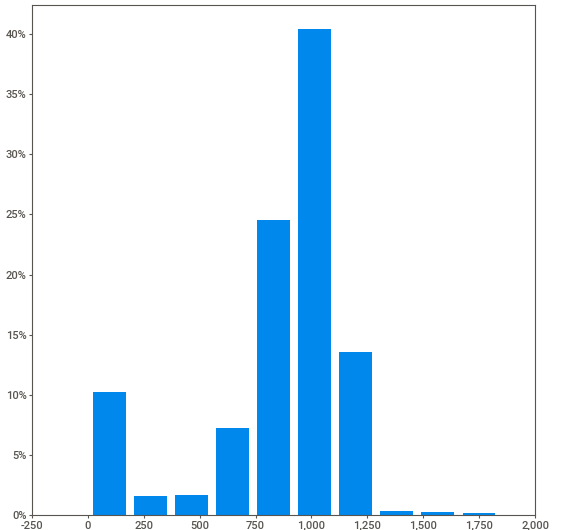
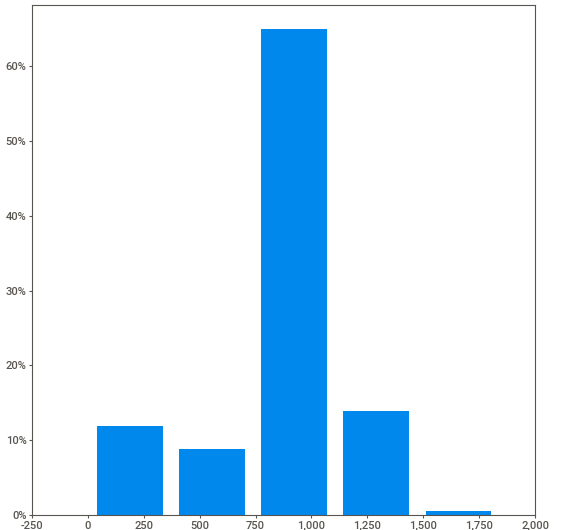
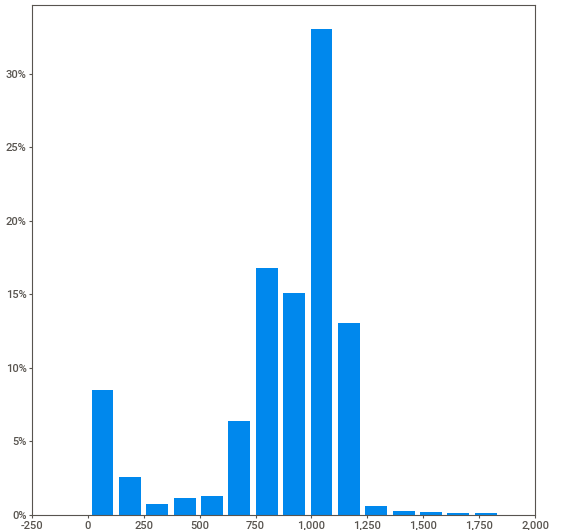
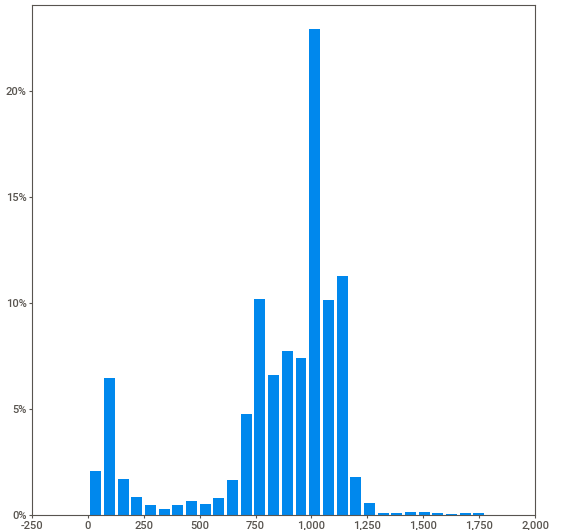
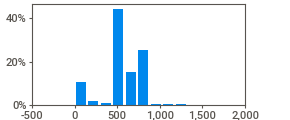
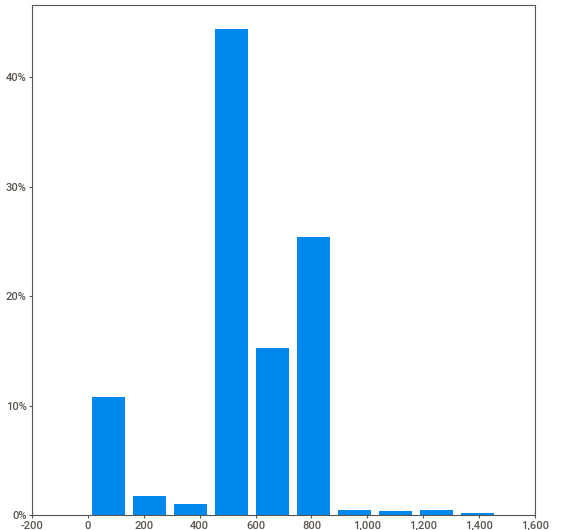
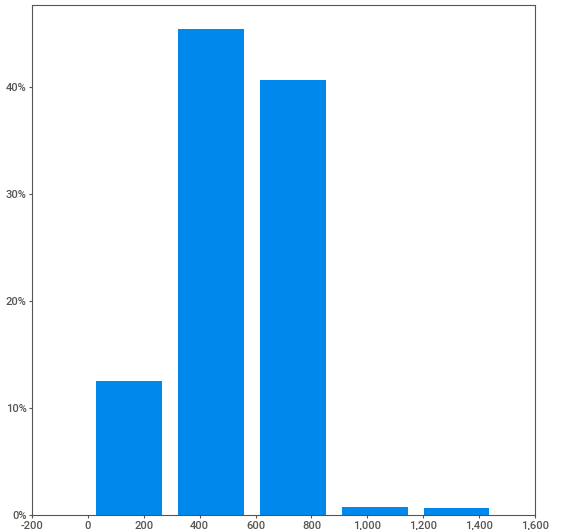
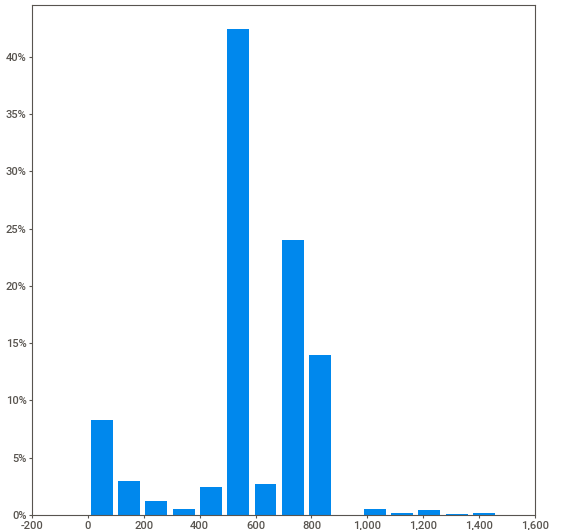
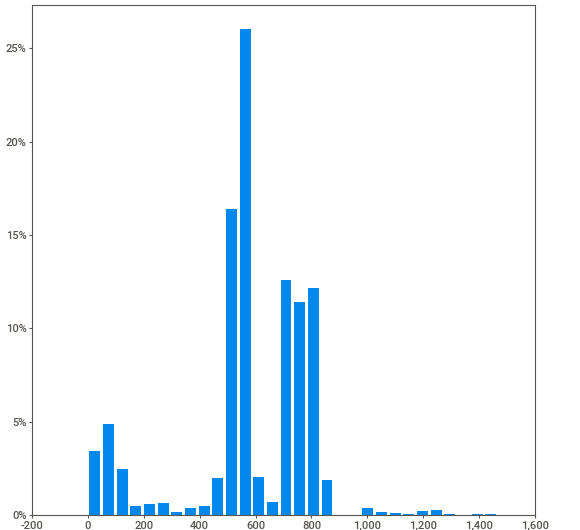
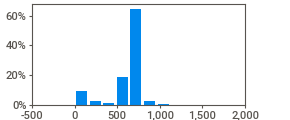
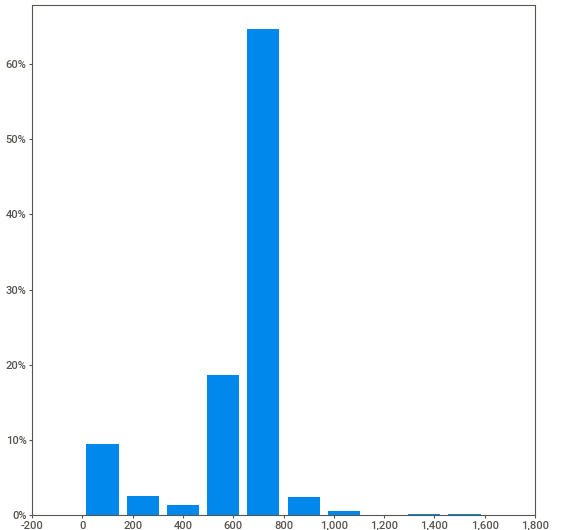
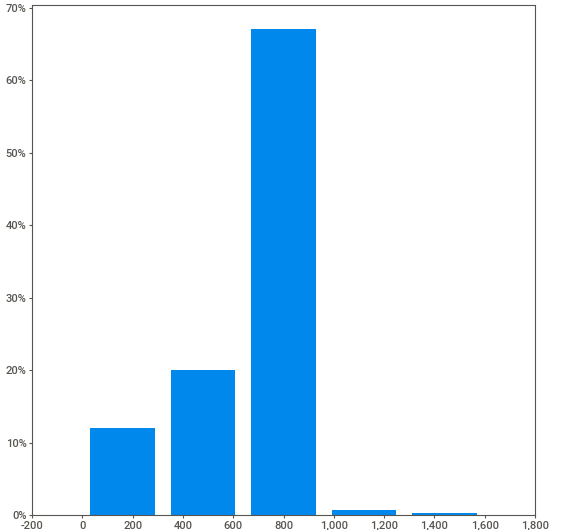
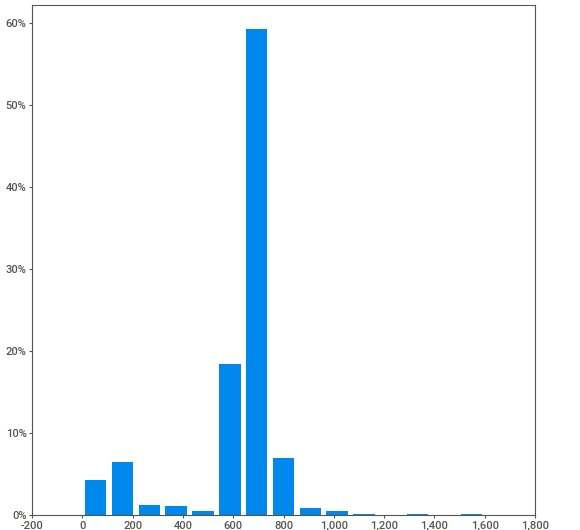
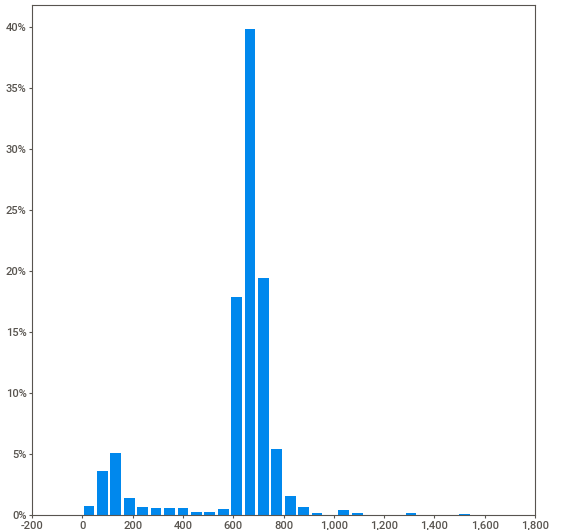
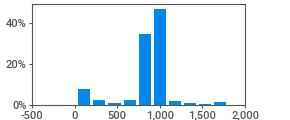
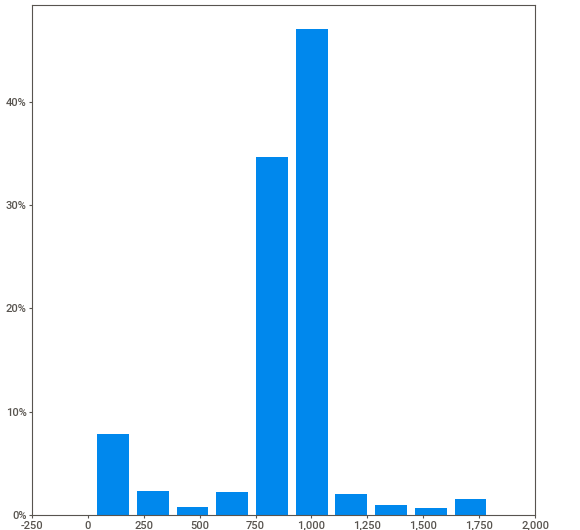
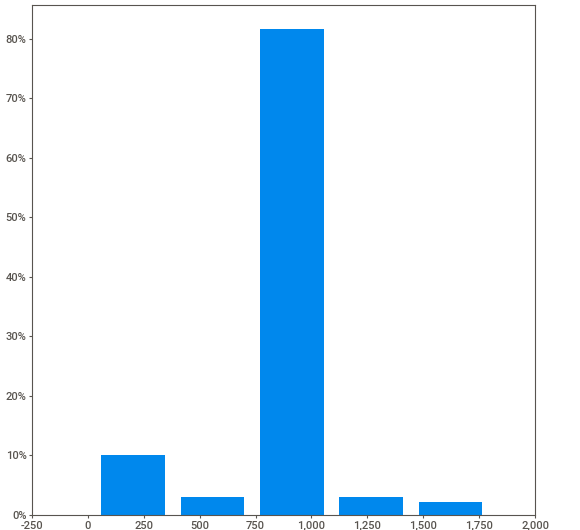
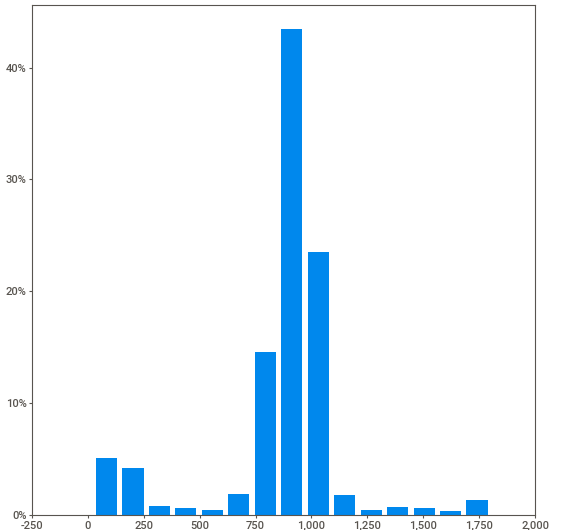
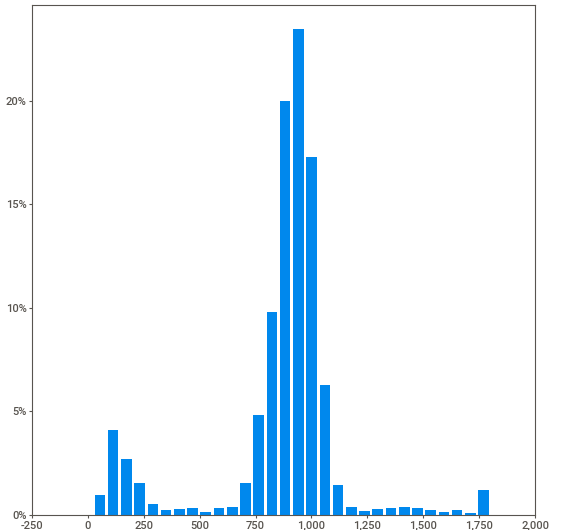
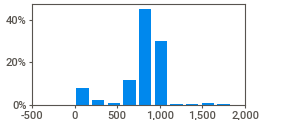
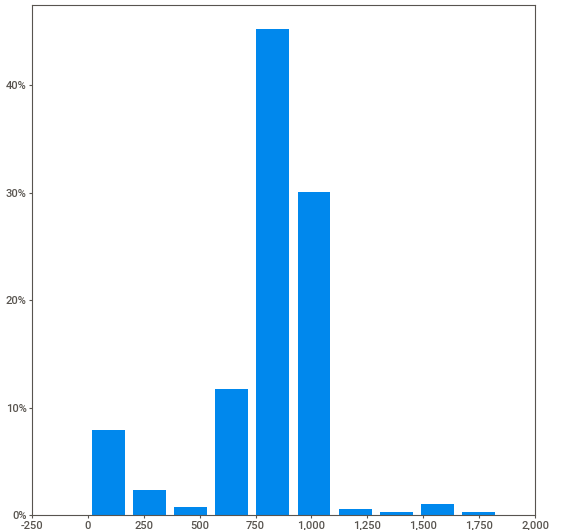
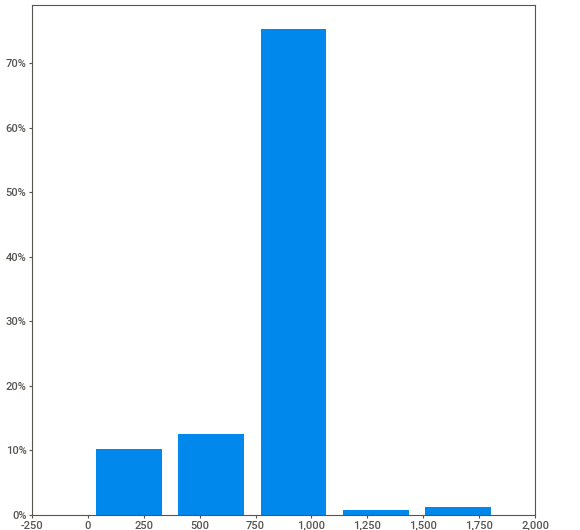
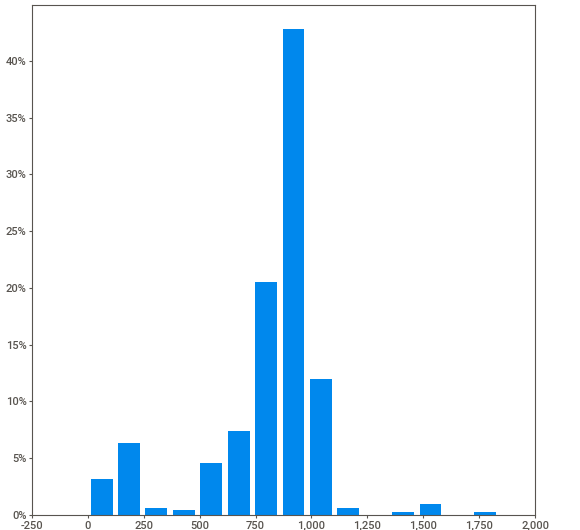
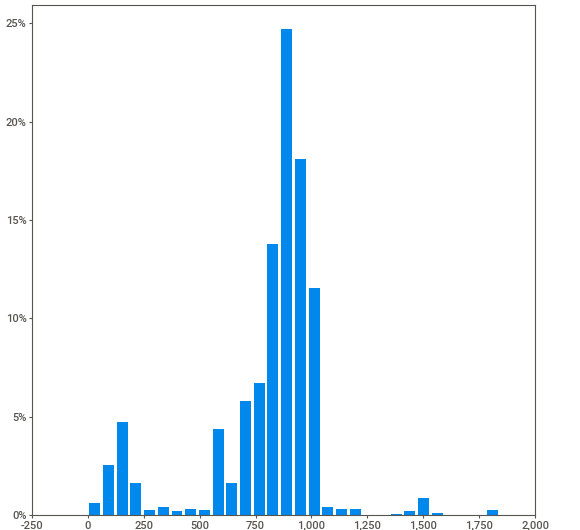
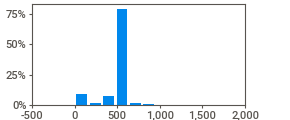
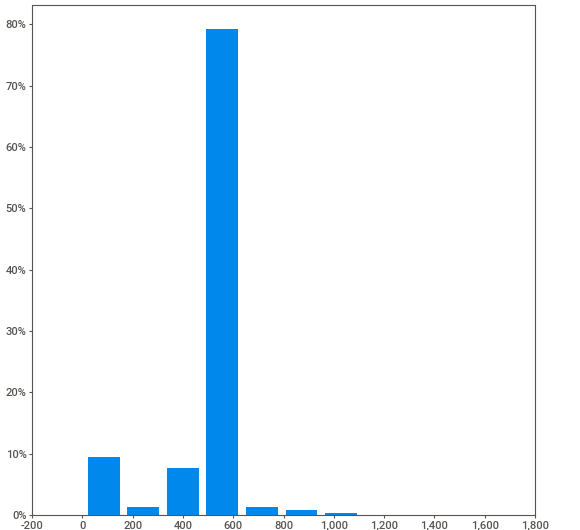
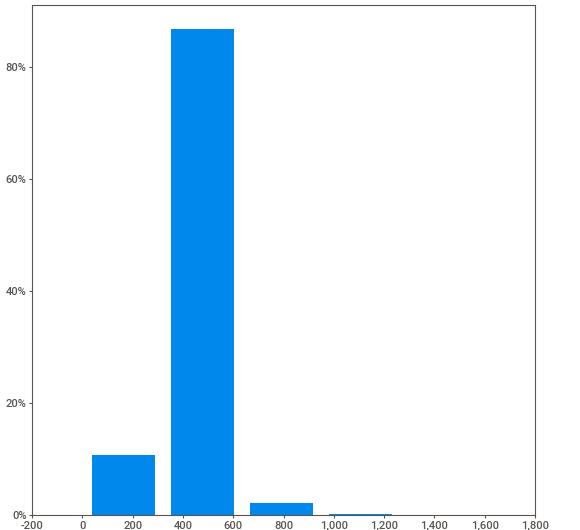
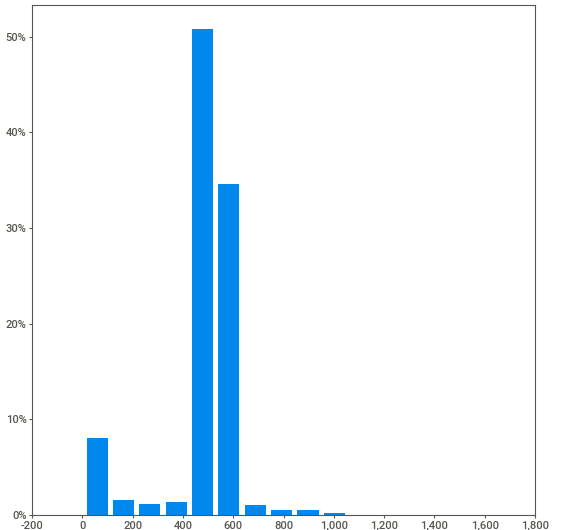
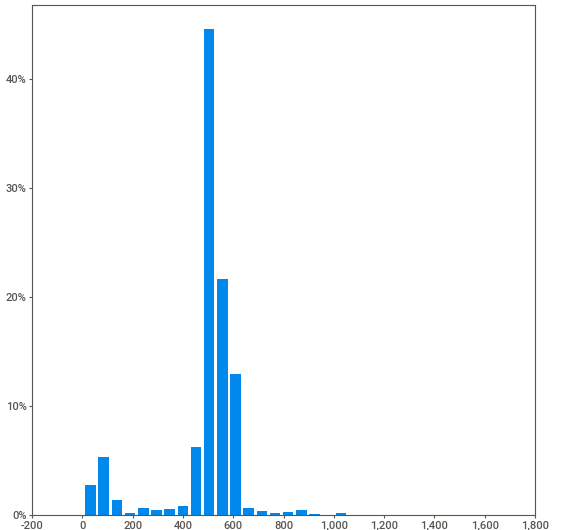
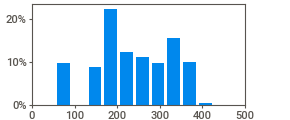
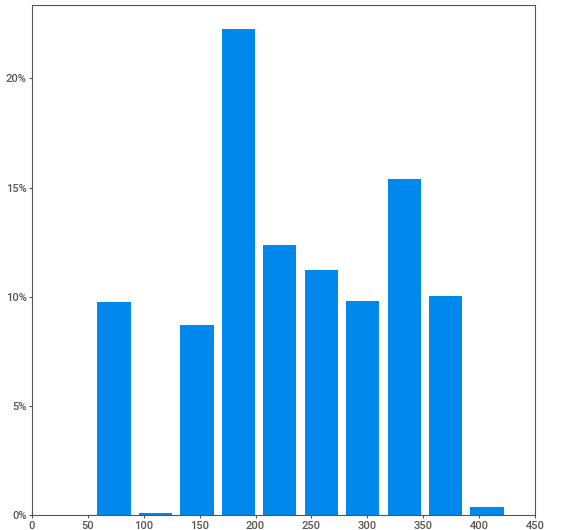
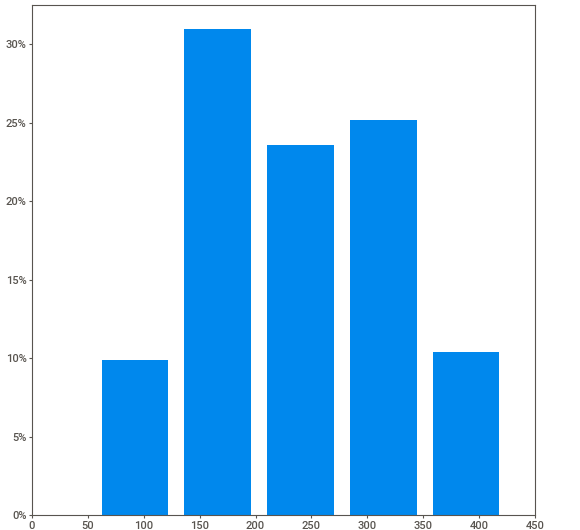
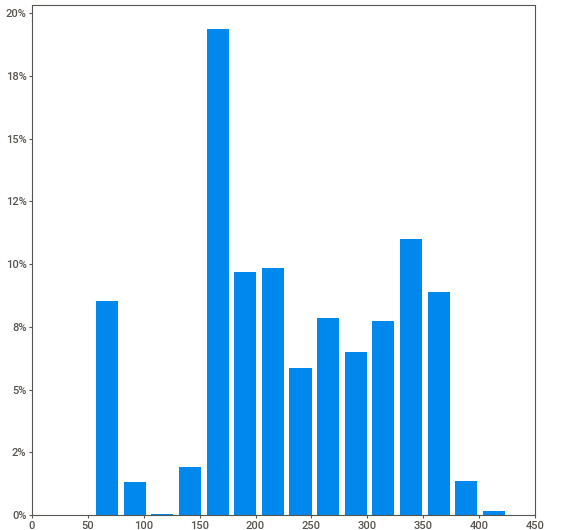
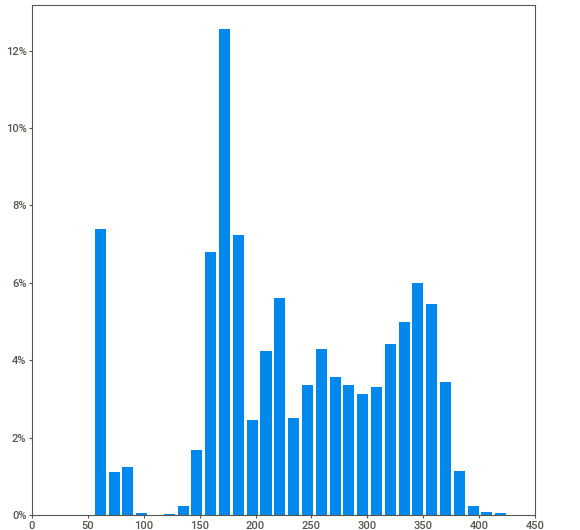
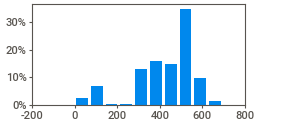
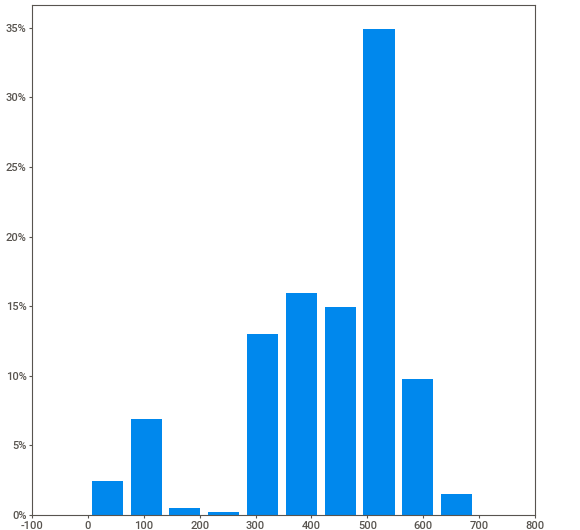
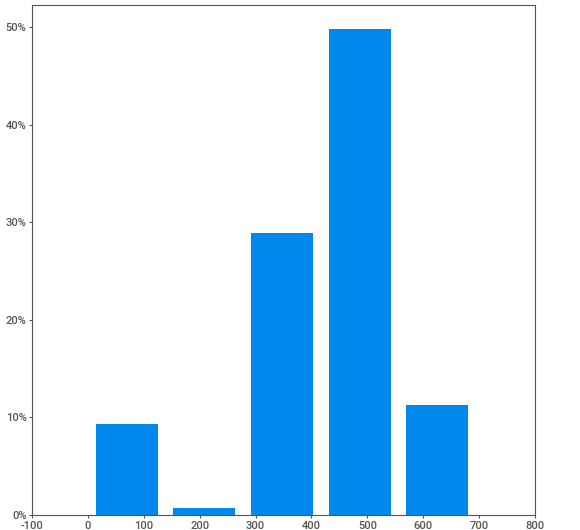
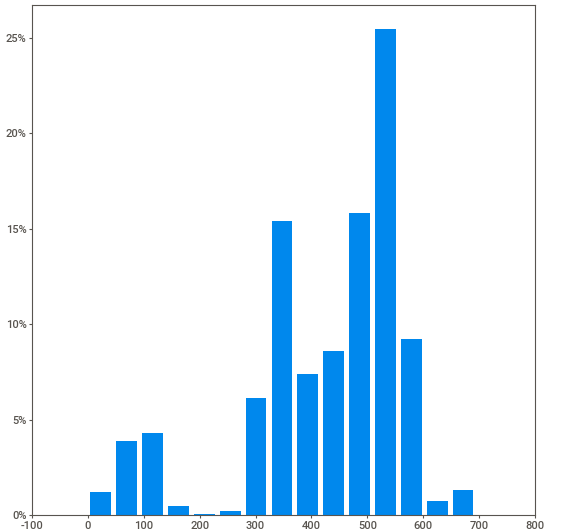
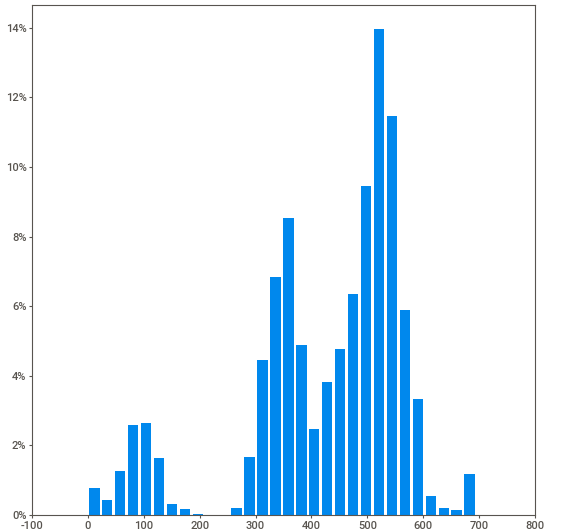
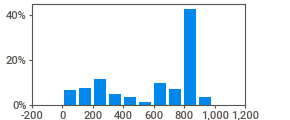
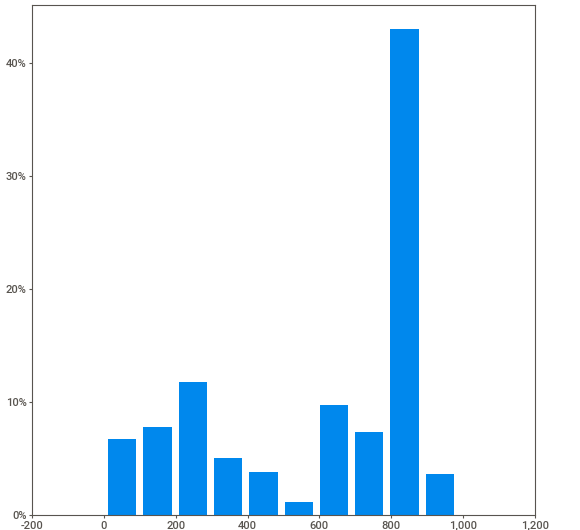
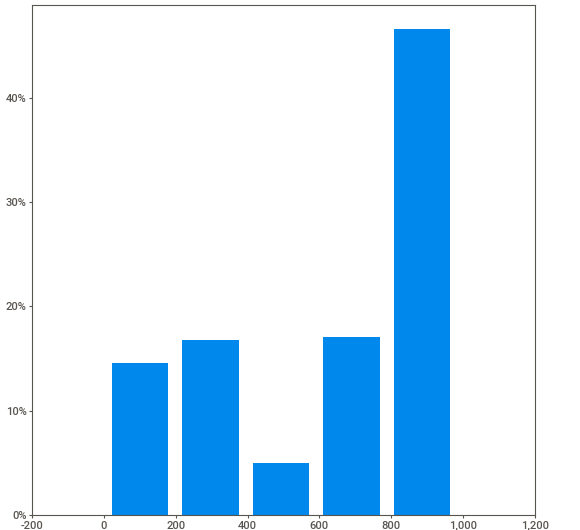
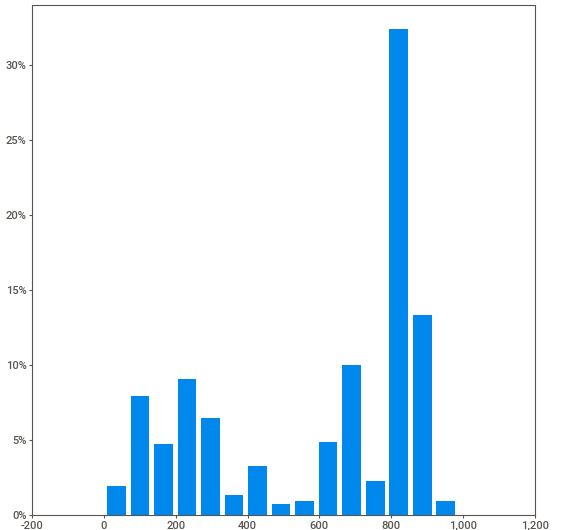
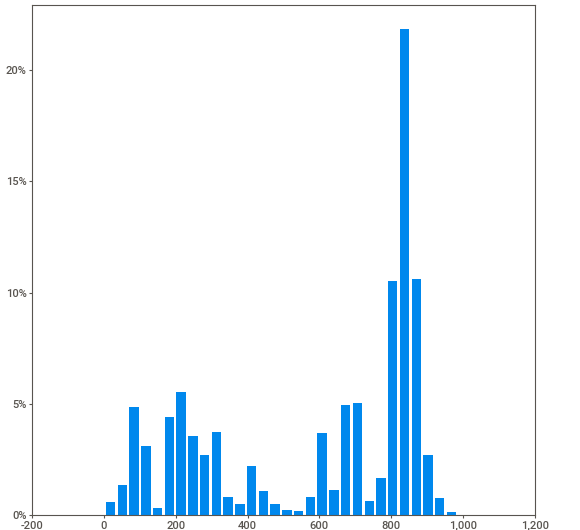
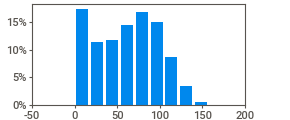
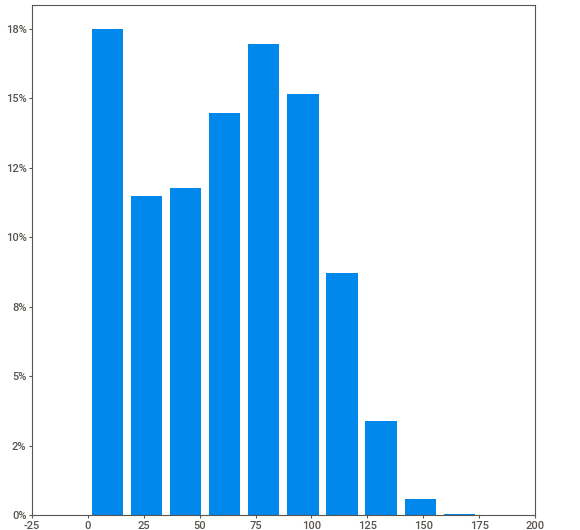
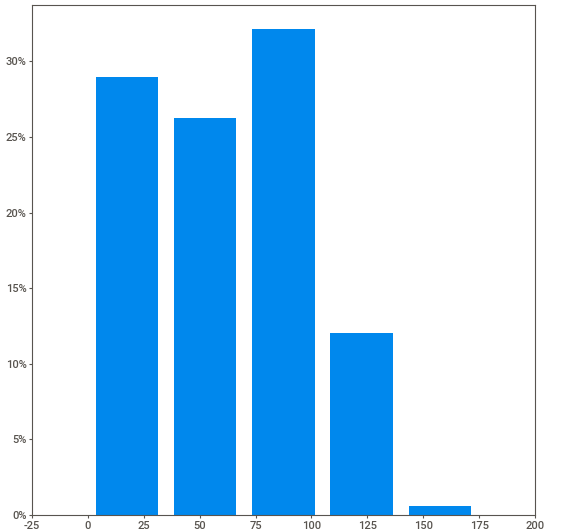
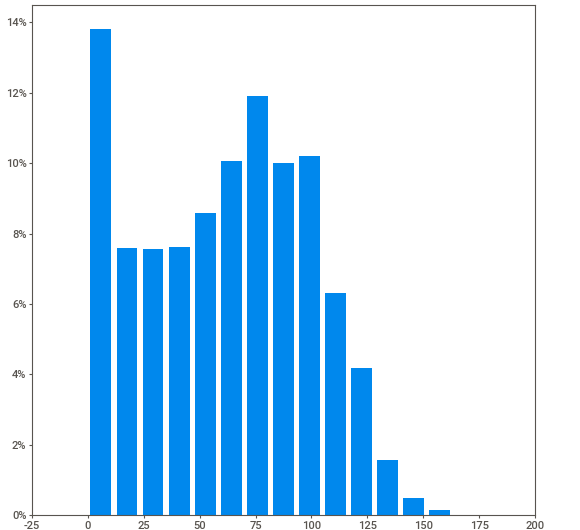
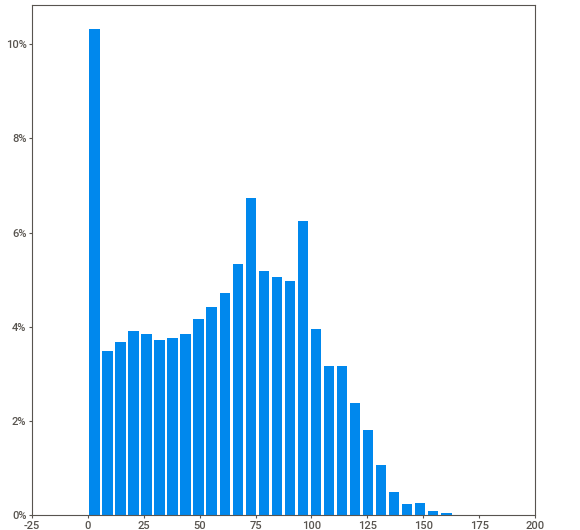
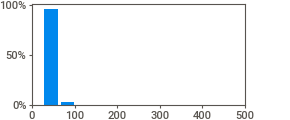
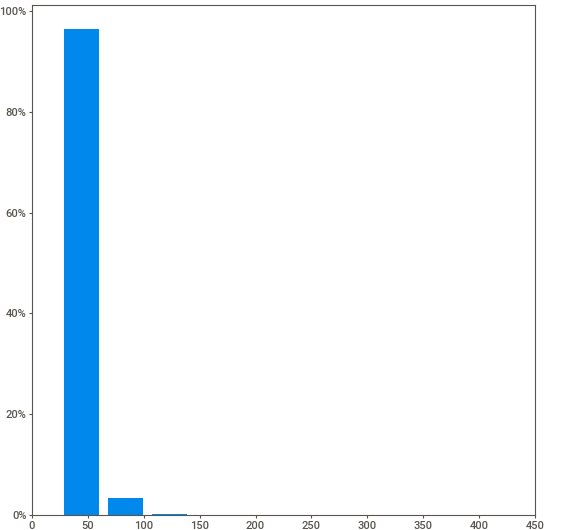
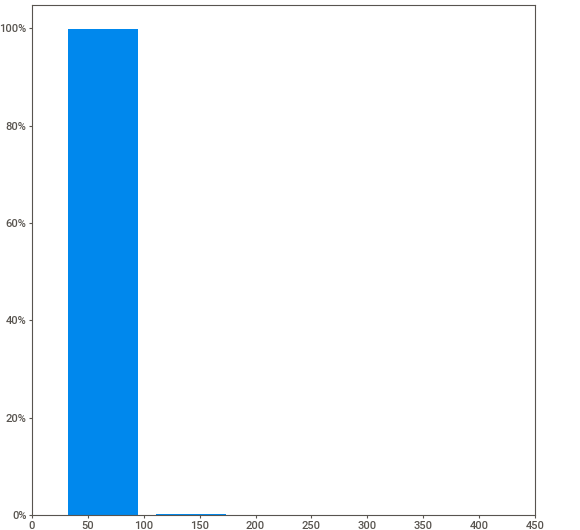
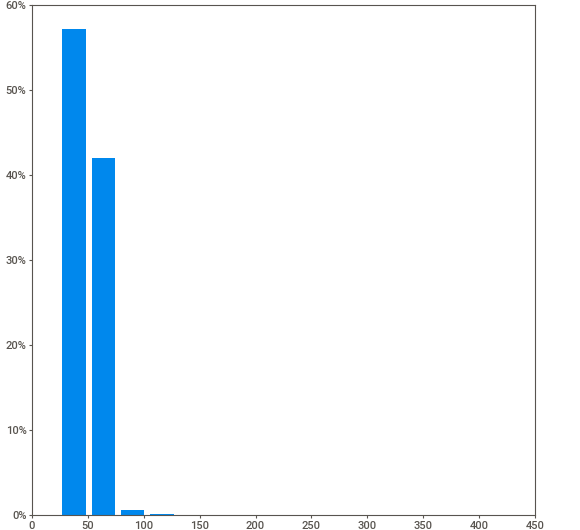
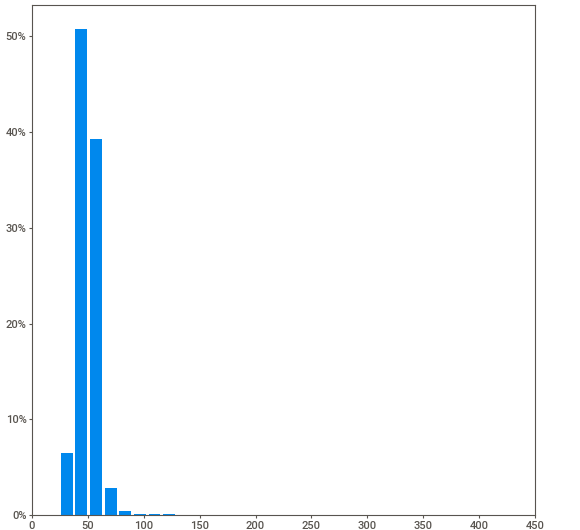
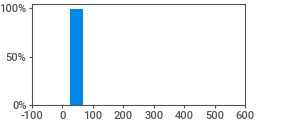
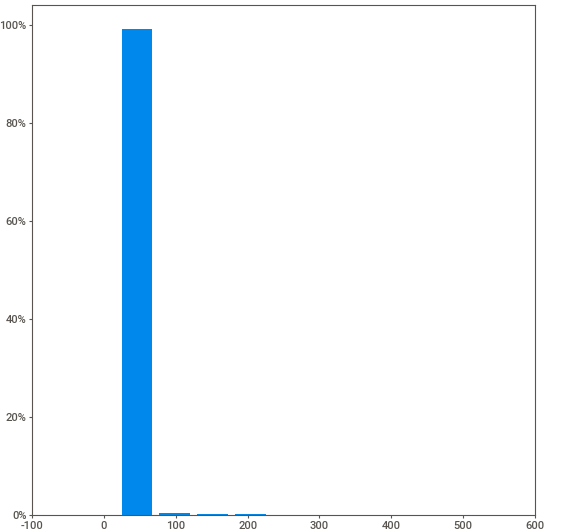
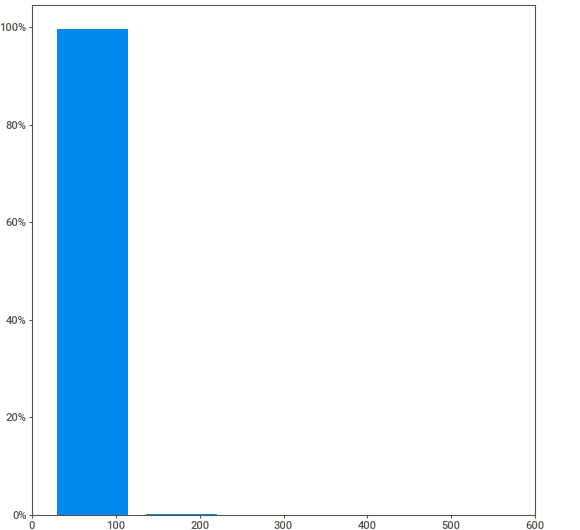
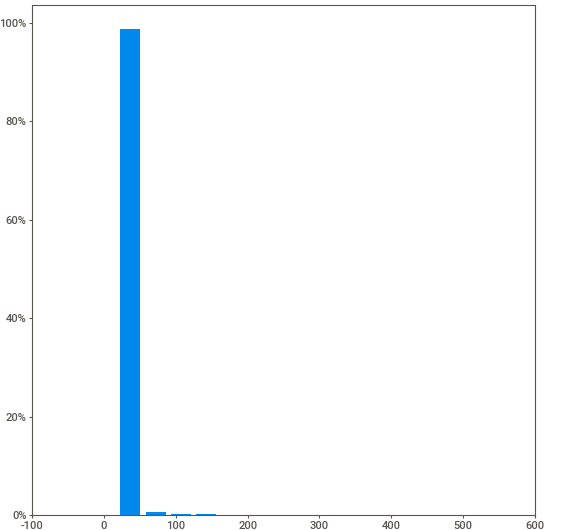
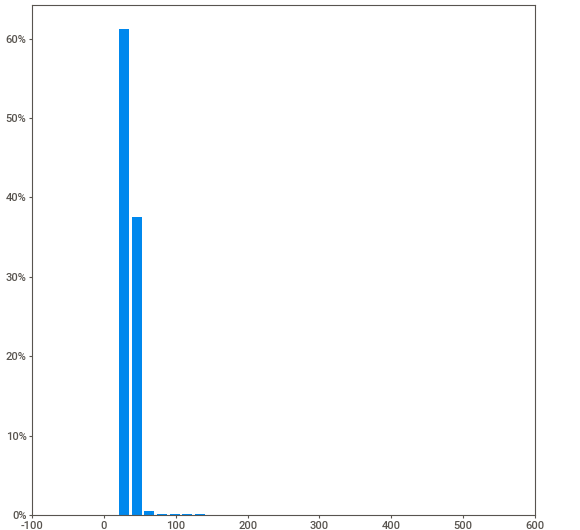
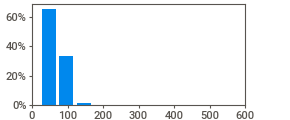
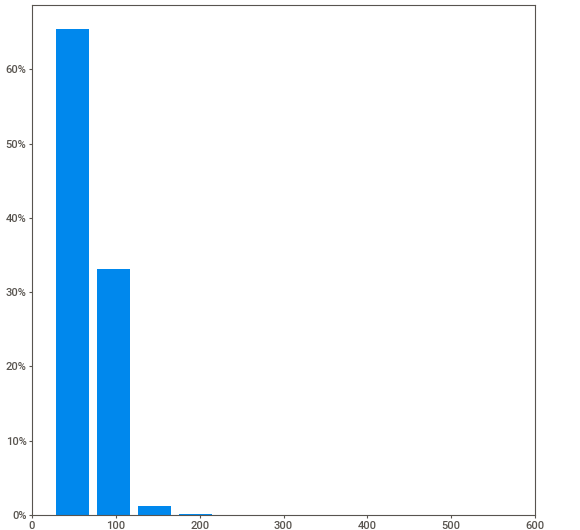
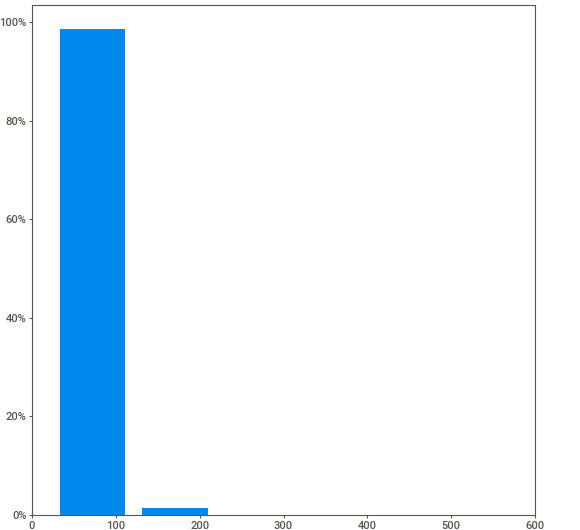
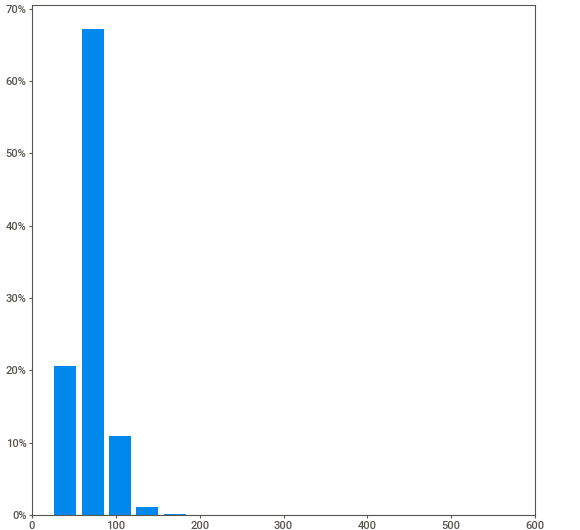
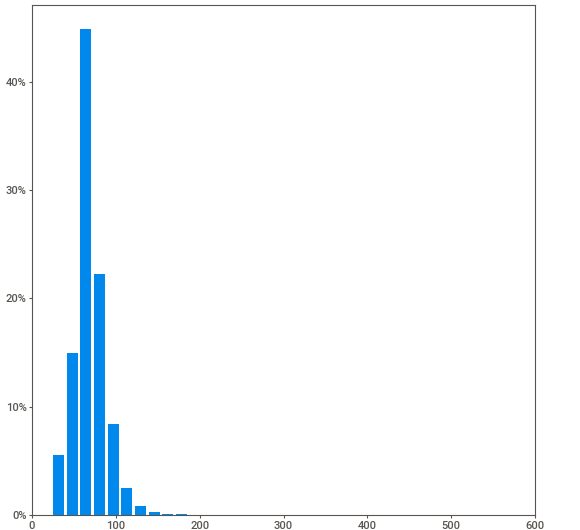
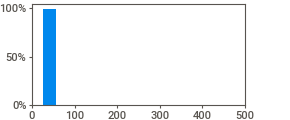
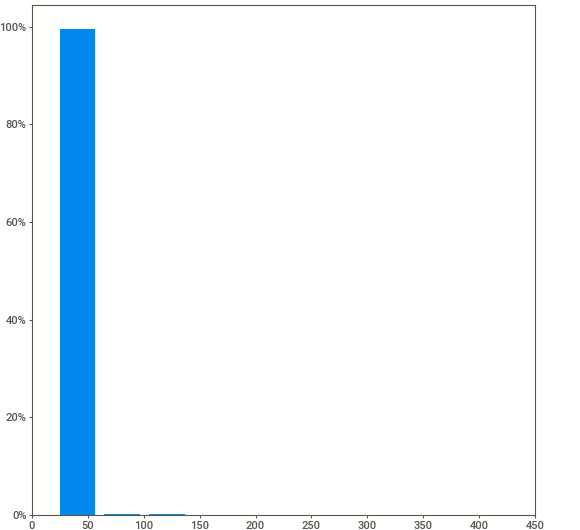
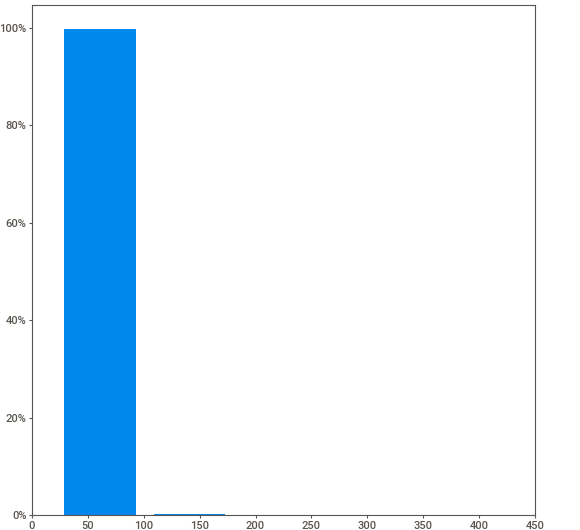
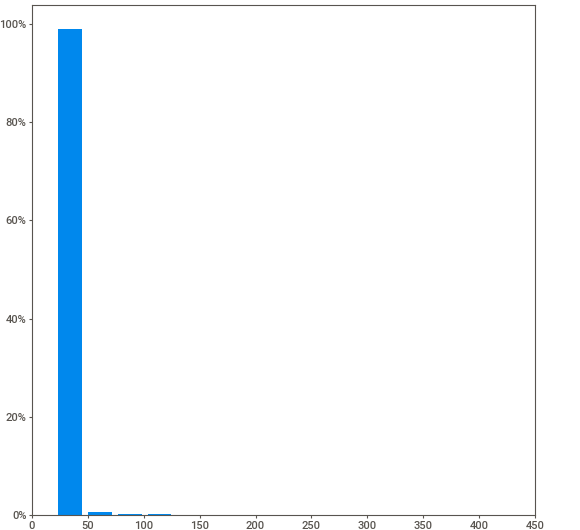
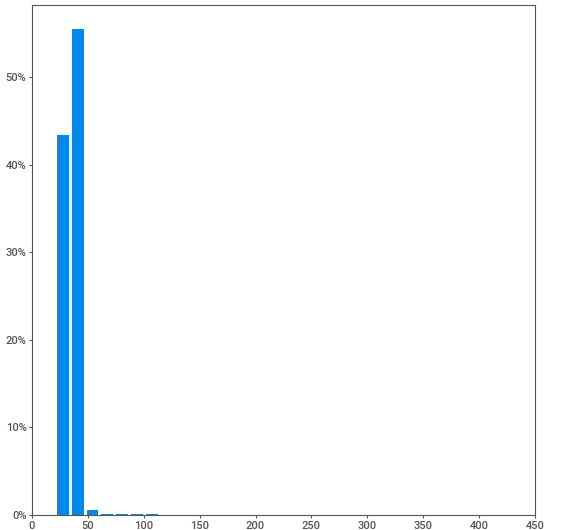
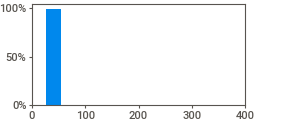
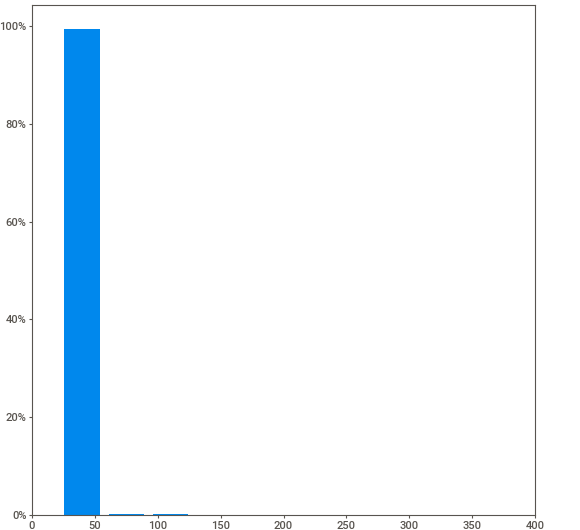
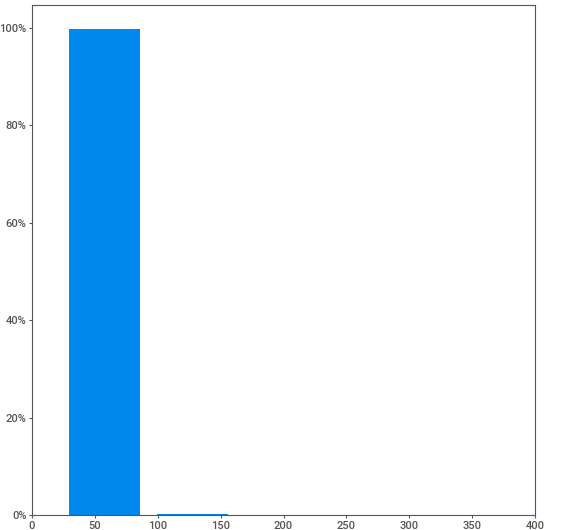
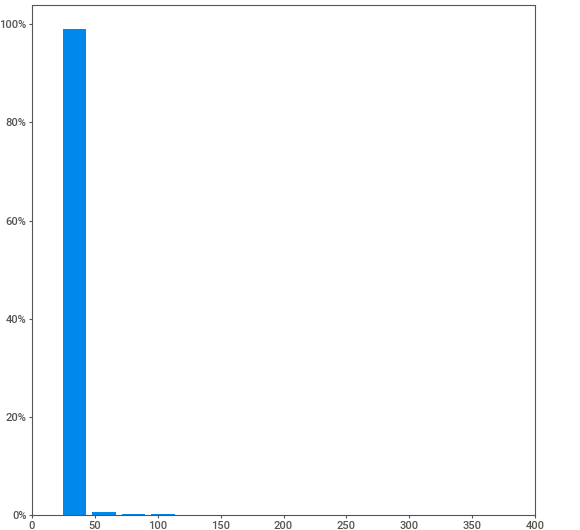
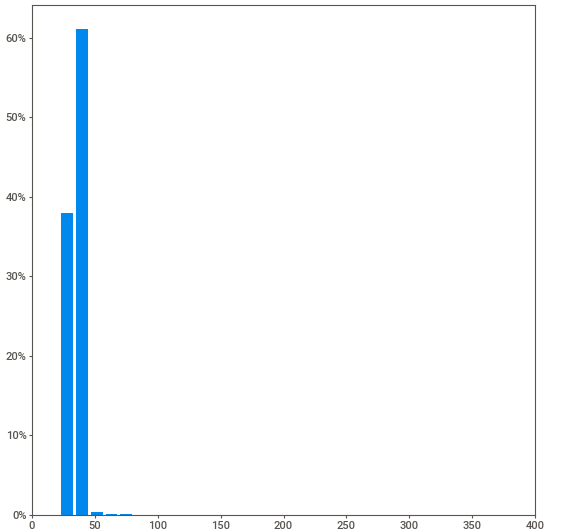
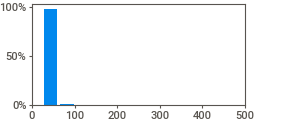
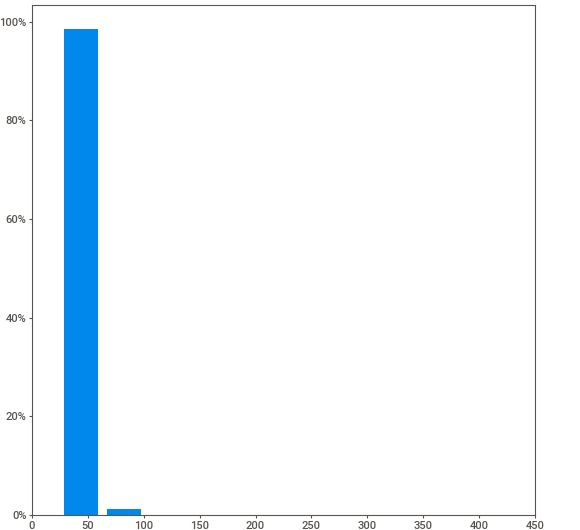
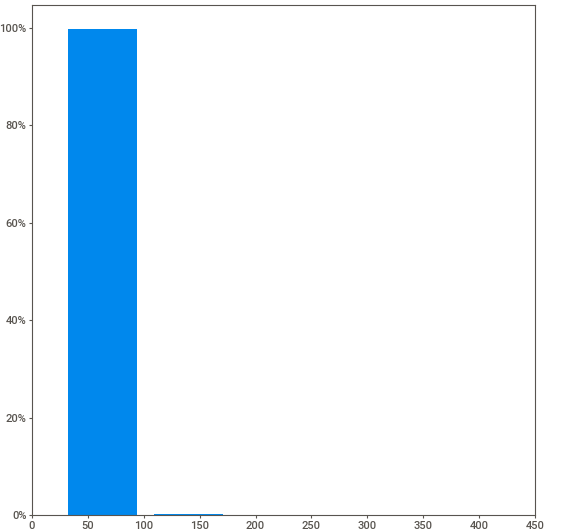
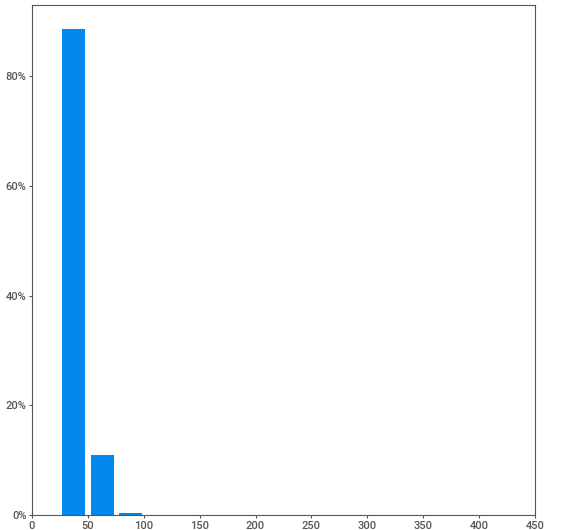
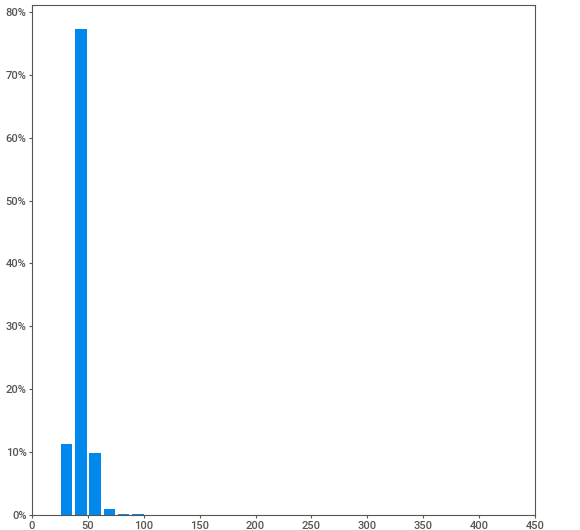
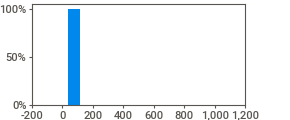
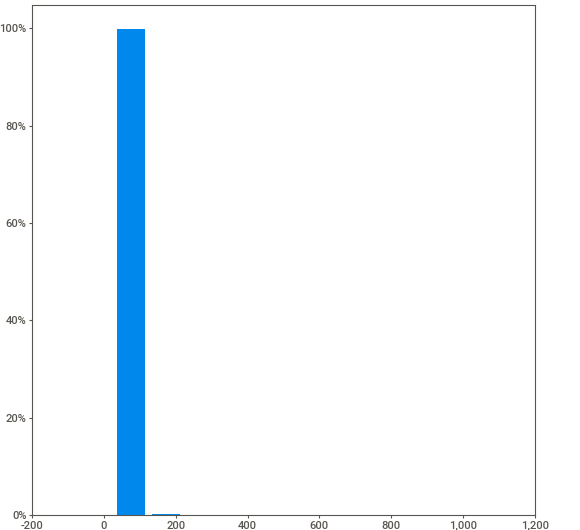
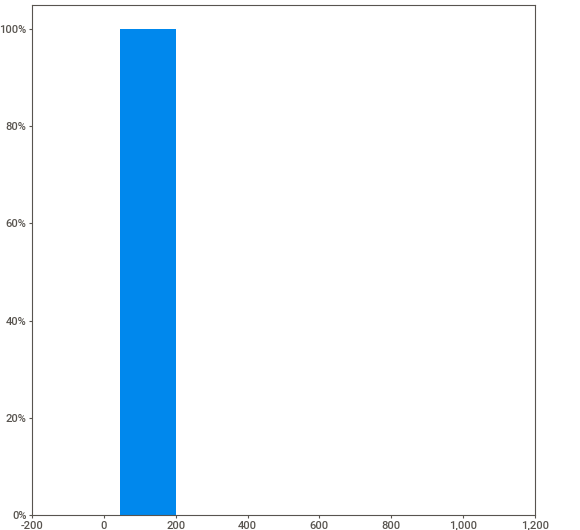
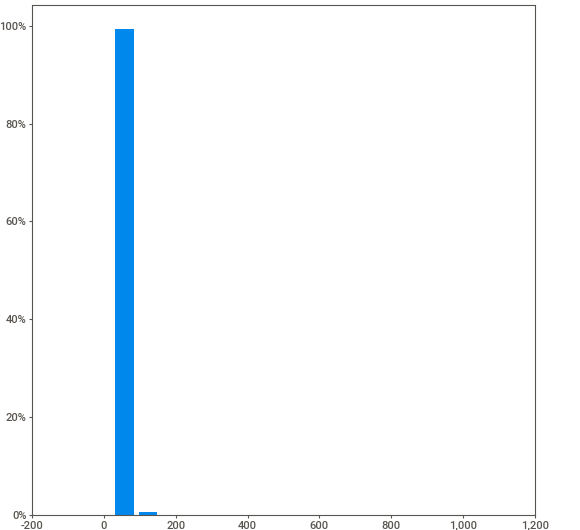
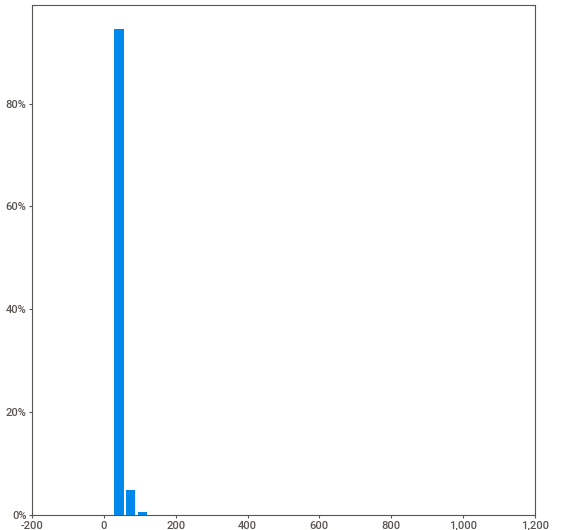
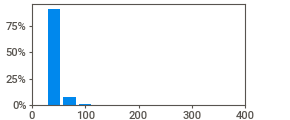
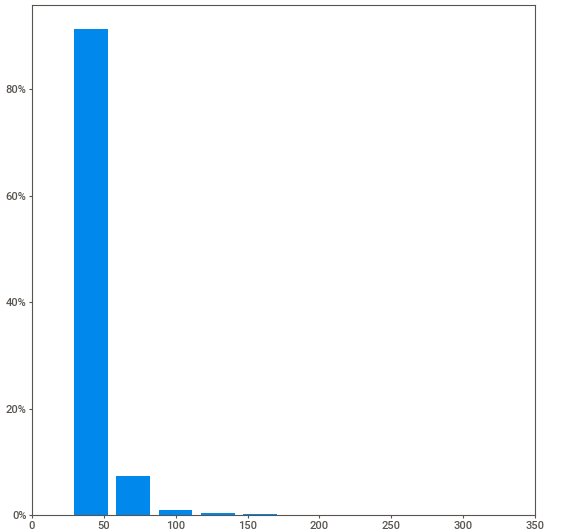
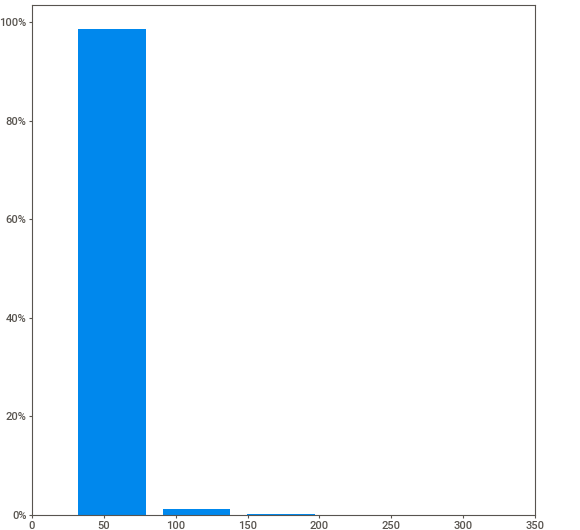
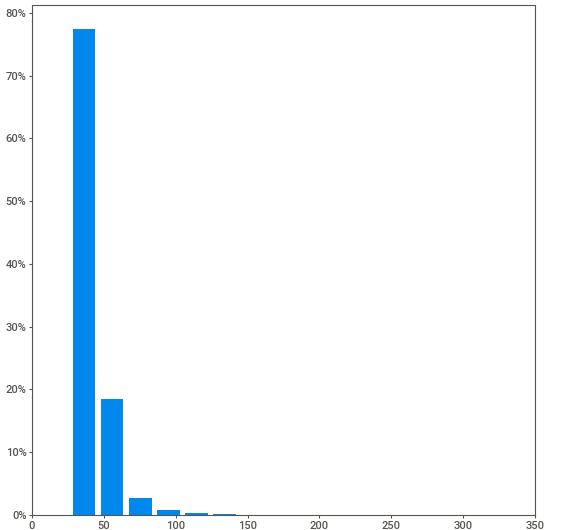
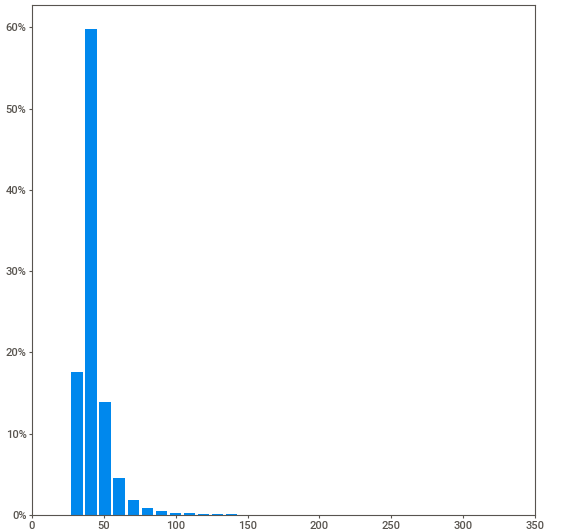
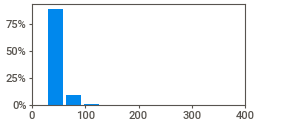
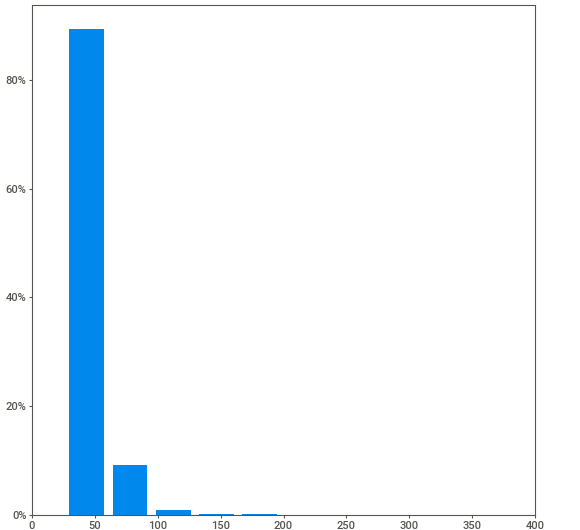
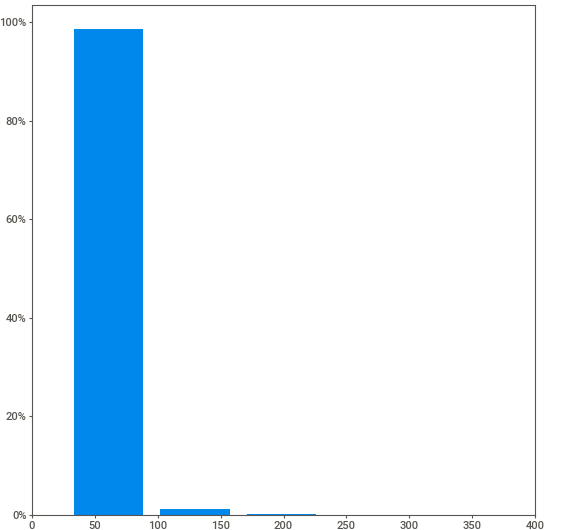
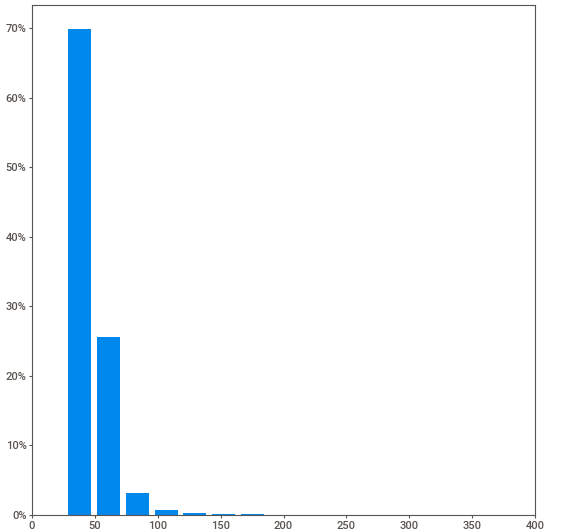
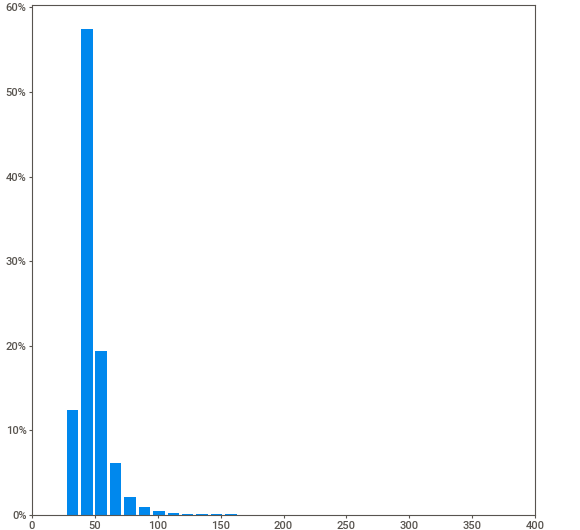
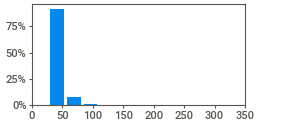
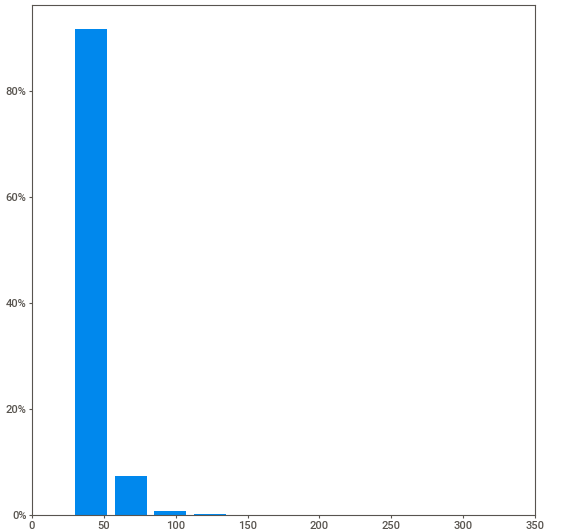
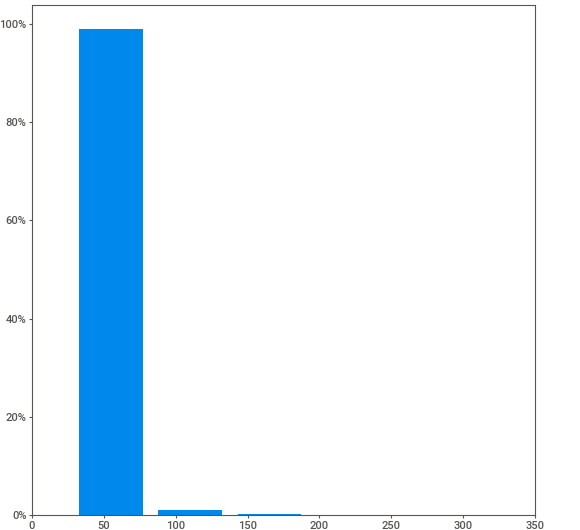
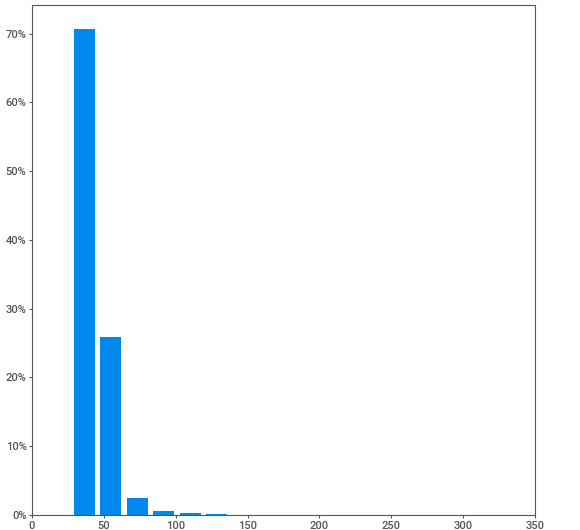
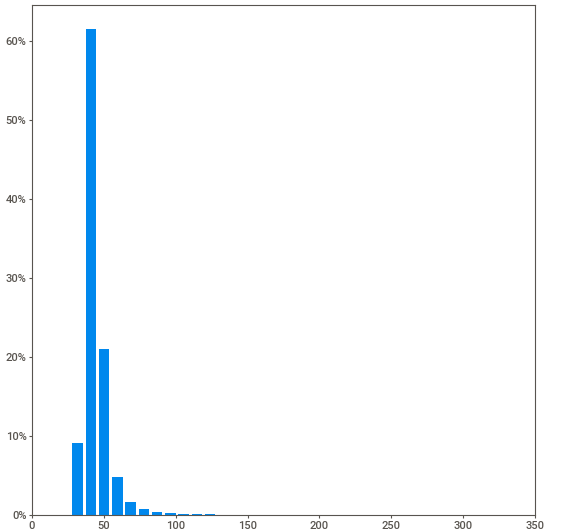
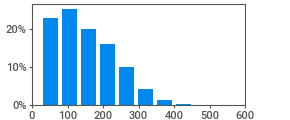
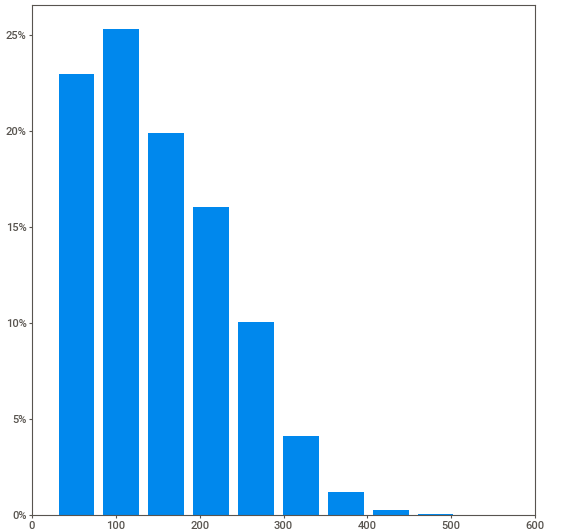
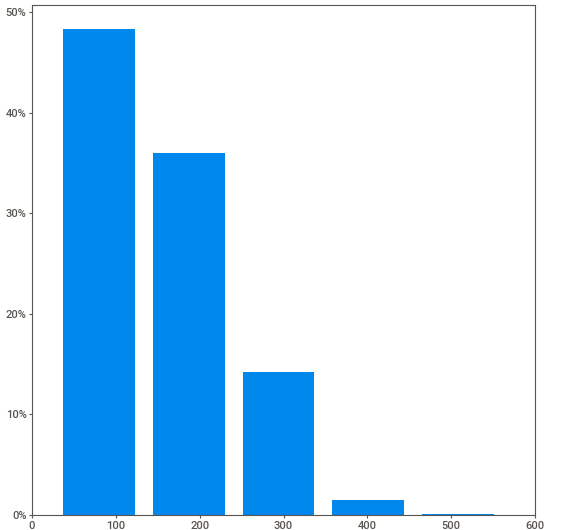
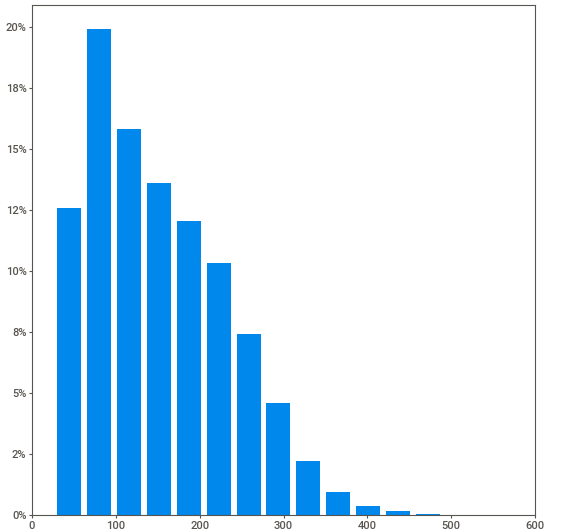
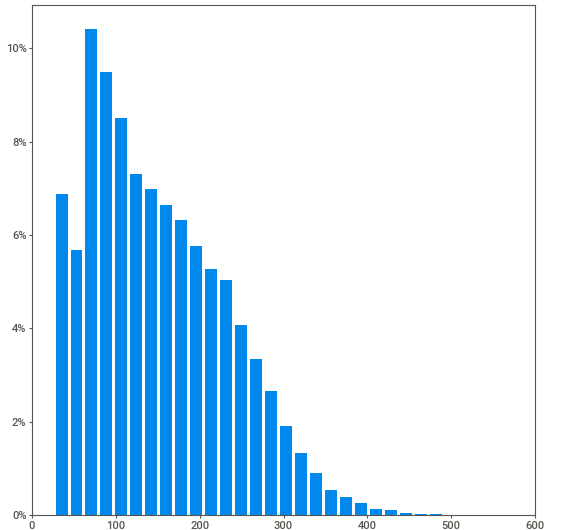
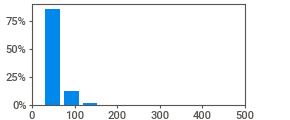
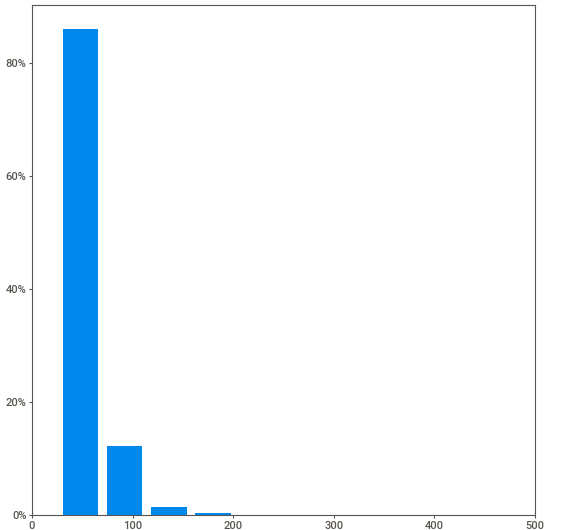
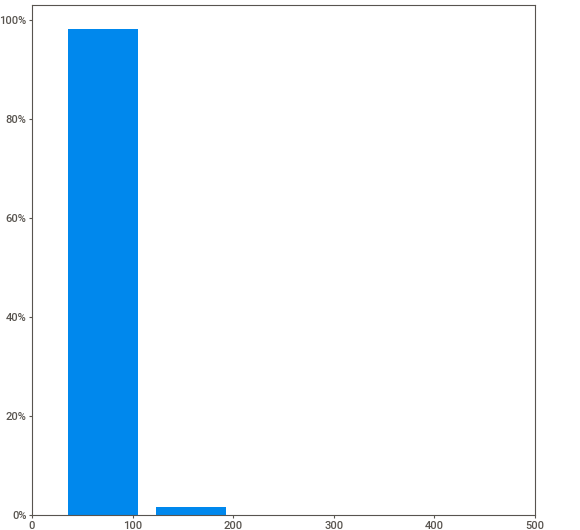
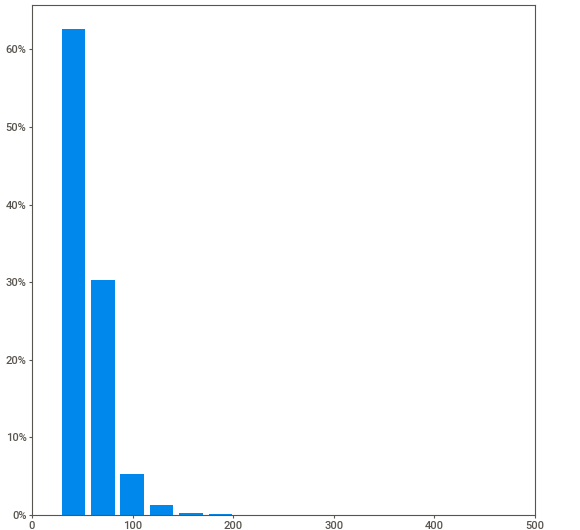
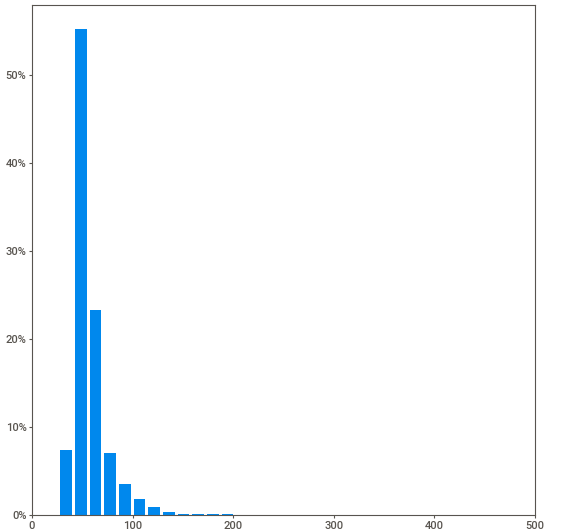
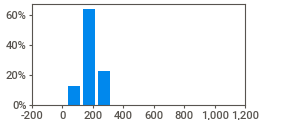
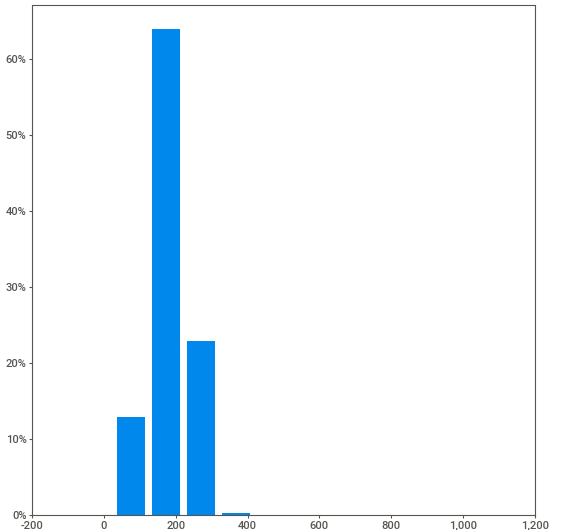
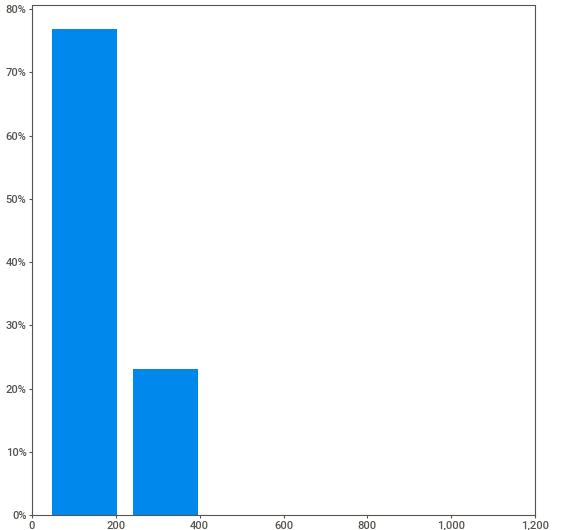
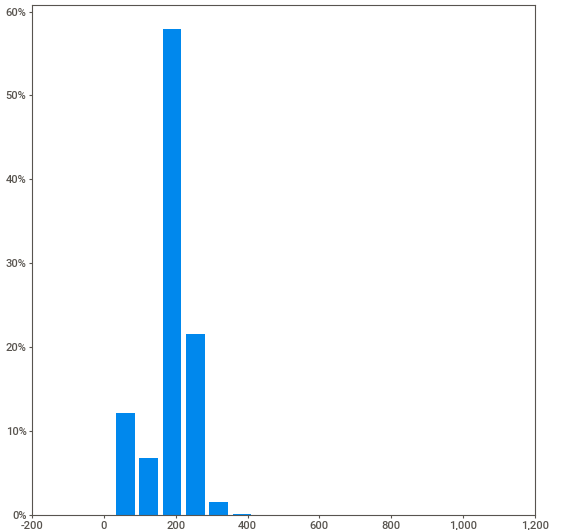
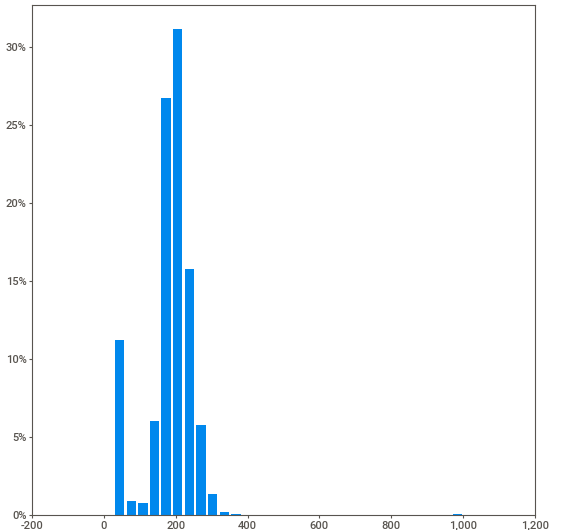
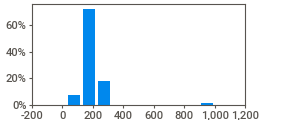
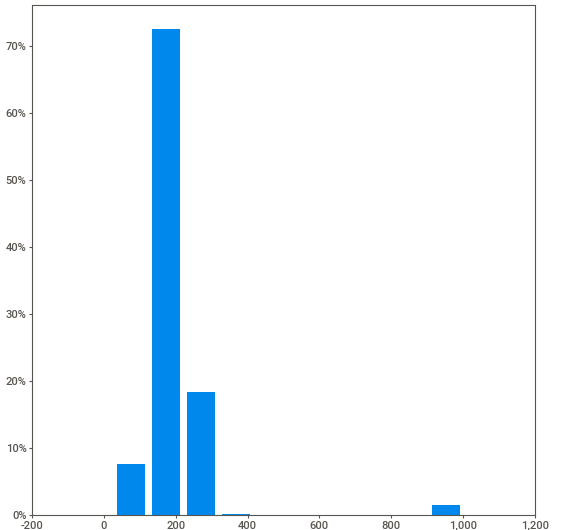
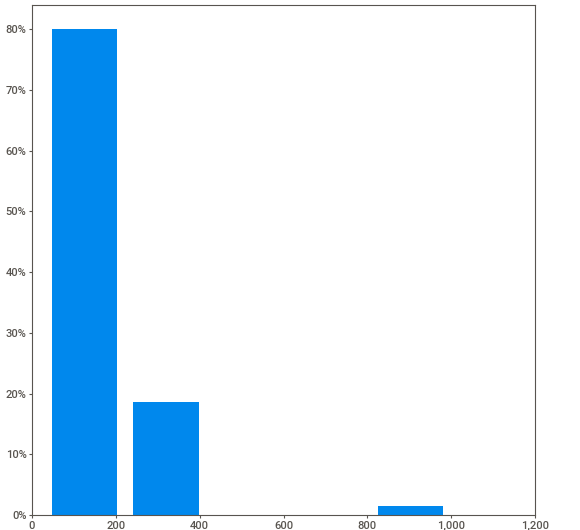
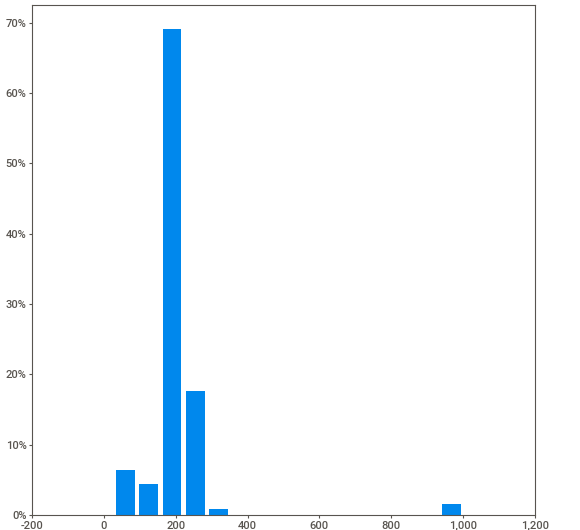
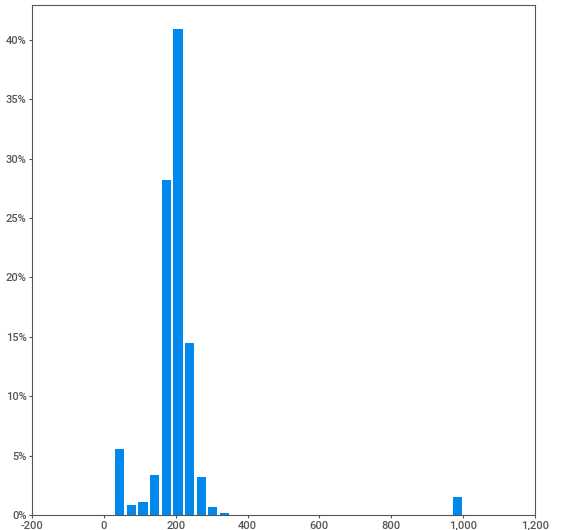
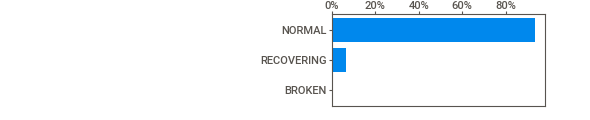
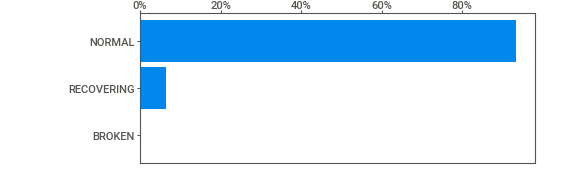
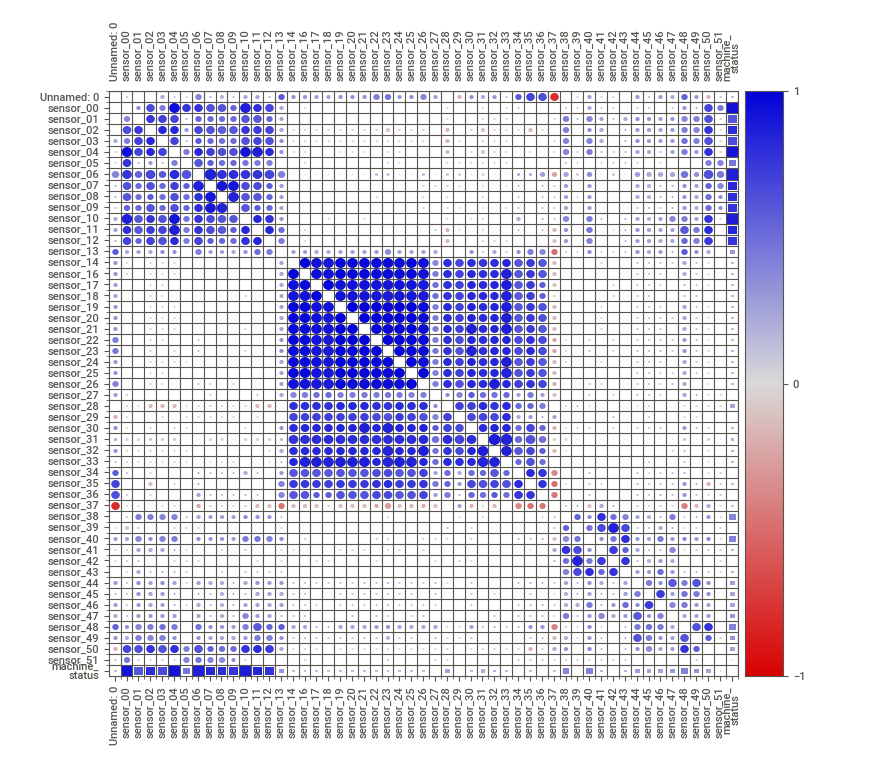
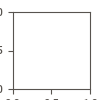

Report ../data/eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
CPU times: user 38.2 s, sys: 25.7 s, total: 1min 3s
Wall time: 32.6 s


In [6]:
%%time
my_report = sv.analyze(df) # Realiza uma rápida análise exploratória dos dados, identificando variáveis categóricas, missing values e potenciais correlações entre colunas. 
my_report.show_notebook() 
my_report.show_html(f'{data_dir}/eda_report.html') 

## Segundas impressões
Após análise do relatório gerado com a biblioteca sweetviz, confirmamos algumas hipóteses e criamos novas, além de gerar novas ações:

##### Hipóteses:
1. Podemos perceber que a coluna *"machine_status"*, que seria nosso target, está como texto/**object**. Precisamos checar se é possível transformá-la em categórica, e quantas categorias existem.  
![image1.png](../data/hip_01_01.png)  
**CONFIRMADA**

2. A coluna *"Unnamed: 0"* parece ser apenas o index trazido pelo arquivo CSV. Podemos eliminá-la.  
![image2.png](../data/hip_01_01.png)  
**CONFIRMADA**

3. A matriz de correlações apresentada indica alguns possíveis sensores como tendo correlações fortes com o *"machine_status"*. Essa hipótese poderia ser explorada mais adiante:  
![corr_01.png](../data/correlations.png)  
![corr_02.png](../data/corr_02.png)  


##### Ações:
1. A coluna *"timestamp"* está em formato de texto. Vamos convertê-la em formato datetime para facilitar as análises. ("2018-04-01 00:00:00")
2. A coluna *"sensor_15"* está apenas com valores nulos. Precisamos entender como tratá-la, e se é possível eliminar. 
3. A maior parte das colunas possui valores nulos. Precisamos investigar se estão todos localizados no mesmo timestamp (o que sugeriria um possível problema na comunicação), ou se estão em pontos espalhados no tempo, sugerindo falhas específicas nos sensores.
4. A maior parte das colunas possui outliers. Serria interessante explorar os momentos desses outliers e verificar se existe alguma correlação.
5. Transformar a coluna *"machine_status"* em formato categórico
6. Eliminar a coluna *"Unnamed: 0"*

## Execuções:
- Converter a coluna *"timestamp"* para pd.datetime
- Transformar a coluna *"machine_status"* em formato categórico
- Eliminar a coluna *"Unnamed: 0"*

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df['timestamp'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 220320 entries, 0 to 220319
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
220320 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB
None


In [8]:
df['machine_status'] = df['machine_status'].astype('category')
print(df['machine_status'].info())
print("-"*15)
print("Categorias:", df['machine_status'].cat.categories)

<class 'pandas.core.series.Series'>
RangeIndex: 220320 entries, 0 to 220319
Series name: machine_status
Non-Null Count   Dtype   
--------------   -----   
220320 non-null  category
dtypes: category(1)
memory usage: 215.4 KB
None
---------------
Categorias: Index(['BROKEN', 'NORMAL', 'RECOVERING'], dtype='object')


In [9]:
df = df.drop("Unnamed: 0", axis=1)
print(list(df.columns))

['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status']
